In [5849]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from datetime import datetime
from dateutil.parser import parse


%matplotlib inline

# IMPORT DATA: csv files of scraped Airbnb data for 5 boroughs of NYC

In [5850]:
manhattan_csv_path = '/Users/varshagarla/Desktop/Linear_Regression/original csv files/MANHATTAN.csv'
bronx_csv_path = '/Users/varshagarla/Desktop/Linear_Regression/original csv files/BRONX.csv'
brooklyn_csv_path = '/Users/varshagarla/Desktop/Linear_Regression/original csv files/BROOKLYN.csv'
queens_csv_path = '/Users/varshagarla/Desktop/Linear_Regression/original csv files/QUEENS.csv'
staten_island_csv_path = '/Users/varshagarla/Desktop/Linear_Regression/original csv files/STATEN_ISLAND.csv'

print(os.path.exists(manhattan_csv_path))
print(os.path.exists(bronx_csv_path))
print(os.path.exists(brooklyn_csv_path))
print(os.path.exists(queens_csv_path))
print(os.path.exists(staten_island_csv_path))

True
True
True
True
True


Create data frames for each borough csv file

In [5851]:
manhattan_df = pd.read_csv(manhattan_csv_path)
bronx_df = pd.read_csv(bronx_csv_path)
brooklyn_df = pd.read_csv(brooklyn_csv_path)
queens_df = pd.read_csv(queens_csv_path)
staten_island_df = pd.read_csv(staten_island_csv_path)

In [5852]:
staten_island_df.head()

url  \
0  /rooms/40734111?adults=2&children=0&infants=0&...   
1  /rooms/17992512?adults=2&children=0&infants=0&...   
2  /rooms/43605445?adults=2&children=0&infants=0&...   
3  /rooms/50021793?adults=2&children=0&infants=0&...   
4  /rooms/48758785?adults=2&children=0&infants=0&...   

                                                name  \
0           Cottage style stay w/ jacuzzi near ferry   
1                    Charming Suite in Historic Home   
2  Residency NYC Luxury Apartment RUMC/Wagner wel...   
3                                      Elegant Nest.   
4     Frontbeach Love Home#Private#Free parking#cook   

                                        header  \
0          Entire rental unit in Staten Island   
1         Entire residential home in Stapleton   
2          Entire rental unit in Staten Island   
3  Entire condominium (condo) in Staten Island   
4          Entire rental unit in Staten Island   

                                    rooms  \
0     4 guests · Studio · 2 beds · 1 bath   
1  2 guests · 1 bedroom · 2 beds · 1 bath   
2  3 guests · 1 bedroom · 2 beds · 1 bath   
3     2 guests · Studio · 2 beds · 1 bath   
4      2 guests · Studio · 1 bed · 1 bath   

                                    facilities rating_overall  \
0  Wifi · Air conditioning · Kitchen · Heating           4.79   
1  Wifi · Air conditioning · Kitchen · Heating           4.89   
2  Wifi · Air conditioning · Kitchen · Heating           4.95   
3  Wifi · Air conditioning · Kitchen · Heating          empty   
4  Wifi · Air conditioning · Kitchen · Heating           4.85   

  num_listing_reviews price_per_night  superhost  \
0        (39 reviews)             $90  SUPERHOST   
1       (330 reviews)             $70  SUPERHOST   
2        (42 reviews)             $88  SUPERHOST   
3               empty             $64      empty   
4        (27 reviews)            $106  SUPERHOST   

                                              sp_url  ... rating_location  \
0  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             4.6   
1  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             4.9   
2  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             4.9   
3  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
4  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             5.0   

  rating_check_in rating_value             host_joined num_host_ratings  \
0             4.9          4.9     Joined in July 2016       59 Reviews   
1             5.0          4.9      Joined in May 2016      330 Reviews   
2             5.0          4.9  Joined in October 2014       42 Reviews   
3           empty        empty     Joined in July 2016       10 Reviews   
4             4.7          4.9    Joined in March 2017      265 Reviews   

                     host_languages   host_response_rate  \
0       Languages: English, Español  Response rate: 100%   
1               Response rate: 100%  Response rate: 100%   
2                 Language: English  Response rate: 100%   
3               Response rate: 100%  Response rate: 100%   
4  Languages: 中文 (简体), English, 한국어  Response rate: 100%   

              host_response_time  \
0  Response time: within an hour   
1  Response time: within an hour   
2  Response time: within an hour   
3  Response time: within an hour   
4  Response time: within an hour   

                                         house_rules  \
0  House rulesCheck-in: After 4:00 PMCheckout: 11...   
1  House rulesCheck-in: After 4:00 PMCheckout: 11...   
2  House rulesCheck-in: After 3:00 PMCheckout: 11...   
3  House rulesCheck-in: After 2:00 PMCheckout: 12...   
4  House rulesCheck-in: 3:00 PM - 2:00 AMCheckout...   

                                           amenities  
0  {"amenity_Bathroom": ["Bathtub", "Hair dryer",...  
1  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  
2  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  
3  {"amenity_Bathroom": ["Hot water"], "amenity_B.

In [5853]:
staten_island_df.columns

Index(['url', 'name', 'header', 'rooms', 'facilities', 'rating_overall',
       'num_listing_reviews', 'price_per_night', 'superhost', 'sp_url',
       'location', 'fee_occ_tax', 'fee_service', 'fee_cleaning',
       'rating_cleanliness', 'rating_accuracy', 'rating_communication',
       'rating_location', 'rating_check_in', 'rating_value', 'host_joined',
       'num_host_ratings', 'host_languages', 'host_response_rate',
       'host_response_time', 'house_rules', 'amenities'],
      dtype='object')

# Cleaning borough dataframes separately before combining

## 1. Drop rows that have too many 'empty' values

### 1a) MANHATTAN

In [5854]:
manhattan_df.head()

url  \
0  /rooms/42563979?adults=2&children=0&infants=0&...   
1  /rooms/35220744?adults=2&children=0&infants=0&...   
2  /rooms/50913633?adults=2&children=0&infants=0&...   
3  /rooms/738516?adults=2&children=0&infants=0&ch...   
4  /rooms/4455094?adults=2&children=0&infants=0&c...   

                                                name  \
0                    Gramercy park Apartment (2beds)   
1          Amazing Views in The Heart of Time Square   
2   FREEMAN'S HOUSE Charming Studio W/ Terrace  1402   
3                 West Side Charm - Central Park! Uh   
4  West Village Style and Charm -Thoroughly Sanit...   

                                 header  \
0    Entire rental unit in Union Square   
1  Entire rental unit in Hell's Kitchen   
2       Entire rental unit in Manhattan   
3       Entire rental unit in Manhattan   
4          Private room in West Village   

                                             rooms  \
0              3 guests · Studio · 2 beds · 1 bath   
1            3 guests · 1 bedroom · 1 bed · 1 bath   
2            2 guests · 1 bedroom · 1 bed · 1 bath   
3           2 guests · 1 bedroom · 0 beds · 1 bath   
4  2 guests · 1 bedroom · 1 bed · 1.5 shared baths   

                                    facilities rating_overall  \
0  Wifi · Air conditioning · Kitchen · Heating           4.66   
1  Wifi · Air conditioning · Kitchen · Heating           4.91   
2            Wifi · Air conditioning · Heating           4.67   
3  Wifi · Air conditioning · Kitchen · Heating           4.42   
4  Wifi · Air conditioning · Kitchen · Heating           4.97   

  num_listing_reviews price_per_night  superhost  \
0        (32 reviews)            $107      empty   
1       (117 reviews)            $305      empty   
2         (3 reviews)            $159      empty   
3       (306 reviews)            $179      empty   
4       (220 reviews)            $130  SUPERHOST   

                                              sp_url  ... rating_location  \
0  https://www.airbnb.com/s/Manhattan--New-York--...  ...             5.0   
1  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.9   
2  https://www.airbnb.com/s/Manhattan--New-York--...  ...             3.7   
3  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.9   
4  https://www.airbnb.com/s/Manhattan--New-York--...  ...             5.0   

  rating_check_in rating_value              host_joined   num_host_ratings  \
0             4.8          4.6  Joined in February 2020         32 Reviews   
1             4.6          4.8       Joined in May 2019        117 Reviews   
2             5.0          3.3    Joined in August 2019  Identity verified   
3             4.6          4.5   Joined in October 2012        360 Reviews   
4             4.9          4.9     Joined in March 2014        234 Reviews   

                host_languages   host_response_rate  \
0           Response rate: 80%   Response rate: 80%   
1  Languages: English, Español   Response rate: 70%   
2    Languages: English, עברית                empty   
3          Response rate: 100%  Response rate: 100%   
4            Language: English  Response rate: 100%   

              host_response_time  \
0  Response time: within an hour   
1  Response time: within an hour   
2      Languages: English, עברית   
3  Response time: within an hour   
4  Response time: within an hour   

                                         house_rules  \
0  House rulesCheck-in: After 3:00 PMCheckout: 11...   
1  House rulesCheck-in: After 3:00 PMCheckout: 12...   
2  House rulesCheck-in: 3:00 PM - 10:00 PMCheckou...   
3  House rulesCheck-in: 3:00 PM - 9:00 PMCheckout...   
4  House rulesCheck-in: After 3:00 PMCheckout: 12...   

                                           amenities  
0  {"amenity_Bathroom": ["Hair dryer", "Hot water...  
1  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  
2  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  
3  {"amenity_Bathroom": ["Hair dryer", "Shampoo",.

In [5855]:
manhattan_df.describe()

url   name                           header  \
count     525    525                              525   
unique    501    270                               71   
top     empty  empty  Entire rental unit in Manhattan   
freq       25     25                               82   

                                               rooms  \
count                                            525   
unique                                            60   
top     2 guests · 1 bedroom · 1 bed · 1 shared bath   
freq                                              89   

                                         facilities rating_overall  \
count                                           525            525   
unique                                            9             75   
top     Wifi · Air conditioning · Kitchen · Heating          empty   
freq                                            301            109   

       num_listing_reviews price_per_night superhost  \
count                  525             525       525   
unique                 130             162         2   
top                  empty           empty     empty   
freq                   109              25       331   

                                                   sp_url  ...  \
count                                                 525  ...   
unique                                                 25  ...   
top     https://www.airbnb.com/s/Manhattan--New-York--...  ...   
freq                                                   21  ...   

       rating_location rating_check_in rating_value             host_joined  \
count              525             525          525                     525   
unique              13              14           17                      97   
top                5.0             5.0          4.8  Joined in October 2020   
freq               128             129          130                      52   

       num_host_ratings       host_languages   host_response_rate  \
count               525                  525                  525   
unique              150                   53                   30   
top       2,739 Reviews  Response rate: 100%  Response rate: 100%   
freq                 45                  123                  227   

                   host_response_time  \
count                             525   
unique                              7   
top     Response time: within an hour   
freq                              404   

                                              house_rules amenities  
count                                                 525       525  
unique                                                191       246  
top     House rulesCheck-in: 3:00 PM - 2:00 AMCheckout...        {}  
freq                                                   41        49  

[4 rows x 27 columns]

In [5856]:
manhattan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   525 non-null    object
 1   name                  525 non-null    object
 2   header                525 non-null    object
 3   rooms                 525 non-null    object
 4   facilities            525 non-null    object
 5   rating_overall        525 non-null    object
 6   num_listing_reviews   525 non-null    object
 7   price_per_night       525 non-null    object
 8   superhost             525 non-null    object
 9   sp_url                525 non-null    object
 10  location              525 non-null    object
 11  fee_occ_tax           525 non-null    object
 12  fee_service           525 non-null    object
 13  fee_cleaning          525 non-null    object
 14  rating_cleanliness    525 non-null    object
 15  rating_accuracy       525 non-null    ob

In [5857]:
#these rows have no data, appear every 20 rows in dataframe
manhattan_df.query("url=='empty'")

url   name header  rooms facilities rating_overall num_listing_reviews  \
20   empty  empty  empty  empty      empty          empty               empty   
41   empty  empty  empty  empty      empty          empty               empty   
62   empty  empty  empty  empty      empty          empty               empty   
83   empty  empty  empty  empty      empty          empty               empty   
104  empty  empty  empty  empty      empty          empty               empty   
125  empty  empty  empty  empty      empty          empty               empty   
146  empty  empty  empty  empty      empty          empty               empty   
167  empty  empty  empty  empty      empty          empty               empty   
188  empty  empty  empty  empty      empty          empty               empty   
209  empty  empty  empty  empty      empty          empty               empty   
230  empty  empty  empty  empty      empty          empty               empty   
251  empty  empty  empty  empty      empty          empty               empty   
272  empty  empty  empty  empty      empty          empty               empty   
293  empty  empty  empty  empty      empty          empty               empty   
314  empty  empty  empty  empty      empty          empty               empty   
335  empty  empty  empty  empty      empty          empty               empty   
356  empty  empty  empty  empty      empty          empty               empty   
377  empty  empty  empty  empty      empty          empty               empty   
398  empty  empty  empty  empty      empty          empty               empty   
419  empty  empty  empty  empty      empty          empty               empty   
440  empty  empty  empty  empty      empty          empty               empty   
461  empty  empty  empty  empty      empty          empty               empty   
482  empty  empty  empty  empty      empty          empty               empty   
503  empty  empty  empty  empty      empty          empty               empty   
524  empty  empty  empty  empty      empty          empty               empty   

    price_per_night superhost  \
20            empty     empty   
41            empty     empty   
62            empty     empty   
83            empty     empty   
104           empty     empty   
125           empty     empty   
146           empty     empty   
167           empty     empty   
188           empty     empty   
209           empty     empty   
230           empty     empty   
251           empty     empty   
272           empty     empty   
293           empty     empty   
314           empty     empty   
335           empty     empty   
356           empty     empty   
377           empty     empty   
398           empty     empty   
419           empty     empty   
440           empty     empty   
461           empty     empty   
482           empty     empty   
503           empty     empty   
524           empty     empty   

                                                sp_url  ... rating_location  \
20   https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
41   https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
62   https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
83   https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
104  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
125  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
146  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
167  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
188  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
209  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
230  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
251  https://www.airbnb.com/s/Manhattan--New-York--...  ...           empty   
272  https://w

In [5858]:
manhattan_df.drop(manhattan_df.loc[manhattan_df['url']=='empty'].index, inplace=True)
manhattan_df.reset_index(drop=True, inplace=True) # reset index so that index goes from 0 to [num_rows - 1]

In [5859]:
manhattan_df.query("url=='empty'") #Success!

Empty DataFrame
Columns: [url, name, header, rooms, facilities, rating_overall, num_listing_reviews, price_per_night, superhost, sp_url, location, fee_occ_tax, fee_service, fee_cleaning, rating_cleanliness, rating_accuracy, rating_communication, rating_location, rating_check_in, rating_value, host_joined, num_host_ratings, host_languages, host_response_rate, host_response_time, house_rules, amenities]
Index: []

[0 rows x 27 columns]

In [5860]:
manhattan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   500 non-null    object
 1   name                  500 non-null    object
 2   header                500 non-null    object
 3   rooms                 500 non-null    object
 4   facilities            500 non-null    object
 5   rating_overall        500 non-null    object
 6   num_listing_reviews   500 non-null    object
 7   price_per_night       500 non-null    object
 8   superhost             500 non-null    object
 9   sp_url                500 non-null    object
 10  location              500 non-null    object
 11  fee_occ_tax           500 non-null    object
 12  fee_service           500 non-null    object
 13  fee_cleaning          500 non-null    object
 14  rating_cleanliness    500 non-null    object
 15  rating_accuracy       500 non-null    ob

525 rows --> 500 rows as expected. Scraped 25 pages and collected 25 junk listing urls.

### 1b) BRONX

In [5861]:
bronx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   525 non-null    object
 1   name                  525 non-null    object
 2   header                525 non-null    object
 3   rooms                 525 non-null    object
 4   facilities            525 non-null    object
 5   rating_overall        525 non-null    object
 6   num_listing_reviews   525 non-null    object
 7   price_per_night       525 non-null    object
 8   superhost             525 non-null    object
 9   sp_url                525 non-null    object
 10  location              525 non-null    object
 11  fee_occ_tax           525 non-null    object
 12  fee_service           525 non-null    object
 13  fee_cleaning          525 non-null    object
 14  rating_cleanliness    525 non-null    object
 15  rating_accuracy       525 non-null    ob

In [5862]:
bronx_df.query("url=='empty'")

url   name header  rooms facilities rating_overall num_listing_reviews  \
20   empty  empty  empty  empty      empty          empty               empty   
41   empty  empty  empty  empty      empty          empty               empty   
62   empty  empty  empty  empty      empty          empty               empty   
83   empty  empty  empty  empty      empty          empty               empty   
104  empty  empty  empty  empty      empty          empty               empty   
125  empty  empty  empty  empty      empty          empty               empty   
146  empty  empty  empty  empty      empty          empty               empty   
167  empty  empty  empty  empty      empty          empty               empty   
188  empty  empty  empty  empty      empty          empty               empty   
209  empty  empty  empty  empty      empty          empty               empty   
230  empty  empty  empty  empty      empty          empty               empty   
251  empty  empty  empty  empty      empty          empty               empty   
272  empty  empty  empty  empty      empty          empty               empty   
293  empty  empty  empty  empty      empty          empty               empty   
314  empty  empty  empty  empty      empty          empty               empty   
335  empty  empty  empty  empty      empty          empty               empty   
356  empty  empty  empty  empty      empty          empty               empty   
377  empty  empty  empty  empty      empty          empty               empty   
398  empty  empty  empty  empty      empty          empty               empty   
419  empty  empty  empty  empty      empty          empty               empty   
440  empty  empty  empty  empty      empty          empty               empty   
461  empty  empty  empty  empty      empty          empty               empty   
482  empty  empty  empty  empty      empty          empty               empty   
503  empty  empty  empty  empty      empty          empty               empty   
524  empty  empty  empty  empty      empty          empty               empty   

    price_per_night superhost  \
20            empty     empty   
41            empty     empty   
62            empty     empty   
83            empty     empty   
104           empty     empty   
125           empty     empty   
146           empty     empty   
167           empty     empty   
188           empty     empty   
209           empty     empty   
230           empty     empty   
251           empty     empty   
272           empty     empty   
293           empty     empty   
314           empty     empty   
335           empty     empty   
356           empty     empty   
377           empty     empty   
398           empty     empty   
419           empty     empty   
440           empty     empty   
461           empty     empty   
482           empty     empty   
503           empty     empty   
524           empty     empty   

                                                sp_url  ... rating_location  \
20   https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
41   https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
62   https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
83   https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
104  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
125  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
146  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
167  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
188  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
209  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
230  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
251  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...           empty   
272  https://w

In [5863]:
bronx_df.drop(bronx_df.loc[bronx_df['url']=='empty'].index, inplace=True)
bronx_df.reset_index(drop=True, inplace=True)

In [5864]:
bronx_df.query("url=='empty'") #Success!

Empty DataFrame
Columns: [url, name, header, rooms, facilities, rating_overall, num_listing_reviews, price_per_night, superhost, sp_url, location, fee_occ_tax, fee_service, fee_cleaning, rating_cleanliness, rating_accuracy, rating_communication, rating_location, rating_check_in, rating_value, host_joined, num_host_ratings, host_languages, host_response_rate, host_response_time, house_rules, amenities]
Index: []

[0 rows x 27 columns]

In [5865]:
bronx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   500 non-null    object
 1   name                  500 non-null    object
 2   header                500 non-null    object
 3   rooms                 500 non-null    object
 4   facilities            500 non-null    object
 5   rating_overall        500 non-null    object
 6   num_listing_reviews   500 non-null    object
 7   price_per_night       500 non-null    object
 8   superhost             500 non-null    object
 9   sp_url                500 non-null    object
 10  location              500 non-null    object
 11  fee_occ_tax           500 non-null    object
 12  fee_service           500 non-null    object
 13  fee_cleaning          500 non-null    object
 14  rating_cleanliness    500 non-null    object
 15  rating_accuracy       500 non-null    ob

### 1c) BROOKLYN

In [5866]:
brooklyn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   525 non-null    object
 1   name                  525 non-null    object
 2   header                525 non-null    object
 3   rooms                 525 non-null    object
 4   facilities            525 non-null    object
 5   rating_overall        525 non-null    object
 6   num_listing_reviews   525 non-null    object
 7   price_per_night       525 non-null    object
 8   superhost             525 non-null    object
 9   sp_url                525 non-null    object
 10  location              525 non-null    object
 11  fee_occ_tax           525 non-null    object
 12  fee_service           525 non-null    object
 13  fee_cleaning          525 non-null    object
 14  rating_cleanliness    525 non-null    object
 15  rating_accuracy       525 non-null    ob

In [5867]:
brooklyn_df.query("url=='empty'")

url   name header  rooms facilities rating_overall num_listing_reviews  \
20   empty  empty  empty  empty      empty          empty               empty   
41   empty  empty  empty  empty      empty          empty               empty   
62   empty  empty  empty  empty      empty          empty               empty   
83   empty  empty  empty  empty      empty          empty               empty   
104  empty  empty  empty  empty      empty          empty               empty   
125  empty  empty  empty  empty      empty          empty               empty   
146  empty  empty  empty  empty      empty          empty               empty   
167  empty  empty  empty  empty      empty          empty               empty   
188  empty  empty  empty  empty      empty          empty               empty   
209  empty  empty  empty  empty      empty          empty               empty   
230  empty  empty  empty  empty      empty          empty               empty   
251  empty  empty  empty  empty      empty          empty               empty   
272  empty  empty  empty  empty      empty          empty               empty   
293  empty  empty  empty  empty      empty          empty               empty   
314  empty  empty  empty  empty      empty          empty               empty   
335  empty  empty  empty  empty      empty          empty               empty   
356  empty  empty  empty  empty      empty          empty               empty   
377  empty  empty  empty  empty      empty          empty               empty   
398  empty  empty  empty  empty      empty          empty               empty   
419  empty  empty  empty  empty      empty          empty               empty   
440  empty  empty  empty  empty      empty          empty               empty   
461  empty  empty  empty  empty      empty          empty               empty   
482  empty  empty  empty  empty      empty          empty               empty   
503  empty  empty  empty  empty      empty          empty               empty   
524  empty  empty  empty  empty      empty          empty               empty   

    price_per_night superhost  \
20            empty     empty   
41            empty     empty   
62            empty     empty   
83            empty     empty   
104           empty     empty   
125           empty     empty   
146           empty     empty   
167           empty     empty   
188           empty     empty   
209           empty     empty   
230           empty     empty   
251           empty     empty   
272           empty     empty   
293           empty     empty   
314           empty     empty   
335           empty     empty   
356           empty     empty   
377           empty     empty   
398           empty     empty   
419           empty     empty   
440           empty     empty   
461           empty     empty   
482           empty     empty   
503           empty     empty   
524           empty     empty   

                                                sp_url  ... rating_location  \
20   https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
41   https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
62   https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
83   https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
104  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
125  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
146  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
167  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
188  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
209  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
230  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
251  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...           empty   
272  https://w

In [5868]:
brooklyn_df.drop(brooklyn_df.loc[brooklyn_df['url']=='empty'].index, inplace=True)
brooklyn_df.reset_index(drop=True, inplace=True)

In [5869]:
brooklyn_df.query("url=='empty'") #Success!

Empty DataFrame
Columns: [url, name, header, rooms, facilities, rating_overall, num_listing_reviews, price_per_night, superhost, sp_url, location, fee_occ_tax, fee_service, fee_cleaning, rating_cleanliness, rating_accuracy, rating_communication, rating_location, rating_check_in, rating_value, host_joined, num_host_ratings, host_languages, host_response_rate, host_response_time, house_rules, amenities]
Index: []

[0 rows x 27 columns]

In [5870]:
brooklyn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   500 non-null    object
 1   name                  500 non-null    object
 2   header                500 non-null    object
 3   rooms                 500 non-null    object
 4   facilities            500 non-null    object
 5   rating_overall        500 non-null    object
 6   num_listing_reviews   500 non-null    object
 7   price_per_night       500 non-null    object
 8   superhost             500 non-null    object
 9   sp_url                500 non-null    object
 10  location              500 non-null    object
 11  fee_occ_tax           500 non-null    object
 12  fee_service           500 non-null    object
 13  fee_cleaning          500 non-null    object
 14  rating_cleanliness    500 non-null    object
 15  rating_accuracy       500 non-null    ob

### 1d) QUEENS

In [5871]:
queens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   525 non-null    object
 1   name                  525 non-null    object
 2   header                525 non-null    object
 3   rooms                 525 non-null    object
 4   facilities            525 non-null    object
 5   rating_overall        525 non-null    object
 6   num_listing_reviews   525 non-null    object
 7   price_per_night       525 non-null    object
 8   superhost             525 non-null    object
 9   sp_url                525 non-null    object
 10  location              525 non-null    object
 11  fee_occ_tax           525 non-null    object
 12  fee_service           525 non-null    object
 13  fee_cleaning          525 non-null    object
 14  rating_cleanliness    525 non-null    object
 15  rating_accuracy       525 non-null    ob

In [5872]:
queens_df.query("url=='empty'")

url   name header  rooms facilities rating_overall num_listing_reviews  \
20   empty  empty  empty  empty      empty          empty               empty   
41   empty  empty  empty  empty      empty          empty               empty   
62   empty  empty  empty  empty      empty          empty               empty   
83   empty  empty  empty  empty      empty          empty               empty   
104  empty  empty  empty  empty      empty          empty               empty   
125  empty  empty  empty  empty      empty          empty               empty   
146  empty  empty  empty  empty      empty          empty               empty   
167  empty  empty  empty  empty      empty          empty               empty   
188  empty  empty  empty  empty      empty          empty               empty   
209  empty  empty  empty  empty      empty          empty               empty   
230  empty  empty  empty  empty      empty          empty               empty   
251  empty  empty  empty  empty      empty          empty               empty   
272  empty  empty  empty  empty      empty          empty               empty   
293  empty  empty  empty  empty      empty          empty               empty   
314  empty  empty  empty  empty      empty          empty               empty   
335  empty  empty  empty  empty      empty          empty               empty   
356  empty  empty  empty  empty      empty          empty               empty   
377  empty  empty  empty  empty      empty          empty               empty   
398  empty  empty  empty  empty      empty          empty               empty   
419  empty  empty  empty  empty      empty          empty               empty   
440  empty  empty  empty  empty      empty          empty               empty   
461  empty  empty  empty  empty      empty          empty               empty   
482  empty  empty  empty  empty      empty          empty               empty   
503  empty  empty  empty  empty      empty          empty               empty   
524  empty  empty  empty  empty      empty          empty               empty   

    price_per_night superhost  \
20            empty     empty   
41            empty     empty   
62            empty     empty   
83            empty     empty   
104           empty     empty   
125           empty     empty   
146           empty     empty   
167           empty     empty   
188           empty     empty   
209           empty     empty   
230           empty     empty   
251           empty     empty   
272           empty     empty   
293           empty     empty   
314           empty     empty   
335           empty     empty   
356           empty     empty   
377           empty     empty   
398           empty     empty   
419           empty     empty   
440           empty     empty   
461           empty     empty   
482           empty     empty   
503           empty     empty   
524           empty     empty   

                                                sp_url  ... rating_location  \
20   https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
41   https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
62   https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
83   https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
104  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
125  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
146  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
167  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
188  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
209  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
230  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
251  https://www.airbnb.com/s/Queens--NY--United-St...  ...           empty   
272  https://w

In [5873]:
queens_df.drop(queens_df.loc[queens_df['url']=='empty'].index, inplace=True)
queens_df.reset_index(drop=True, inplace=True)

In [5874]:
queens_df.query("url=='empty'")

Empty DataFrame
Columns: [url, name, header, rooms, facilities, rating_overall, num_listing_reviews, price_per_night, superhost, sp_url, location, fee_occ_tax, fee_service, fee_cleaning, rating_cleanliness, rating_accuracy, rating_communication, rating_location, rating_check_in, rating_value, host_joined, num_host_ratings, host_languages, host_response_rate, host_response_time, house_rules, amenities]
Index: []

[0 rows x 27 columns]

In [5875]:
queens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   500 non-null    object
 1   name                  500 non-null    object
 2   header                500 non-null    object
 3   rooms                 500 non-null    object
 4   facilities            500 non-null    object
 5   rating_overall        500 non-null    object
 6   num_listing_reviews   500 non-null    object
 7   price_per_night       500 non-null    object
 8   superhost             500 non-null    object
 9   sp_url                500 non-null    object
 10  location              500 non-null    object
 11  fee_occ_tax           500 non-null    object
 12  fee_service           500 non-null    object
 13  fee_cleaning          500 non-null    object
 14  rating_cleanliness    500 non-null    object
 15  rating_accuracy       500 non-null    ob

### 1e) STATEN ISLAND

In [5876]:
staten_island_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   525 non-null    object
 1   name                  525 non-null    object
 2   header                525 non-null    object
 3   rooms                 525 non-null    object
 4   facilities            525 non-null    object
 5   rating_overall        525 non-null    object
 6   num_listing_reviews   525 non-null    object
 7   price_per_night       525 non-null    object
 8   superhost             525 non-null    object
 9   sp_url                525 non-null    object
 10  location              525 non-null    object
 11  fee_occ_tax           525 non-null    object
 12  fee_service           525 non-null    object
 13  fee_cleaning          525 non-null    object
 14  rating_cleanliness    525 non-null    object
 15  rating_accuracy       525 non-null    ob

In [5877]:
staten_island_df.query("url=='empty'")

url   name header  rooms facilities rating_overall num_listing_reviews  \
20   empty  empty  empty  empty      empty          empty               empty   
41   empty  empty  empty  empty      empty          empty               empty   
62   empty  empty  empty  empty      empty          empty               empty   
83   empty  empty  empty  empty      empty          empty               empty   
104  empty  empty  empty  empty      empty          empty               empty   
125  empty  empty  empty  empty      empty          empty               empty   
146  empty  empty  empty  empty      empty          empty               empty   
167  empty  empty  empty  empty      empty          empty               empty   
188  empty  empty  empty  empty      empty          empty               empty   
209  empty  empty  empty  empty      empty          empty               empty   
230  empty  empty  empty  empty      empty          empty               empty   
251  empty  empty  empty  empty      empty          empty               empty   
272  empty  empty  empty  empty      empty          empty               empty   
293  empty  empty  empty  empty      empty          empty               empty   
314  empty  empty  empty  empty      empty          empty               empty   
335  empty  empty  empty  empty      empty          empty               empty   
356  empty  empty  empty  empty      empty          empty               empty   
377  empty  empty  empty  empty      empty          empty               empty   
398  empty  empty  empty  empty      empty          empty               empty   
419  empty  empty  empty  empty      empty          empty               empty   
440  empty  empty  empty  empty      empty          empty               empty   
461  empty  empty  empty  empty      empty          empty               empty   
482  empty  empty  empty  empty      empty          empty               empty   
503  empty  empty  empty  empty      empty          empty               empty   
524  empty  empty  empty  empty      empty          empty               empty   

    price_per_night superhost  \
20            empty     empty   
41            empty     empty   
62            empty     empty   
83            empty     empty   
104           empty     empty   
125           empty     empty   
146           empty     empty   
167           empty     empty   
188           empty     empty   
209           empty     empty   
230           empty     empty   
251           empty     empty   
272           empty     empty   
293           empty     empty   
314           empty     empty   
335           empty     empty   
356           empty     empty   
377           empty     empty   
398           empty     empty   
419           empty     empty   
440           empty     empty   
461           empty     empty   
482           empty     empty   
503           empty     empty   
524           empty     empty   

                                                sp_url  ... rating_location  \
20   https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
41   https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
62   https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
83   https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
104  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
125  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
146  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
167  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
188  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
209  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
230  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
251  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
272  https://w

In [5878]:
staten_island_df.drop(staten_island_df.loc[staten_island_df['url']=='empty'].index, inplace=True)
staten_island_df.reset_index(drop=True, inplace=True)

In [5879]:
staten_island_df.query("url=='empty'")

Empty DataFrame
Columns: [url, name, header, rooms, facilities, rating_overall, num_listing_reviews, price_per_night, superhost, sp_url, location, fee_occ_tax, fee_service, fee_cleaning, rating_cleanliness, rating_accuracy, rating_communication, rating_location, rating_check_in, rating_value, host_joined, num_host_ratings, host_languages, host_response_rate, host_response_time, house_rules, amenities]
Index: []

[0 rows x 27 columns]

In [5880]:
staten_island_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   500 non-null    object
 1   name                  500 non-null    object
 2   header                500 non-null    object
 3   rooms                 500 non-null    object
 4   facilities            500 non-null    object
 5   rating_overall        500 non-null    object
 6   num_listing_reviews   500 non-null    object
 7   price_per_night       500 non-null    object
 8   superhost             500 non-null    object
 9   sp_url                500 non-null    object
 10  location              500 non-null    object
 11  fee_occ_tax           500 non-null    object
 12  fee_service           500 non-null    object
 13  fee_cleaning          500 non-null    object
 14  rating_cleanliness    500 non-null    object
 15  rating_accuracy       500 non-null    ob

## 2. Drop rows with 'location' that obviously does not belong to that borough

### 2a) MANHATTAN

In [5881]:
manhattan_df.location.value_counts()

New York, United States                     427
Brooklyn, New York, United States            23
Queens, New York, United States              12
North Bergen, New Jersey, United States      11
West New York, New Jersey, United States      7
NEW YORK, New York, United States             5
Weehawken, New Jersey, United States          4
NYC , New York, United States                 3
Bronx, New York, United States                3
Jersey City, New Jersey, United States        2
Hoboken, New Jersey, United States            2
Brooklyn , New York, United States            1
Name: location, dtype: int64

In [5882]:
# remove all properties in new jersey

manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='North Bergen, New Jersey, United States'].index, inplace=True)
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='West New York, New Jersey, United States'].index, inplace=True)
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='Weehawken, New Jersey, United States'].index, inplace=True)
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='Jersey City, New Jersey, United States'].index, inplace=True)
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='Hoboken, New Jersey, United States'].index, inplace=True)

manhattan_df.reset_index(drop=True, inplace=True)

In [5883]:
manhattan_df.location.value_counts()

New York, United States               427
Brooklyn, New York, United States      23
Queens, New York, United States        12
NEW YORK, New York, United States       5
NYC , New York, United States           3
Bronx, New York, United States          3
Brooklyn , New York, United States      1
Name: location, dtype: int64

Remove rows with locations in brooklyn, queens, and bronx and add them to their respective dataframes

In [5884]:
# Transfer brooklyn locations to brooklyn dataframe
manhattan_to_brooklyn_df = manhattan_df.loc[manhattan_df['location']=='Brooklyn, New York, United States']
manhattan_to_brooklyn_df.shape

(23, 27)

In [5885]:
brooklyn_df = pd.concat([brooklyn_df, manhattan_to_brooklyn_df])
brooklyn_df.reset_index(drop=True, inplace=True)

In [5886]:
brooklyn_df.shape

(523, 27)

In [5887]:
# drop from manhattan dataframe
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='Brooklyn, New York, United States'].index, inplace=True)
manhattan_df.reset_index(drop=True, inplace=True)

In [5888]:
manhattan_df.location.value_counts()

New York, United States               427
Queens, New York, United States        12
NEW YORK, New York, United States       5
NYC , New York, United States           3
Bronx, New York, United States          3
Brooklyn , New York, United States      1
Name: location, dtype: int64

In [5889]:
manhattan_to_brooklyn_df_2 = manhattan_df.loc[manhattan_df['location']=='Brooklyn , New York, United States']

In [5890]:
brooklyn_df = pd.concat([brooklyn_df, manhattan_to_brooklyn_df_2])
brooklyn_df.reset_index(drop=True, inplace=True)

In [5891]:
brooklyn_df.shape

(524, 27)

In [5892]:
# drop from manhattan dataframe
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='Brooklyn , New York, United States'].index, inplace=True)
manhattan_df.reset_index(drop=True, inplace=True)

In [5893]:
manhattan_df.location.value_counts()

New York, United States              427
Queens, New York, United States       12
NEW YORK, New York, United States      5
NYC , New York, United States          3
Bronx, New York, United States         3
Name: location, dtype: int64

In [5894]:
# Transfer queens location to queens dataframe
manhattan_to_queens_df = manhattan_df.loc[manhattan_df['location']=='Queens, New York, United States']
manhattan_to_queens_df.shape

(12, 27)

In [5895]:
queens_df.shape

(500, 27)

In [5896]:
queens_df = pd.concat([queens_df, manhattan_to_queens_df])
queens_df.reset_index(drop=True, inplace=True)

In [5897]:
queens_df.shape

(512, 27)

In [5898]:
# drop from manhattan dataframe
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='Queens, New York, United States'].index, inplace=True)
manhattan_df.reset_index(drop=True, inplace=True)

In [5899]:
manhattan_df.shape
manhattan_df.location.value_counts()

New York, United States              427
NEW YORK, New York, United States      5
NYC , New York, United States          3
Bronx, New York, United States         3
Name: location, dtype: int64

In [5900]:
# Transfer bronx listings to bronx dataframe
manhattan_to_bronx_df = manhattan_df.loc[manhattan_df['location']=='Bronx, New York, United States']

In [5901]:
bronx_df.shape

(500, 27)

In [5902]:
bronx_df = pd.concat([bronx_df, manhattan_to_bronx_df])
bronx_df.reset_index(drop=True, inplace=True)

In [5903]:
bronx_df.shape

(503, 27)

In [5904]:
# drop from manhattan dataframe
manhattan_df.drop(manhattan_df.loc[manhattan_df['location']=='Bronx, New York, United States'].index, inplace=True)
manhattan_df.reset_index(drop=True, inplace=True)

In [5905]:
manhattan_df.shape

(435, 27)

In [5906]:
manhattan_df.location.value_counts()

New York, United States              427
NEW YORK, New York, United States      5
NYC , New York, United States          3
Name: location, dtype: int64

Okay.

### 2b) BRONX

In [5907]:
bronx_df.location.value_counts()

New York, United States                        187
Bronx, New York, United States                 118
The Bronx, New York, United States              82
Queens, New York, United States                 63
Yonkers, New York, United States                17
Mount Vernon, New York, United States           11
Mamaroneck, New York, United States              3
Bronx , New York, United States                  2
United States                                    2
NEW YORK, New York, United States                2
New Rochelle, New York, United States            2
Bronxville, New York, United States              2
Parkchester , New York, United States            1
flushing, New York, United States                1
Woodside, New York, United States                1
Newyork, New York, United States                 1
NYC , New York, United States                    1
Astoria , New York, United States                1
Riverdale , New York, United States              1
Rye, New York, United States   

Westchester County - Yonkers, Mount Vernon, New Rochelle, Bronxville, Mamaroneck, Rye

Bronx - Parkchester, Riverdale

Queens - Woodside, Flushing, Astoria, East Elmhurst

In [5908]:
# remove all properties in new jersey

bronx_df.drop(bronx_df.loc[bronx_df['location']=='Englewood Cliffs, New Jersey, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Englewood, New Jersey, United States'].index, inplace=True)

bronx_df.reset_index(drop=True, inplace=True)

In [5909]:
# remove all properties in Westchester County

bronx_df.drop(bronx_df.loc[bronx_df['location']=='Yonkers, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Mount Vernon, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='New Rochelle, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Bronxville, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Mamaroneck, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Rye, New York, United States'].index, inplace=True)

bronx_df.reset_index(drop=True, inplace=True)

In [5910]:
bronx_df.location.value_counts()

New York, United States                    187
Bronx, New York, United States             118
The Bronx, New York, United States          82
Queens, New York, United States             63
Bronx , New York, United States              2
NEW YORK, New York, United States            2
United States                                2
East Elmhurst , New York, United States      1
Riverdale , New York, United States          1
NYC , New York, United States                1
Astoria, New York, United States             1
Astoria , New York, United States            1
Newyork, New York, United States             1
Parkchester , New York, United States        1
Woodside, New York, United States            1
flushing, New York, United States            1
Name: location, dtype: int64

In [5911]:
# transfer properties located in queens to queens dataframe

bronx_to_queens_df = bronx_df.loc[bronx_df['location']=='Queens, New York, United States']
bronx_to_queens_df_2 = bronx_df.loc[bronx_df['location']=='Woodside, New York, United States']
bronx_to_queens_df_3 = bronx_df.loc[bronx_df['location']=='flushing, New York, United States']
bronx_to_queens_df_4 = bronx_df.loc[bronx_df['location']=='Astoria , New York, United States']
bronx_to_queens_df_5 = bronx_df.loc[bronx_df['location']=='Astoria, New York, United States']
bronx_to_queens_df_6 = bronx_df.loc[bronx_df['location']=='East Elmhurst , New York, United States']

In [5912]:
queens_df.shape

(512, 27)

In [5913]:
queens_df = pd.concat([queens_df, bronx_to_queens_df])
queens_df = pd.concat([queens_df, bronx_to_queens_df_2])
queens_df = pd.concat([queens_df, bronx_to_queens_df_3])
queens_df = pd.concat([queens_df, bronx_to_queens_df_4])
queens_df = pd.concat([queens_df, bronx_to_queens_df_5])
queens_df = pd.concat([queens_df, bronx_to_queens_df_6])

queens_df.reset_index(drop=True, inplace=True)

In [5914]:
queens_df.shape

(580, 27)

In [5915]:
# Drop queens listings from bronx dataframe

bronx_df.drop(bronx_df.loc[bronx_df['location']=='Queens, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Woodside, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='flushing, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Astoria , New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='Astoria, New York, United States'].index, inplace=True)
bronx_df.drop(bronx_df.loc[bronx_df['location']=='East Elmhurst , New York, United States'].index, inplace=True)

bronx_df.reset_index(drop=True, inplace=True)

In [5916]:
bronx_df.shape

(397, 27)

In [5917]:
bronx_df.location.value_counts()

New York, United States                  187
Bronx, New York, United States           118
The Bronx, New York, United States        82
Bronx , New York, United States            2
NEW YORK, New York, United States          2
United States                              2
Riverdale , New York, United States        1
NYC , New York, United States              1
Newyork, New York, United States           1
Parkchester , New York, United States      1
Name: location, dtype: int64

Okay.

### 2c) BROOKLYN

In [5918]:
brooklyn_df.location.value_counts()

Brooklyn, New York, United States         452
New York, United States                    35
Brooklyn , New York, United States         17
Queens, New York, United States            14
Jersey City, New Jersey, United States      4
Ridgewood, New York, United States          2
Name: location, dtype: int64

In [5919]:
# Transfer queens locations to queens dataframe

brooklyn_to_queens_df = brooklyn_df.loc[brooklyn_df['location']=='Queens, New York, United States']
brooklyn_to_queens_df_2 = brooklyn_df.loc[brooklyn_df['location']=='Ridgewood, New York, United States']

In [5920]:
queens_df.shape

(580, 27)

In [5921]:
queens_df = pd.concat([queens_df, brooklyn_to_queens_df])
queens_df = pd.concat([queens_df, brooklyn_to_queens_df_2])

queens_df.reset_index(drop=True, inplace=True)

In [5922]:
queens_df.shape

(596, 27)

In [5923]:
# Drop queens rows from brooklyn dataframe

brooklyn_df.drop(brooklyn_df.loc[brooklyn_df['location']=='Queens, New York, United States'].index, inplace=True)
brooklyn_df.drop(brooklyn_df.loc[brooklyn_df['location']=='Ridgewood, New York, United States'].index, inplace=True)

brooklyn_df.reset_index(drop=True, inplace=True)

In [5924]:
brooklyn_df.location.value_counts()

Brooklyn, New York, United States         452
New York, United States                    35
Brooklyn , New York, United States         17
Jersey City, New Jersey, United States      4
Name: location, dtype: int64

In [5925]:
# Drop NJ property from brooklyn dataframe

brooklyn_df.drop(brooklyn_df.loc[brooklyn_df['location']=='Jersey City, New Jersey, United States'].index, inplace=True)

brooklyn_df.reset_index(drop=True, inplace=True)

In [5926]:
brooklyn_df.location.value_counts()

Brooklyn, New York, United States     452
New York, United States                35
Brooklyn , New York, United States     17
Name: location, dtype: int64

All okay.

### 2d) QUEENS

In [5927]:
queens_df.location.value_counts()

Queens, New York, United States              371
Brooklyn, New York, United States            153
New York, United States                       17
Elmont, New York, United States                9
Flushing, New York, United States              8
Ridgewood, New York, United States             5
flushing, New York, United States              4
Woodside, New York, United States              3
Queens Village , New York, United States       3
Brooklyn , New York, United States             3
Astoria, New York, United States               3
Richmond Hill, New York, United States         3
Flushing , New York, United States             3
Astoria , New York, United States              2
Jamaica, New York, United States               2
Valley Stream, New York, United States         2
East Elmhurst , New York, United States        2
Woodside, Queens, New York, United States      1
Queens , New York, United States               1
Arverne , New York, United States              1
Name: location, dtyp

Brooklyn - Brooklyn

Nassau county - Elmont, Valley Stream


* all others are in queens

In [5928]:
queens_df.shape

(596, 27)

In [5929]:
# Drop properties in Nassau County

queens_df.drop(queens_df.loc[queens_df['location']=='Elmont, New York, United States'].index, inplace=True)
queens_df.drop(queens_df.loc[queens_df['location']=='Valley Stream, New York, United States'].index, inplace=True)

queens_df.reset_index(drop=True, inplace=True)

In [5930]:
queens_df.shape

(585, 27)

In [5931]:
# Transfer properties in brooklyn to brooklyn dataframe

queens_to_brooklyn_df = queens_df.loc[queens_df['location']=='Brooklyn, New York, United States']
queens_to_brooklyn_df_2 = queens_df.loc[queens_df['location']=='Brooklyn , New York, United States']

In [5932]:
brooklyn_df.shape

(504, 27)

In [5933]:
brooklyn_df = pd.concat([brooklyn_df, queens_to_brooklyn_df])
brooklyn_df = pd.concat([brooklyn_df, queens_to_brooklyn_df_2])

brooklyn_df.reset_index(drop=True, inplace=True)

In [5934]:
brooklyn_df.shape

(660, 27)

In [5935]:
# Drop brooklyn rows from queens dataframe

queens_df.drop(queens_df.loc[queens_df['location']=='Brooklyn, New York, United States'].index, inplace=True)
queens_df.drop(queens_df.loc[queens_df['location']=='Brooklyn , New York, United States'].index, inplace=True)

queens_df.reset_index(drop=True, inplace=True)

In [5936]:
queens_df.location.value_counts()

Queens, New York, United States              371
New York, United States                       17
Flushing, New York, United States              8
Ridgewood, New York, United States             5
flushing, New York, United States              4
Flushing , New York, United States             3
Richmond Hill, New York, United States         3
Astoria, New York, United States               3
Queens Village , New York, United States       3
Woodside, New York, United States              3
East Elmhurst , New York, United States        2
Jamaica, New York, United States               2
Astoria , New York, United States              2
Woodside, Queens, New York, United States      1
Queens , New York, United States               1
Arverne , New York, United States              1
Name: location, dtype: int64

All in Queens.

### 2e) STATEN ISLAND

In [5937]:
staten_island_df.location.value_counts()

Brooklyn, New York, United States                 186
Elizabeth, New Jersey, United States               91
Staten Island, New York, United States             90
Bayonne, New Jersey, United States                 47
Linden, New Jersey, United States                  16
Woodbridge Township, New Jersey, United States     12
Rahway, New Jersey, United States                  10
Newark, New Jersey, United States                   9
Brooklny , New York, United States                  8
Keansburg, New Jersey, United States                7
Staten Island , New York, United States             5
Carteret, New Jersey, United States                 4
Brooklyn , New York, United States                  4
Roselle, New Jersey, United States                  3
Cranford, New Jersey, United States                 3
New York, United States                             2
South Amboy, New Jersey, United States              1
empty                                               1
Old Bridge Township, New Jer

In [5938]:
# Drop all rows from NJ

staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Elizabeth, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Bayonne, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Linden, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Woodbridge Township, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Rahway, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Newark, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Keansburg, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Carteret, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Roselle, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Cranford, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='South Amboy, New Jersey, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Old Bridge Township, New Jersey, United States'].index, inplace=True)

staten_island_df.reset_index(drop=True, inplace=True)

In [5939]:
staten_island_df.location.value_counts()

Brooklyn, New York, United States          186
Staten Island, New York, United States      90
Brooklny , New York, United States           8
Staten Island , New York, United States      5
Brooklyn , New York, United States           4
New York, United States                      2
empty                                        1
Name: location, dtype: int64

In [5940]:
staten_island_df.query("location=='empty'")

url           name  \
52  /rooms/28670417?adults=2&children=0&infants=0&...  Harmony Suite   

                             header                                   rooms  \
52  Entire rental unit in Elizabeth  3 guests · 1 bedroom · 3 beds · 1 bath   

                           facilities rating_overall num_listing_reviews  \
52  Wifi · Air conditioning · Heating           4.79       (271 reviews)   

   price_per_night  superhost  \
52           empty  SUPERHOST   

                                               sp_url  ... rating_location  \
52  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   

   rating_check_in rating_value host_joined num_host_ratings host_languages  \
52           empty        empty       empty            empty          empty   

   host_response_rate host_response_time house_rules amenities  
52              empty              empty       empty        {}  

[1 rows x 27 columns]

In [5941]:
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='empty'].index, inplace=True)

staten_island_df.reset_index(drop=True, inplace=True)

In [5942]:
staten_island_df.location.value_counts()

Brooklyn, New York, United States          186
Staten Island, New York, United States      90
Brooklny , New York, United States           8
Staten Island , New York, United States      5
Brooklyn , New York, United States           4
New York, United States                      2
Name: location, dtype: int64

In [5943]:
# Transfer brooklyn locations to brooklyn dataframe

staten_island_to_brooklyn_df = staten_island_df.loc[staten_island_df['location']=='Brooklyn, New York, United States']
staten_island_to_brooklyn_df_2 = staten_island_df.loc[staten_island_df['location']=='Brooklny , New York, United States']
staten_island_to_brooklyn_df_3 = staten_island_df.loc[staten_island_df['location']=='Brooklyn , New York, United States']

In [5944]:
brooklyn_df.shape

(660, 27)

In [5945]:
brooklyn_df = pd.concat([brooklyn_df, staten_island_to_brooklyn_df])
brooklyn_df = pd.concat([brooklyn_df, staten_island_to_brooklyn_df_2])
brooklyn_df = pd.concat([brooklyn_df, staten_island_to_brooklyn_df_3])

brooklyn_df.reset_index(drop=True, inplace=True)

In [5946]:
brooklyn_df.shape

(858, 27)

In [5947]:
# Drop brooklyn rows from staten island dataframe
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Brooklyn, New York, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Brooklny , New York, United States'].index, inplace=True)
staten_island_df.drop(staten_island_df.loc[staten_island_df['location']=='Brooklyn , New York, United States'].index, inplace=True)

staten_island_df.reset_index(drop=True, inplace=True)

In [5948]:
staten_island_df.location.value_counts()

Staten Island, New York, United States     90
Staten Island , New York, United States     5
New York, United States                     2
Name: location, dtype: int64

All okay.

### 2f) Sanity Check - locations/shapes of all 5 borough dataframes

In [5949]:
# Number of rows in all dataframes

borough_dfs = {'manhattan': manhattan_df, 'bronx': bronx_df, 'brooklyn': brooklyn_df, 'queens': queens_df, 'staten island': staten_island_df}

for item in borough_dfs:
    print(item)
    print(borough_dfs[item].shape)

manhattan
(435, 27)
bronx
(397, 27)
brooklyn
(858, 27)
queens
(429, 27)
staten island
(97, 27)


In [5950]:
print(f'Total number of rows in data set up until this point: {435+397+858+429+97}')

Total number of rows in data set up until this point: 2216


In [5951]:
manhattan_df.location.value_counts()

New York, United States              427
NEW YORK, New York, United States      5
NYC , New York, United States          3
Name: location, dtype: int64

In [5952]:
bronx_df.location.value_counts()

New York, United States                  187
Bronx, New York, United States           118
The Bronx, New York, United States        82
Bronx , New York, United States            2
NEW YORK, New York, United States          2
United States                              2
Riverdale , New York, United States        1
NYC , New York, United States              1
Newyork, New York, United States           1
Parkchester , New York, United States      1
Name: location, dtype: int64

In [5953]:
brooklyn_df.location.value_counts()

Brooklyn, New York, United States     791
New York, United States                35
Brooklyn , New York, United States     24
Brooklny , New York, United States      8
Name: location, dtype: int64

In [5954]:
queens_df.location.value_counts()

Queens, New York, United States              371
New York, United States                       17
Flushing, New York, United States              8
Ridgewood, New York, United States             5
flushing, New York, United States              4
Flushing , New York, United States             3
Richmond Hill, New York, United States         3
Astoria, New York, United States               3
Queens Village , New York, United States       3
Woodside, New York, United States              3
East Elmhurst , New York, United States        2
Jamaica, New York, United States               2
Astoria , New York, United States              2
Woodside, Queens, New York, United States      1
Queens , New York, United States               1
Arverne , New York, United States              1
Name: location, dtype: int64

In [5955]:
staten_island_df.location.value_counts()

Staten Island, New York, United States     90
Staten Island , New York, United States     5
New York, United States                     2
Name: location, dtype: int64

## 3. Add "borough" column to each borough dataframe

In [5956]:
manhattan_df['borough'] = 'manhattan'
bronx_df['borough'] = 'bronx'
brooklyn_df['borough'] = 'brooklyn'
queens_df['borough'] = 'queens'
staten_island_df['borough'] = 'staten island'

In [5957]:
manhattan_df.borough.describe()
manhattan_df.head()
bronx_df.borough.describe()
bronx_df.head()
brooklyn_df.borough.describe()
brooklyn_df.head()
queens_df.borough.describe()
queens_df.head()
staten_island_df.borough.describe()
staten_island_df.head()

url  \
0  /rooms/40734111?adults=2&children=0&infants=0&...   
1  /rooms/17992512?adults=2&children=0&infants=0&...   
2  /rooms/43605445?adults=2&children=0&infants=0&...   
3  /rooms/50021793?adults=2&children=0&infants=0&...   
4  /rooms/48758785?adults=2&children=0&infants=0&...   

                                                name  \
0           Cottage style stay w/ jacuzzi near ferry   
1                    Charming Suite in Historic Home   
2  Residency NYC Luxury Apartment RUMC/Wagner wel...   
3                                      Elegant Nest.   
4     Frontbeach Love Home#Private#Free parking#cook   

                                        header  \
0          Entire rental unit in Staten Island   
1         Entire residential home in Stapleton   
2          Entire rental unit in Staten Island   
3  Entire condominium (condo) in Staten Island   
4          Entire rental unit in Staten Island   

                                    rooms  \
0     4 guests · Studio · 2 beds · 1 bath   
1  2 guests · 1 bedroom · 2 beds · 1 bath   
2  3 guests · 1 bedroom · 2 beds · 1 bath   
3     2 guests · Studio · 2 beds · 1 bath   
4      2 guests · Studio · 1 bed · 1 bath   

                                    facilities rating_overall  \
0  Wifi · Air conditioning · Kitchen · Heating           4.79   
1  Wifi · Air conditioning · Kitchen · Heating           4.89   
2  Wifi · Air conditioning · Kitchen · Heating           4.95   
3  Wifi · Air conditioning · Kitchen · Heating          empty   
4  Wifi · Air conditioning · Kitchen · Heating           4.85   

  num_listing_reviews price_per_night  superhost  \
0        (39 reviews)             $90  SUPERHOST   
1       (330 reviews)             $70  SUPERHOST   
2        (42 reviews)             $88  SUPERHOST   
3               empty             $64      empty   
4        (27 reviews)            $106  SUPERHOST   

                                              sp_url  ... rating_check_in  \
0  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             4.9   
1  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             5.0   
2  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             5.0   
3  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...           empty   
4  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             4.7   

  rating_value             host_joined num_host_ratings  \
0          4.9     Joined in July 2016       59 Reviews   
1          4.9      Joined in May 2016      330 Reviews   
2          4.9  Joined in October 2014       42 Reviews   
3        empty     Joined in July 2016       10 Reviews   
4          4.9    Joined in March 2017      265 Reviews   

                     host_languages   host_response_rate  \
0       Languages: English, Español  Response rate: 100%   
1               Response rate: 100%  Response rate: 100%   
2                 Language: English  Response rate: 100%   
3               Response rate: 100%  Response rate: 100%   
4  Languages: 中文 (简体), English, 한국어  Response rate: 100%   

              host_response_time  \
0  Response time: within an hour   
1  Response time: within an hour   
2  Response time: within an hour   
3  Response time: within an hour   
4  Response time: within an hour   

                                         house_rules  \
0  House rulesCheck-in: After 4:00 PMCheckout: 11...   
1  House rulesCheck-in: After 4:00 PMCheckout: 11...   
2  House rulesCheck-in: After 3:00 PMCheckout: 11...   
3  House rulesCheck-in: After 2:00 PMCheckout: 12...   
4  House rulesCheck-in: 3:00 PM - 2:00 AMCheckout...   

                                           amenities        borough  
0  {"amenity_Bathroom": ["Bathtub", "Hair dryer",...  staten island  
1  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  staten island  
2  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  staten island  
3  {"amenity_Bathroom": ["Hot water"], "amenity_B...  staten island  
4  {"amenity_Bat

## 4. Check for duplicates and remove

In [5958]:
manhattan_df.columns

Index(['url', 'name', 'header', 'rooms', 'facilities', 'rating_overall',
       'num_listing_reviews', 'price_per_night', 'superhost', 'sp_url',
       'location', 'fee_occ_tax', 'fee_service', 'fee_cleaning',
       'rating_cleanliness', 'rating_accuracy', 'rating_communication',
       'rating_location', 'rating_check_in', 'rating_value', 'host_joined',
       'num_host_ratings', 'host_languages', 'host_response_rate',
       'host_response_time', 'house_rules', 'amenities', 'borough'],
      dtype='object')

In [5959]:
manhattan_df[manhattan_df.duplicated(subset=['name', 'header', 'price_per_night'])].shape

(161, 28)

In [5960]:
manhattan_df[manhattan_df.duplicated(subset=['name']) == True]

url  \
20   /rooms/29965956?adults=2&children=0&infants=0&...   
23   /rooms/37122502?adults=2&children=0&infants=0&...   
25   /rooms/50707731?adults=2&children=0&infants=0&...   
26   /rooms/33044053?adults=2&children=0&infants=0&...   
31   /rooms/40277968?adults=2&children=0&infants=0&...   
..                                                 ...   
430  /rooms/43383323?adults=2&children=0&infants=0&...   
431  /rooms/47753857?adults=2&children=0&infants=0&...   
432  /rooms/48251477?adults=2&children=0&infants=0&...   
433  /rooms/46379831?adults=2&children=0&infants=0&...   
434  /rooms/45973275?adults=2&children=0&infants=0&...   

                                                  name  \
20     Central Park Apartment-sanitizers, air purifier   
23   Amazing Micro Unit W/ communal rooftop and kit...   
25               Brownstone-Morningside Heights-Harlem   
26          Stay at the "Claudette" guest room in SoHa   
31    Amazing Location- Center of MANHATTAN in Chelsea   
..                                                 ...   
430                                Manhattan High Life   
431                Near Broadway / King Bed Hotel Room   
432                     Water View King Bed Hotel Room   
433                      Beautiful King Bed Hotel Room   
434        Gild Hall - Luxury Boutique Hotel, King Bed   

                                           header  \
20                Private room in Upper West Side   
23         Room in boutique hotel in East Village   
25           Entire residential home in Manhattan   
26                      Private room in Manhattan   
31                Entire rental unit in Manhattan   
..                                            ...   
430  Entire condominium (condo) in Hell's Kitchen   
431                       Hotel room in Manhattan   
432                       Hotel room in Manhattan   
433                       Hotel room in Manhattan   
434           Room in boutique hotel in Manhattan   

                                             rooms  \
20    2 guests · 1 bedroom · 1 bed · 1 shared bath   
23   2 guests · 1 bedroom · 1 bed · 1 private bath   
25          4 guests · 1 bedroom · 2 beds · 1 bath   
26    2 guests · 1 bedroom · 1 bed · 1 shared bath   
31         3 guests · 2 bedrooms · 2 beds · 1 bath   
..                                             ...   
430       5 guests · 2 bedrooms · 2 beds · 2 baths   
431  2 guests · 1 bedroom · 1 bed · 1 private bath   
432                   2 guests · 1 bedroom · 1 bed   
433  2 guests · 1 bedroom · 1 bed · 1 private bath   
434  2 guests · 1 bedroom · 1 bed · 1 private bath   

                                      facilities rating_overall  \
20   Wifi · Air conditioning · Kitchen · Heating           4.88   
23             Wifi · Air conditioning · Heating           4.52   
25   Wifi · Air conditioning · Kitchen · Heating            5.0   
26             Wifi · Air conditioning · Heating           4.86   
31   Wifi · Air conditioning · Kitchen · Heating           4.88   
..                                           ...            ...   
430  Wifi · Air conditioning · Kitchen · Heating           4.95   
431            Wifi · Air conditioning · Heating           4.61   
432            Wifi · Air conditioning · Heating           4.84   
433            Wifi · Air conditioning · Heating           4.80   
434            Wifi · Air conditioning · Heating           4.30   

    num_listing_reviews price_per_night  superhost  \
20        (197 reviews)            $123  SUPERHOST   
23        (533 reviews)            $185      empty   
25          (3 reviews)            $131  SUPERHOST   
26         (43 reviews)             $95  SUPERHOST   
31         (16 reviews)            $325  SUPERHOST   
..                  ...             ...        ...   
430        (44 reviews)          $1,099  SUPERHOST   
431        (33 reviews)            $234  SUPERHOST   
432        (32 reviews)            $264  SUPERHOST   
433        (25 reviews)   

In [5961]:
# Inspect one case of this duplicate
manhattan_df.query("name=='Water View King Bed Hotel Room'")

url  \
37   /rooms/46528083?adults=2&children=0&infants=0&...   
85   /rooms/46544275?adults=2&children=0&infants=0&...   
173  /rooms/48622483?adults=2&children=0&infants=0&...   
217  /rooms/46966951?adults=2&children=0&infants=0&...   
314  /rooms/46657645?adults=2&children=0&infants=0&...   
332  /rooms/46657645?adults=2&children=0&infants=0&...   
345  /rooms/46657645?adults=2&children=0&infants=0&...   
356  /rooms/48251477?adults=2&children=0&infants=0&...   
380  /rooms/46657645?adults=2&children=0&infants=0&...   
384  /rooms/48251477?adults=2&children=0&infants=0&...   
428  /rooms/46657645?adults=2&children=0&infants=0&...   
432  /rooms/48251477?adults=2&children=0&infants=0&...   

                               name                              header  \
37   Water View King Bed Hotel Room  Hotel room in South Street Seaport   
85   Water View King Bed Hotel Room             Hotel room in Manhattan   
173  Water View King Bed Hotel Room             Hotel room in Manhattan   
217  Water View King Bed Hotel Room             Hotel room in Manhattan   
314  Water View King Bed Hotel Room  Hotel room in South Street Seaport   
332  Water View King Bed Hotel Room  Hotel room in South Street Seaport   
345  Water View King Bed Hotel Room  Hotel room in South Street Seaport   
356  Water View King Bed Hotel Room             Hotel room in Manhattan   
380  Water View King Bed Hotel Room  Hotel room in South Street Seaport   
384  Water View King Bed Hotel Room             Hotel room in Manhattan   
428  Water View King Bed Hotel Room  Hotel room in South Street Seaport   
432  Water View King Bed Hotel Room             Hotel room in Manhattan   

                                             rooms  \
37   2 guests · 1 bedroom · 1 bed · 1 private bath   
85   2 guests · 1 bedroom · 1 bed · 1 private bath   
173  2 guests · 1 bedroom · 1 bed · 1 private bath   
217  2 guests · 1 bedroom · 1 bed · 1 private bath   
314  2 guests · 1 bedroom · 1 bed · 1 private bath   
332  2 guests · 1 bedroom · 1 bed · 1 private bath   
345  2 guests · 1 bedroom · 1 bed · 1 private bath   
356                   2 guests · 1 bedroom · 1 bed   
380  2 guests · 1 bedroom · 1 bed · 1 private bath   
384                   2 guests · 1 bedroom · 1 bed   
428  2 guests · 1 bedroom · 1 bed · 1 private bath   
432                   2 guests · 1 bedroom · 1 bed   

                            facilities rating_overall num_listing_reviews  \
37   Wifi · Air conditioning · Heating           4.92        (77 reviews)   
85   Wifi · Air conditioning · Heating           4.88        (65 reviews)   
173  Wifi · Air conditioning · Heating           4.79        (34 reviews)   
217  Wifi · Air conditioning · Heating           4.84        (43 reviews)   
314  Wifi · Air conditioning · Heating           4.73        (44 reviews)   
332  Wifi · Air conditioning · Heating           4.73        (44 reviews)   
345  Wifi · Air conditioning · Heating           4.73        (44 reviews)   
356  Wifi · Air conditioning · Heating           4.84        (32 reviews)   
380  Wifi · Air conditioning · Heating           4.73        (44 reviews)   
384  Wifi · Air conditioning · Heating           4.84        (32 reviews)   
428  Wifi · Air conditioning · Heating           4.73        (44 reviews)   
432  Wifi · Air conditioning · Heating           4.84        (32 reviews)   

    price_per_night  superhost  \
37             $252  SUPERHOST   
85             $254  SUPERHOST   
173            $264  SUPERHOST   
217            $254  SUPERHOST   
314            $254  SUPERHOST   
332            $254  SUPERHOST   
345            $254  SUPERHOST   
356            $254  SUPERHOST   
380            $254  SUPERHOST   
384            $264  SUPERHOST   
428            $254  SUPERHOST   
432            $264  SUPERHOST   

                                                sp_url  ... rating_check_in  \
37   https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.9   
85   https://w

It appears that listings can have the same name but be separate properties. Search for duplicates of name, header,
rooms, facilities, rating_overall, num_listing_reviews

In [5962]:
manhattan_df[manhattan_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'])].shape

(180, 28)

In [5963]:
bronx_df[bronx_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews']) == True]

url  \
37   /rooms/22054258?adults=2&children=0&infants=0&...   
41   /rooms/8010033?adults=2&children=0&infants=0&c...   
45   /rooms/50976699?adults=2&children=0&infants=0&...   
47   /rooms/10253769?adults=2&children=0&infants=0&...   
51   /rooms/41381009?adults=2&children=0&infants=0&...   
..                                                 ...   
392  /rooms/51184699?adults=2&children=0&infants=0&...   
393  /rooms/41940305?adults=2&children=0&infants=0&...   
394  /rooms/20480983?adults=2&children=0&infants=0&...   
395  /rooms/20480983?adults=2&children=0&infants=0&...   
396  /rooms/20480983?adults=2&children=0&infants=0&...   

                                                  name  \
37               Chambre pour couple où personne seule   
41    Upscale Apt blocks to Columbia Med./Presb. Hosp.   
45                                    Nini’s Cozy Room   
47                                 Uptown Modern Twist   
51                        Get up and GO , Bronx Studio   
..                                                 ...   
392     Private Comfortable Room (hourly Rate) Dyckman   
393                             A diamond in the rough   
394  Serene Private Loft Studio Apartment in Townhouse   
395  Serene Private Loft Studio Apartment in Townhouse   
396  Serene Private Loft Studio Apartment in Townhouse   

                                       header  \
37                    Private room in Melrose   
41   Entire rental unit in Washington Heights   
45                  Private room in Manhattan   
47                  Private room in Manhattan   
51       Entire residential home in The Bronx   
..                                        ...   
392        Private room in Washington Heights   
393           Entire rental unit in Manhattan   
394          Entire loft in Concourse Village   
395          Entire loft in Concourse Village   
396          Entire loft in Concourse Village   

                                             rooms  \
37    2 guests · 1 bedroom · 1 bed · 1 shared bath   
41           2 guests · 1 bedroom · 1 bed · 1 bath   
45    2 guests · 1 bedroom · 1 bed · 1 shared bath   
47   3 guests · 1 bedroom · 2 beds · 1 shared bath   
51           2 guests · 1 bedroom · 1 bed · 1 bath   
..                                             ...   
392           4 guests · 1 bedroom · 1 shared bath   
393         4 guests · 1 bedroom · 4 beds · 1 bath   
394          2 guests · 1 bedroom · 1 bed · 1 bath   
395          2 guests · 1 bedroom · 1 bed · 1 bath   
396          2 guests · 1 bedroom · 1 bed · 1 bath   

                                      facilities rating_overall  \
37   Wifi · Air conditioning · Kitchen · Heating           4.49   
41   Wifi · Air conditioning · Kitchen · Heating           4.71   
45                                          Wifi            5.0   
47   Wifi · Air conditioning · Kitchen · Heating           4.84   
51                                Wifi · Kitchen           4.67   
..                                           ...            ...   
392                               Wifi · Heating          empty   
393  Wifi · Air conditioning · Kitchen · Heating           4.25   
394  Wifi · Air conditioning · Kitchen · Heating           4.74   
395  Wifi · Air conditioning · Kitchen · Heating           4.74   
396  Wifi · Air conditioning · Kitchen · Heating           4.74   

    num_listing_reviews price_per_night  superhost  \
37        (131 reviews)             $45      empty   
41        (241 reviews)            $125      empty   
45          (5 reviews)             $55      empty   
47        (122 reviews)             $65  SUPERHOST   
51          (3 reviews)             $95      empty   
..                  ...             ...        ...   
392               empty             $43      empty   
393         (4 reviews)             $99      empty   
394       (219 reviews)             $99  SUPERHOST   
395       (219 reviews)             $99  SUPERHOST   
396       (219 revie

In [5964]:
bronx_df[bronx_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'])].shape

(184, 28)

In [5965]:
brooklyn_df[brooklyn_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews']) == True]

url  \
20   /rooms/40376349?adults=2&children=0&infants=0&...   
21   /rooms/38494298?adults=2&children=0&infants=0&...   
22   /rooms/10165663?adults=2&children=0&infants=0&...   
23   /rooms/13125552?adults=2&children=0&infants=0&...   
42   /rooms/18565752?adults=2&children=0&infants=0&...   
..                                                 ...   
850  /rooms/42182114?adults=2&children=0&infants=0&...   
851  /rooms/42182114?adults=2&children=0&infants=0&...   
852  /rooms/42182114?adults=2&children=0&infants=0&...   
853  /rooms/42182114?adults=2&children=0&infants=0&...   
856  /rooms/38330175?adults=2&children=0&infants=0&...   

                                                  name  \
20     Renovated flat in the Heart of Williamsburg BK!   
21   Brooklyn  Garden Apt, Strt Shot to City, 15min...   
22                       Cozy Private Garden Apartment   
23                         Beautiful Bushwick Bungalow   
42     "WELCOME TO BROOKLYN" PARK SIDE VIEW STUDIO APT   
..                                                 ...   
850                                           The home   
851                                           The home   
852                                           The home   
853                                           The home   
856       Cozy, Cute apartment waiting for Nice Guest!   

                                 header  \
20    Entire guesthouse in Williamsburg   
21       Entire rental unit in Brooklyn   
22       Entire rental unit in Brooklyn   
23   Entire rental unit in Williamsburg   
42       Entire rental unit in Brooklyn   
..                                  ...   
850         Private room in Sunset Park   
851         Private room in Sunset Park   
852         Private room in Sunset Park   
853         Private room in Sunset Park   
856            Private room in Brooklyn   

                                            rooms  \
20        3 guests · 2 bedrooms · 2 beds · 1 bath   
21         4 guests · 1 bedroom · 3 beds · 1 bath   
22         2 guests · 1 bedroom · 2 beds · 1 bath   
23          2 guests · 1 bedroom · 1 bed · 1 bath   
42             4 guests · Studio · 1 bed · 1 bath   
..                                            ...   
850  2 guests · 1 bedroom · 1 bed · 1 shared bath   
851  2 guests · 1 bedroom · 1 bed · 1 shared bath   
852  2 guests · 1 bedroom · 1 bed · 1 shared bath   
853  2 guests · 1 bedroom · 1 bed · 1 shared bath   
856  2 guests · 1 bedroom · 1 bed · 1 shared bath   

                                      facilities rating_overall  \
20   Wifi · Air conditioning · Kitchen · Heating           4.93   
21   Wifi · Air conditioning · Kitchen · Heating           4.87   
22   Wifi · Air conditioning · Kitchen · Heating           4.89   
23   Wifi · Air conditioning · Kitchen · Heating           4.93   
42   Wifi · Air conditioning · Kitchen · Heating           4.77   
..                                           ...            ...   
850  Wifi · Air conditioning · Kitchen · Heating           4.20   
851  Wifi · Air conditioning · Kitchen · Heating           4.20   
852  Wifi · Air conditioning · Kitchen · Heating           4.20   
853  Wifi · Air conditioning · Kitchen · Heating           4.20   
856  Wifi · Air conditioning · Kitchen · Heating           4.92   

    num_listing_reviews price_per_night  superhost  \
20         (56 reviews)            $160  SUPERHOST   
21         (38 reviews)            $128      empty   
22        (200 reviews)            $142  SUPERHOST   
23        (150 reviews)            $188  SUPERHOST   
42        (324 reviews)            $115  SUPERHOST   
..                  ...             ...        ...   
850        (10 reviews)             $50      empty   
851        (10 reviews)             $50      empty   
852        (10 reviews)             $50      empty   
853        (10 reviews)             $50      empty   
856        (52 reviews)             $85  SUPERHOST   

                                                s

In [5966]:
brooklyn_df[brooklyn_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'])].shape

(524, 28)

In [5967]:
queens_df[queens_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews']) == True]

url  \
19   /rooms/50678248?adults=2&children=0&infants=0&...   
20   /rooms/35655950?adults=2&children=0&infants=0&...   
25   /rooms/50540716?adults=2&children=0&infants=0&...   
29   /rooms/49954806?adults=2&children=0&infants=0&...   
31   /rooms/24162261?adults=2&children=0&infants=0&...   
..                                                 ...   
424  /rooms/50540716?adults=2&children=0&infants=0&...   
425  /rooms/50540716?adults=2&children=0&infants=0&...   
426  /rooms/50540716?adults=2&children=0&infants=0&...   
427  /rooms/6169335?adults=2&children=0&infants=0&c...   
428  /rooms/6169335?adults=2&children=0&infants=0&c...   

                                                  name  \
19   Newly Built 1 Bedroom Modern Oasis in Forest H...   
20                    Gorgeous Super Clean Guest Suite   
25                            Forest Park "Tree House"   
29              Rockaway Condo - Right on the Beach :)   
31            Spacious 1st floor apartment. 2 bedrooms   
..                                                 ...   
424                           Forest Park "Tree House"   
425                           Forest Park "Tree House"   
426                           Forest Park "Tree House"   
427                         Contemporary Modern Studio   
428                         Contemporary Modern Studio   

                                          header  \
19                  Entire guest suite in Queens   
20              Private room in Kew Garden Hills   
25           Entire rental unit in Richmond Hill   
29   Entire condominium (condo) in The Rockaways   
31                  Entire rental unit in Queens   
..                                           ...   
424          Entire rental unit in Richmond Hill   
425          Entire rental unit in Richmond Hill   
426          Entire rental unit in Richmond Hill   
427              Entire rental unit in Ridgewood   
428              Entire rental unit in Ridgewood   

                                             rooms  \
19           2 guests · 1 bedroom · 1 bed · 1 bath   
20   2 guests · 1 bedroom · 1 bed · 1 private bath   
25           2 guests · 1 bedroom · 1 bed · 1 bath   
29        3 guests · 2 bedrooms · 3 beds · 2 baths   
31         5 guests · 2 bedrooms · 2 beds · 1 bath   
..                                             ...   
424          2 guests · 1 bedroom · 1 bed · 1 bath   
425          2 guests · 1 bedroom · 1 bed · 1 bath   
426          2 guests · 1 bedroom · 1 bed · 1 bath   
427             2 guests · Studio · 1 bed · 1 bath   
428             2 guests · Studio · 1 bed · 1 bath   

                                      facilities rating_overall  \
19             Wifi · Air conditioning · Heating            5.0   
20             Wifi · Air conditioning · Heating           4.98   
25   Wifi · Air conditioning · Kitchen · Heating            5.0   
29   Wifi · Air conditioning · Kitchen · Heating            5.0   
31   Wifi · Air conditioning · Kitchen · Heating           4.88   
..                                           ...            ...   
424  Wifi · Air conditioning · Kitchen · Heating            5.0   
425  Wifi · Air conditioning · Kitchen · Heating            5.0   
426  Wifi · Air conditioning · Kitchen · Heating            5.0   
427  Wifi · Air conditioning · Kitchen · Heating           4.86   
428  Wifi · Air conditioning · Kitchen · Heating           4.86   

    num_listing_reviews price_per_night  superhost  \
19          (6 reviews)            $142      empty   
20         (95 reviews)             $75  SUPERHOST   
25          (8 reviews)             $87      empty   
29         (11 reviews)            $125      empty   
31         (84 reviews)            $138  SUPERHOST   
..                  ...             ...        ...   
424         (8 reviews)             $87      empty   
425         (8 reviews)             $86      empty   
426         (8 reviews)             $84      empty   
427       (199 reviews)            $14

In [5968]:
# Inspect one case of duplicate name
queens_df.query("name=='Spacious 1st floor apartment. 2 bedrooms'")

url  \
7    /rooms/24162261?adults=2&children=0&infants=0&...   
31   /rooms/24162261?adults=2&children=0&infants=0&...   
354  /rooms/24162261?adults=2&children=0&infants=0&...   
359  /rooms/24162261?adults=2&children=0&infants=0&...   

                                         name                        header  \
7    Spacious 1st floor apartment. 2 bedrooms  Entire rental unit in Queens   
31   Spacious 1st floor apartment. 2 bedrooms  Entire rental unit in Queens   
354  Spacious 1st floor apartment. 2 bedrooms  Entire rental unit in Queens   
359  Spacious 1st floor apartment. 2 bedrooms  Entire rental unit in Queens   

                                       rooms  \
7    5 guests · 2 bedrooms · 2 beds · 1 bath   
31   5 guests · 2 bedrooms · 2 beds · 1 bath   
354  5 guests · 2 bedrooms · 2 beds · 1 bath   
359  5 guests · 2 bedrooms · 2 beds · 1 bath   

                                      facilities rating_overall  \
7    Wifi · Air conditioning · Kitchen · Heating           4.88   
31   Wifi · Air conditioning · Kitchen · Heating           4.88   
354  Wifi · Air conditioning · Kitchen · Heating           4.88   
359  Wifi · Air conditioning · Kitchen · Heating           4.88   

    num_listing_reviews price_per_night  superhost  \
7          (84 reviews)            $137  SUPERHOST   
31         (84 reviews)            $138  SUPERHOST   
354        (84 reviews)            $137  SUPERHOST   
359        (84 reviews)            $137  SUPERHOST   

                                                sp_url  ... rating_check_in  \
7    https://www.airbnb.com/s/Queens--NY--United-St...  ...             4.9   
31   https://www.airbnb.com/s/Queens--NY--United-St...  ...             4.9   
354  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...             4.9   
359  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...             4.9   

    rating_value          host_joined num_host_ratings  \
7            4.8  Joined in July 2016      333 Reviews   
31           4.8  Joined in July 2016      333 Reviews   
354          4.8  Joined in July 2016      333 Reviews   
359          4.8  Joined in July 2016      333 Reviews   

                  host_languages   host_response_rate  \
7    Languages: English, Español  Response rate: 100%   
31   Languages: English, Español  Response rate: 100%   
354  Languages: English, Español  Response rate: 100%   
359  Languages: English, Español  Response rate: 100%   

                host_response_time  \
7    Response time: within an hour   
31   Response time: within an hour   
354  Response time: within an hour   
359  Response time: within an hour   

                                           house_rules  \
7    House rulesCheck-in: After 2:00 PMCheckout: 11...   
31   House rulesCheck-in: After 2:00 PMCheckout: 11...   
354  House rulesCheck-in: After 2:00 PMCheckout: 11...   
359  House rulesCheck-in: After 2:00 PMCheckout: 11...   

                                             amenities borough  
7    {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  queens  
31   {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  queens  
354  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  queens  
359  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  queens  

[4 rows x 28 columns]

These have to be the same listing.

In [5969]:
queens_df[queens_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'])].shape

(213, 28)

In [5970]:
staten_island_df[staten_island_df.duplicated(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews']) == True]

url  \
23  /rooms/46510270?adults=2&children=0&infants=0&...   
40  /rooms/8589729?adults=2&children=0&infants=0&c...   
41  /rooms/49926303?adults=2&children=0&infants=0&...   
46  /rooms/44261577?adults=2&children=0&infants=0&...   
64  /rooms/42882?adults=2&children=0&infants=0&che...   
65  /rooms/22450373?adults=2&children=0&infants=0&...   
66  /rooms/14804661?adults=2&children=0&infants=0&...   
70  /rooms/50863511?adults=2&children=0&infants=0&...   
71  /rooms/15297194?adults=2&children=0&infants=0&...   
72  /rooms/258838?adults=2&children=0&infants=0&ch...   
84  /rooms/26874326?adults=2&children=0&infants=0&...   
85  /rooms/46907503?adults=2&children=0&infants=0&...   
89  /rooms/46907503?adults=2&children=0&infants=0&...   
90  /rooms/47402779?adults=2&children=0&infants=0&...   
91  /rooms/47402779?adults=2&children=0&infants=0&...   
92  /rooms/47402779?adults=2&children=0&infants=0&...   
93  /rooms/47402779?adults=2&children=0&infants=0&...   
94  /rooms/47402779?adults=2&children=0&infants=0&...   
95  /rooms/47402779?adults=2&children=0&infants=0&...   
96  /rooms/47402779?adults=2&children=0&infants=0&...   

                                                 name  \
23  The Cozy Blue House - Charming Home Near SI Ferry   
40                        Magnolia House Saint George   
41                          Modern Retreat/City Views   
46          Charming Brand New Home Near the SI Ferry   
64                          New York room with a view   
65       Private Modern Studio. Super cozy and quiet.   
66              Cozy 4 beds, Free Ferry to Manhattan.   
70                                         Safe Haven   
71                     Cozy Island Bedroom near Ferry   
72                       Oceanview,close to Manhattan   
84                             Room with private deck   
85                     @Ferry Huge Private Loft 2Beds   
89                     @Ferry Huge Private Loft 2Beds   
90                 @ Ferry HUGE Private space, 2 Beds   
91                 @ Ferry HUGE Private space, 2 Beds   
92                 @ Ferry HUGE Private space, 2 Beds   
93                 @ Ferry HUGE Private space, 2 Beds   
94                 @ Ferry HUGE Private space, 2 Beds   
95                 @ Ferry HUGE Private space, 2 Beds   
96                 @ Ferry HUGE Private space, 2 Beds   

                                      header  \
23  Entire residential home in Staten Island   
40  Entire residential home in Staten Island   
41       Entire guest suite in Staten Island   
46  Entire residential home in Staten Island   
64             Private room in Staten Island   
65       Entire rental unit in Staten Island   
66       Entire rental unit in Staten Island   
70       Entire rental unit in Staten Island   
71             Private room in Staten Island   
72       Entire rental unit in Staten Island   
84             Private room in Staten Island   
85             Private room in Staten Island   
89             Private room in Staten Island   
90             Private room in Staten Island   
91             Private room in Staten Island   
92             Private room in Staten Island   
93             Private room in Staten Island   
94             Private room in Staten Island   
95             Private room in Staten Island   
96             Private room in Staten Island   

                                              rooms  \
23         7 guests · 4 bedrooms · 5 beds · 2 baths   
40         6 guests · 2 bedrooms · 4 beds · 2 baths   
41           2 guests · 1 bedroom · 2 beds · 1 bath   
46         6 guests · 3 bedrooms · 4 beds · 2 baths   
64     2 guests · 1 bedroom · 1 bed · 1 shared bath   
65              2 guests · Studio · 2 beds · 1 bath   
66           2 guests · 1 bedroom · 4 beds · 1 bath   
70          6 guests · 2 bedrooms · 3 beds · 1 bath   
71     2 guests · 1 bedroom · 1 bed · 1 shared bath   
72      10 guests · 3 bedrooms · 4 beds · 1.5 baths   
84        2 guests · Studio · 1 bed · 1 

It makes sense that there are a lot of duplicates since listings were transferred in between borough data frames.
Additionally, the 25 pages were scraped for each borough. However, when there are no more listings for a search
result, higher number pages in the search results repeat listings. This could have happened any number of times.

Duplicates may also appear if some listings are sponsored so they appear multiple times when browsing search results.

In [5971]:
# Drop all duplicate listings with the same name in each borough dataframe

manhattan_df.drop_duplicates(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'], inplace=True)
bronx_df.drop_duplicates(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'], inplace=True)
brooklyn_df.drop_duplicates(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'], inplace=True)
queens_df.drop_duplicates(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'], inplace=True)
staten_island_df.drop_duplicates(subset=['name', 'header', 'rooms', 'facilities', 'rating_overall', 'num_listing_reviews'], inplace=True)


In [5972]:
# Number of rows in all dataframes

borough_dfs = {'manhattan': manhattan_df, 'bronx': bronx_df, 'brooklyn': brooklyn_df, 'queens': queens_df, 'staten island': staten_island_df}

for item in borough_dfs:
    print(item)
    print(borough_dfs[item].shape)

manhattan
(255, 28)
bronx
(213, 28)
brooklyn
(334, 28)
queens
(216, 28)
staten island
(77, 28)


In [5973]:
print(f'Now, total number of rows in data set is: {manhattan_df.shape[0]+bronx_df.shape[0]+brooklyn_df.shape[0]+queens_df.shape[0]+staten_island_df.shape[0]}')

Now, total number of rows in data set is: 1095


## 5. Ready to clean data set as a whole. Concatenate borough data frames into one.

In [5974]:
borough_list = [manhattan_df, bronx_df, brooklyn_df, queens_df, staten_island_df]

airbnb_df = pd.concat(borough_list, axis=0, ignore_index=True)

In [5975]:
airbnb_df.shape

(1095, 28)

In [5976]:
airbnb_df.head()

url  \
0  /rooms/42563979?adults=2&children=0&infants=0&...   
1  /rooms/35220744?adults=2&children=0&infants=0&...   
2  /rooms/50913633?adults=2&children=0&infants=0&...   
3  /rooms/738516?adults=2&children=0&infants=0&ch...   
4  /rooms/4455094?adults=2&children=0&infants=0&c...   

                                                name  \
0                    Gramercy park Apartment (2beds)   
1          Amazing Views in The Heart of Time Square   
2   FREEMAN'S HOUSE Charming Studio W/ Terrace  1402   
3                 West Side Charm - Central Park! Uh   
4  West Village Style and Charm -Thoroughly Sanit...   

                                 header  \
0    Entire rental unit in Union Square   
1  Entire rental unit in Hell's Kitchen   
2       Entire rental unit in Manhattan   
3       Entire rental unit in Manhattan   
4          Private room in West Village   

                                             rooms  \
0              3 guests · Studio · 2 beds · 1 bath   
1            3 guests · 1 bedroom · 1 bed · 1 bath   
2            2 guests · 1 bedroom · 1 bed · 1 bath   
3           2 guests · 1 bedroom · 0 beds · 1 bath   
4  2 guests · 1 bedroom · 1 bed · 1.5 shared baths   

                                    facilities rating_overall  \
0  Wifi · Air conditioning · Kitchen · Heating           4.66   
1  Wifi · Air conditioning · Kitchen · Heating           4.91   
2            Wifi · Air conditioning · Heating           4.67   
3  Wifi · Air conditioning · Kitchen · Heating           4.42   
4  Wifi · Air conditioning · Kitchen · Heating           4.97   

  num_listing_reviews price_per_night  superhost  \
0        (32 reviews)            $107      empty   
1       (117 reviews)            $305      empty   
2         (3 reviews)            $159      empty   
3       (306 reviews)            $179      empty   
4       (220 reviews)            $130  SUPERHOST   

                                              sp_url  ... rating_check_in  \
0  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.8   
1  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.6   
2  https://www.airbnb.com/s/Manhattan--New-York--...  ...             5.0   
3  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.6   
4  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.9   

  rating_value              host_joined   num_host_ratings  \
0          4.6  Joined in February 2020         32 Reviews   
1          4.8       Joined in May 2019        117 Reviews   
2          3.3    Joined in August 2019  Identity verified   
3          4.5   Joined in October 2012        360 Reviews   
4          4.9     Joined in March 2014        234 Reviews   

                host_languages   host_response_rate  \
0           Response rate: 80%   Response rate: 80%   
1  Languages: English, Español   Response rate: 70%   
2    Languages: English, עברית                empty   
3          Response rate: 100%  Response rate: 100%   
4            Language: English  Response rate: 100%   

              host_response_time  \
0  Response time: within an hour   
1  Response time: within an hour   
2      Languages: English, עברית   
3  Response time: within an hour   
4  Response time: within an hour   

                                         house_rules  \
0  House rulesCheck-in: After 3:00 PMCheckout: 11...   
1  House rulesCheck-in: After 3:00 PMCheckout: 12...   
2  House rulesCheck-in: 3:00 PM - 10:00 PMCheckou...   
3  House rulesCheck-in: 3:00 PM - 9:00 PMCheckout...   
4  House rulesCheck-in: After 3:00 PMCheckout: 12...   

                                           amenities    borough  
0  {"amenity_Bathroom": ["Hair dryer", "Hot water...  manhattan  
1  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan  
2  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan  
3  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan  
4  {"amenity_Bathroom": ["Hair dryer

In [5977]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   1095 non-null   object
 1   name                  1095 non-null   object
 2   header                1095 non-null   object
 3   rooms                 1095 non-null   object
 4   facilities            1095 non-null   object
 5   rating_overall        1095 non-null   object
 6   num_listing_reviews   1095 non-null   object
 7   price_per_night       1095 non-null   object
 8   superhost             1095 non-null   object
 9   sp_url                1095 non-null   object
 10  location              1095 non-null   object
 11  fee_occ_tax           1095 non-null   object
 12  fee_service           1095 non-null   object
 13  fee_cleaning          1095 non-null   object
 14  rating_cleanliness    1095 non-null   object
 15  rating_accuracy       1095 non-null   

In [5978]:
airbnb_df.borough.value_counts()

brooklyn         334
manhattan        255
queens           216
bronx            213
staten island     77
Name: borough, dtype: int64

## 6. Clean "price_per_night" column

In [5979]:
airbnb_df['price_per_night'].head()

0    $107
1    $305
2    $159
3    $179
4    $130
Name: price_per_night, dtype: object

Remove dollar sign

In [5980]:
airbnb_df['price_per_night'] = airbnb_df['price_per_night'].str.replace('$', '', regex=False)

In [5981]:
airbnb_df.price_per_night.head()

0    107
1    305
2    159
3    179
4    130
Name: price_per_night, dtype: object

Change from object type to numerical type

In [5982]:
airbnb_df.price_per_night.unique()

array(['107', '305', '159', '179', '130', '115', '298', '128', '289',
       '325', '205', '60', '202', '55', '95', '116', '155', '123', '318',
       '195', '163', '109', '185', '150', '99', '220', '105', '120',
       '117', '252', '213', '161', '177', '165', '160', '132', '141',
       '174', '225', '169', '175', '214', '110', '209', '65', '171',
       '164', '264', '265', '356', '186', '118', '248', '134', '114',
       '245', '250', '300', '345', '82', '54', '254', '101', '80', '125',
       '145', '140', '162', '92', '139', '102', '200', '350', '100',
       '157', '90', '180', '135', '239', '270', '278', '210', '147',
       '290', '269', '127', '178', '442', '359', '223', '199', '443',
       '232', '240', '234', '78', '153', '96', '364', '230', '249', '146',
       '299', '295', '170', '431', '309', '158', '330', '242', '226',
       '259', '87', '340', '93', '244', '75', '189', '229', '400',
       'From 10,000', '494', '516', '89', '184', '395', '173', '255',
       '1,099'

Remove rows that have "From 10,000", "From 7,000", and "empty" values

In [5983]:
airbnb_df.drop(airbnb_df.loc[airbnb_df['price_per_night']=='empty'].index, inplace=True)
airbnb_df.drop(airbnb_df.loc[airbnb_df['price_per_night']=='From 7,000'].index, inplace=True)
airbnb_df.drop(airbnb_df.loc[airbnb_df['price_per_night']=='From 10,000'].index, inplace=True)

airbnb_df.reset_index(drop=True, inplace=True)

In [5984]:
airbnb_df.price_per_night.unique()

array(['107', '305', '159', '179', '130', '115', '298', '128', '289',
       '325', '205', '60', '202', '55', '95', '116', '155', '123', '318',
       '195', '163', '109', '185', '150', '99', '220', '105', '120',
       '117', '252', '213', '161', '177', '165', '160', '132', '141',
       '174', '225', '169', '175', '214', '110', '209', '65', '171',
       '164', '264', '265', '356', '186', '118', '248', '134', '114',
       '245', '250', '300', '345', '82', '54', '254', '101', '80', '125',
       '145', '140', '162', '92', '139', '102', '200', '350', '100',
       '157', '90', '180', '135', '239', '270', '278', '210', '147',
       '290', '269', '127', '178', '442', '359', '223', '199', '443',
       '232', '240', '234', '78', '153', '96', '364', '230', '249', '146',
       '299', '295', '170', '431', '309', '158', '330', '242', '226',
       '259', '87', '340', '93', '244', '75', '189', '229', '400', '494',
       '516', '89', '184', '395', '173', '255', '1,099', '388', '262',
      

Remove commas

In [ ]:
airbnb_df['price_per_night'] = airbnb_df['price_per_night'].str.replace(',', '', regex=False)

In [5986]:
airbnb_df['price_per_night'] = airbnb_df['price_per_night'].astype(int)

In [5987]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   1092 non-null   object
 1   name                  1092 non-null   object
 2   header                1092 non-null   object
 3   rooms                 1092 non-null   object
 4   facilities            1092 non-null   object
 5   rating_overall        1092 non-null   object
 6   num_listing_reviews   1092 non-null   object
 7   price_per_night       1092 non-null   int64 
 8   superhost             1092 non-null   object
 9   sp_url                1092 non-null   object
 10  location              1092 non-null   object
 11  fee_occ_tax           1092 non-null   object
 12  fee_service           1092 non-null   object
 13  fee_cleaning          1092 non-null   object
 14  rating_cleanliness    1092 non-null   object
 15  rating_accuracy       1092 non-null   

Price is now type int64

In [5988]:
airbnb_df['price_per_night'].describe()

count    1092.000000
mean      141.874542
std        88.622764
min        38.000000
25%        85.750000
50%       120.000000
75%       171.250000
max      1099.000000
Name: price_per_night, dtype: float64

Max price per night is a lot higher than the 75th percentile

In [5989]:
airbnb_df.query("price_per_night==1099")

url  \
216  /rooms/43383323?adults=2&children=0&infants=0&...   
222  /rooms/45227616?adults=2&children=0&infants=0&...   

                                                 name  \
216                               Manhattan High Life   
222  2 BR Luxury Penthouse (Views on Views) RATED # 1   

                                           header  \
216  Entire condominium (condo) in Hell's Kitchen   
222  Entire condominium (condo) in Hell's Kitchen   

                                        rooms  \
216  5 guests · 2 bedrooms · 2 beds · 2 baths   
222  5 guests · 2 bedrooms · 2 beds · 2 baths   

                                      facilities rating_overall  \
216  Wifi · Air conditioning · Kitchen · Heating           4.95   
222  Wifi · Air conditioning · Kitchen · Heating           4.89   

    num_listing_reviews  price_per_night  superhost  \
216        (44 reviews)             1099  SUPERHOST   
222        (37 reviews)             1099  SUPERHOST   

                                                sp_url  ... rating_check_in  \
216  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.9   
222  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.9   

    rating_value              host_joined num_host_ratings     host_languages  \
216          4.8  Joined in November 2019      103 Reviews  Language: English   
222          4.8  Joined in November 2019      103 Reviews  Language: English   

      host_response_rate             host_response_time  \
216  Response rate: 100%  Response time: within an hour   
222  Response rate: 100%  Response time: within an hour   

                                           house_rules  \
216  House rulesCheck-in: 3:00 PM - 12:00 AMCheckou...   
222  House rulesCheck-in: 4:00 PM - 11:00 PMCheckou...   

                                             amenities    borough  
216  {"amenity_Bathroom": ["Hair dryer", "Cleaning ...  manhattan  
222  {"amenity_Bathroom": ["Hair dryer", "Cleaning ...  manhattan  

[2 rows x 28 columns]

These make sense to be priced the highest since they have high overall ratings and are large units in Hell's Kitchen
which is a great location.

In [5990]:
airbnb_df.groupby(['borough']).price_per_night.describe()

count        mean         std   min    25%    50%    75%  \
borough                                                                   
bronx          213.0  121.760563   66.195707  40.0   78.0  105.0  147.0   
brooklyn       333.0  134.288288   76.710148  43.0   80.0  120.0  165.0   
manhattan      253.0  201.675889  118.098013  54.0  125.0  175.0  250.0   
queens         216.0  112.037037   56.754949  38.0   75.0   99.0  135.5   
staten island   77.0  117.532468   55.113659  55.0   80.0  100.0  130.0   

                  max  
borough                
bronx           500.0  
brooklyn        649.0  
manhattan      1099.0  
queens          400.0  
staten island   300.0

some differentiation of price by borough. manhattan being most expensive makes sense.

## 7. Clean "rating_overall" column

In [5991]:
airbnb_df.rating_overall.head()

0    4.66
1    4.91
2    4.67
3    4.42
4    4.97
Name: rating_overall, dtype: object

In [5992]:
airbnb_df.rating_overall.describe()

count      1092
unique       93
top       empty
freq        142
Name: rating_overall, dtype: object

In [5993]:
display(airbnb_df.query("rating_overall=='empty'"))

url  \
10    /rooms/50542216?adults=2&children=0&infants=0&...   
21    /rooms/50975673?adults=2&children=0&infants=0&...   
27    /rooms/51143643?adults=2&children=0&infants=0&...   
33    /rooms/50977430?adults=2&children=0&infants=0&...   
40    /rooms/32442376?adults=2&children=0&infants=0&...   
...                                                 ...   
1087  /rooms/46907503?adults=2&children=0&infants=0&...   
1088  /rooms/26874326?adults=2&children=0&infants=0&...   
1089  /rooms/40086154?adults=2&children=0&infants=0&...   
1090  /rooms/45956372?adults=2&children=0&infants=0&...   
1091  /rooms/47402779?adults=2&children=0&infants=0&...   

                                                   name  \
10                       Cozy upper east side apartment   
21       FREEMAN'S HOUSE Charming Studio W/Terrace 1303   
27    Lovely 1-bedroom flat in Lower East Side/Manha...   
33     FREEMAN'S HOUSE Charming Studio  *NEWLY REN 1307   
40                             Broadway Bed & Breakfast   
...                                                 ...   
1087                     @Ferry Huge Private Loft 2Beds   
1088                             Room with private deck   
1089                                        Clean space   
1090                    Staten Island Home with a Patio   
1091                 @ Ferry HUGE Private space, 2 Beds   

                                             header  \
10            Entire rental unit in Upper East Side   
21                  Entire rental unit in Manhattan   
27                  Entire rental unit in Manhattan   
33                  Entire rental unit in Manhattan   
40    Entire condominium (condo) in Upper West Side   
...                                             ...   
1087                  Private room in Staten Island   
1088                  Private room in Staten Island   
1089                  Private room in Staten Island   
1090            Entire rental unit in Staten Island   
1091                  Private room in Staten Island   

                                                rooms  \
10              2 guests · 1 bedroom · 1 bed · 1 bath   
21                 2 guests · Studio · 1 bed · 1 bath   
27              4 guests · 1 bedroom · 1 bed · 1 bath   
33                 2 guests · Studio · 1 bed · 1 bath   
40              2 guests · 1 bedroom · 1 bed · 1 bath   
...                                               ...   
1087  2 guests · 2 bedrooms · 0 beds · 1 private bath   
1088        2 guests · Studio · 1 bed · 1 shared bath   
1089     4 guests · 1 bedroom · 1 bed · 1 shared bath   
1090           4 guests · 1 bedroom · 2 beds · 1 bath   
1091          2 guests · 2 bedrooms · 2 beds · 1 bath   

                                       facilities rating_overall  \
10                       Wifi · Kitchen · Heating          empty   
21              Wifi · Air conditioning · Heating          empty   
27    Wifi · Air conditioning · Kitchen · Heating          empty   
33              Wifi · Air conditioning · Heating          empty   
40                       Wifi · Kitchen · Heating          empty   
...                                           ...            ...   
1087  Wifi · Air conditioning · Kitchen · Heating          empty   
1088  Wifi · Air conditioning · Kitchen · Heating          empty   
1089  Wifi · Air conditioning · Kitchen · Heating          empty   
1090  Wifi · Air conditioning · Kitchen · Heating          empty   
1091  Wifi · Air conditioning · Kitchen · Heating          empty   

     num_listing_reviews  price_per_night  superhost  \
10                 empty              205      empty   
21                 empty              159      empty   
27                 empty              220  SUPERHOST   
33                 empty              161      empty   
40                 empty              120      empty   
...                  ...              ...        ...   
1087               empty               85      empty   
1088               empt

Rows with empty overall ratings also have empty values for other ratings (accuracy, cleanliness, location, etc.) 

These may be important features, so drop all rows with empty values in overall rating column.

In [5994]:
airbnb_df.drop(airbnb_df.loc[airbnb_df['rating_overall']=='empty'].index, inplace=True)
airbnb_df.reset_index(drop=True, inplace=True)

In [5995]:
airbnb_df.shape

(950, 28)

In [5996]:
airbnb_df['rating_overall'].describe()

count     950
unique     92
top       5.0
freq      113
Name: rating_overall, dtype: object

In [5997]:
airbnb_df['rating_overall'].value_counts()

5.0     113
4.88     32
4.86     28
4.91     28
4.92     27
       ... 
4.37      1
4.36      1
4.16      1
3.09      1
3.96      1
Name: rating_overall, Length: 92, dtype: int64

In [5998]:
airbnb_df['rating_overall'].unique()

array(['4.66', '4.91', '4.67', '4.42', '4.97', '4.72', '5.0', '4.85',
       '4.88', '4.70', '4.17', '4.86', '4.89', '4.58', '4.76', '4.52',
       '4.23', '4.78', '4.48', '4.77', '4.93', '4.83', '4.79', '4.92',
       '4.99', '4.49', '4.14', '4.63', '4.94', '4.41', '4.81', '3.67',
       '4.84', '4.65', '4.59', '4.51', '4.53', '4.82', '4.40', '4.18',
       '4.47', '4.71', '4.45', '4.68', '3.96', '4.80', '4.60', '4.75',
       '4.31', '4.64', '4.35', '4.19', '4.90', '4.61', '4.96', '4.57',
       '4.74', '4.33', '3.75', '4.73', '4.95', '4.69', '4.20', '4.55',
       '4.87', '4.30', '4.43', '4.39', '3.50', '4.44', '3.09', '4.29',
       '4.32', '4.28', '4.62', '4.0', '3.0', '4.50', '4.24', '3.95',
       '4.37', '4.25', '4.56', '4.98', '4.54', '4.26', '4.46', '4.38',
       '4.36', '4.13', '4.16', '4.10'], dtype=object)

All values are appropriate, just need to be cast from string to numerical type

In [5999]:
airbnb_df = airbnb_df.astype({'rating_overall': 'float64'})

In [6000]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax              object
fee_service              object
fee_cleaning             object
rating_cleanliness       object
rating_accuracy          object
rating_communication     object
rating_location          object
rating_check_in          object
rating_value             object
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

overall rating column now type float64

In [6001]:
airbnb_df['rating_overall'].describe()

count    950.000000
mean       4.760316
std        0.234843
min        3.000000
25%        4.670000
50%        4.820000
75%        4.920000
max        5.000000
Name: rating_overall, dtype: float64

All makes sense. Lowest rating is 3. Highest is 5. Mean is 4.76.

In [6002]:
airbnb_df.groupby(['borough']).rating_overall.describe()

count      mean       std   min   25%   50%    75%  max
borough                                                               
bronx          187.0  4.739626  0.260709  3.00  4.65  4.80  4.915  5.0
brooklyn       300.0  4.793667  0.189525  4.00  4.71  4.85  4.930  5.0
manhattan      213.0  4.696338  0.295267  3.09  4.58  4.78  4.910  5.0
queens         189.0  4.797566  0.176772  4.13  4.69  4.84  4.940  5.0
staten island   61.0  4.767705  0.225384  4.10  4.66  4.85  4.930  5.0

Mean ratings are all close

## 8. Clean "rating_cleanliness" column

In [6003]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax              object
fee_service              object
fee_cleaning             object
rating_cleanliness       object
rating_accuracy          object
rating_communication     object
rating_location          object
rating_check_in          object
rating_value             object
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

In [6004]:
airbnb_df['rating_cleanliness'].unique()

array(['4.6', '4.9', '4.7', '4.2', '5.0', '4.8', '4.4', '4.5', '3.3',
       '4.3', '4.0', '4.1', '3.8', '3.4', '3.2', '3.7', '3.9', '3.6'],
      dtype=object)

In [6005]:
airbnb_df = airbnb_df.astype({'rating_cleanliness': 'float64'})

In [6006]:
airbnb_df['rating_cleanliness'].describe()

count    950.000000
mean       4.767158
std        0.244853
min        3.200000
25%        4.700000
50%        4.800000
75%        4.900000
max        5.000000
Name: rating_cleanliness, dtype: float64

In [6007]:
airbnb_df.groupby(['rating_cleanliness']).price_per_night.describe()

count        mean         std    min     25%    50%  \
rating_cleanliness                                                        
3.2                   1.0   41.000000         NaN   41.0   41.00   41.0   
3.3                   1.0  107.000000         NaN  107.0  107.00  107.0   
3.4                   1.0  254.000000         NaN  254.0  254.00  254.0   
3.6                   1.0   57.000000         NaN   57.0   57.00   57.0   
3.7                   1.0   60.000000         NaN   60.0   60.00   60.0   
3.8                   4.0  110.500000   53.569270   73.0   78.25   90.0   
3.9                   1.0   70.000000         NaN   70.0   70.00   70.0   
4.0                   8.0  115.125000   22.743523   93.0   97.50  110.0   
4.1                   4.0  143.500000   90.592494   85.0   92.50  105.5   
4.2                  16.0  128.562500   44.822567   50.0   94.50  125.0   
4.3                  27.0  135.407407   61.154445   55.0   79.50  134.0   
4.4                  29.0  145.310345   85.517794   44.0   85.00  140.0   
4.5                  44.0  140.954545   91.638307   41.0   78.25  115.5   
4.6                  75.0  138.653333   85.655106   44.0   77.50  115.0   
4.7                 132.0  141.431818   80.454737   40.0   84.00  122.5   
4.8                 177.0  140.774011   84.100081   38.0   81.00  117.0   
4.9                 198.0  143.555556  100.101747   43.0   83.25  119.5   
5.0                 230.0  147.839130   99.581812   40.0   95.00  128.0   

                       75%     max  
rating_cleanliness                  
3.2                  41.00    41.0  
3.3                 107.00   107.0  
3.4                 254.00   254.0  
3.6                  57.00    57.0  
3.7                  60.00    60.0  
3.8                 122.25   189.0  
3.9                  70.00    70.0  
4.0                 127.00   152.0  
4.1                 156.50   278.0  
4.2                 156.00   225.0  
4.3                 177.00   255.0  
4.4                 175.00   388.0  
4.5                 176.75   494.0  
4.6                 193.00   395.0  
4.7                 165.00   431.0  
4.8                 171.00   600.0  
4.9                 176.50  1099.0  
5.0                 170.00  1099.0

In [6008]:
airbnb_df.groupby(['borough']).rating_cleanliness.describe()

count      mean       std  min  25%  50%  75%  max
borough                                                          
bronx          187.0  4.751337  0.273441  3.2  4.7  4.8  4.9  5.0
brooklyn       300.0  4.786000  0.221738  3.7  4.7  4.8  5.0  5.0
manhattan      213.0  4.705634  0.271728  3.3  4.6  4.8  4.9  5.0
queens         189.0  4.821693  0.190479  4.0  4.7  4.9  5.0  5.0
staten island   61.0  4.768852  0.267420  3.6  4.7  4.9  4.9  5.0

## 9. Clean "rating_accuracy" column

In [6009]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax              object
fee_service              object
fee_cleaning             object
rating_cleanliness      float64
rating_accuracy          object
rating_communication     object
rating_location          object
rating_check_in          object
rating_value             object
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

In [6010]:
airbnb_df['rating_accuracy'].unique()

array(['4.8', '3.3', '4.5', '5.0', '4.7', '4.9', '4.3', '4.6', '4.1',
       '4.2', '4.4', '3.5', '3.2', '3.7', '4.0', '3.0', '3.9'],
      dtype=object)

In [6011]:
airbnb_df = airbnb_df.astype({'rating_accuracy': 'float64'})

In [6012]:
airbnb_df['rating_accuracy'].describe()

count    950.000000
mean       4.815368
std        0.217165
min        3.000000
25%        4.800000
50%        4.900000
75%        5.000000
max        5.000000
Name: rating_accuracy, dtype: float64

In [6013]:
airbnb_df.groupby(['rating_accuracy']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
rating_accuracy                                                                
3.0                1.0   41.000000         NaN   41.0   41.00   41.0   41.00   
3.2                1.0  254.000000         NaN  254.0  254.00  254.0  254.00   
3.3                2.0  133.000000   36.769553  107.0  120.00  133.0  146.00   
3.5                1.0  189.000000         NaN  189.0  189.00  189.0  189.00   
3.7                2.0  215.000000   49.497475  180.0  197.50  215.0  232.50   
3.9                1.0  142.000000         NaN  142.0  142.00  142.0  142.00   
4.0                4.0  100.750000   20.056171   80.0   91.25   97.5  107.00   
4.1                3.0  223.333333  113.359311   93.0  185.50  278.0  288.50   
4.2                3.0  174.666667  102.256214   57.0  141.00  225.0  233.50   
4.3               16.0  187.000000   49.674943  147.0  154.50  163.0  202.00   
4.4               20.0  160.750000  104.877309   70.0  100.00  132.0  158.25   
4.5               23.0  160.173913   75.487297   60.0   96.00  134.0  215.50   
4.6               42.0  125.238095   60.997725   44.0   72.75  120.5  160.25   
4.7              114.0  133.377193   79.932980   44.0   78.00  114.0  155.00   
4.8              217.0  140.216590  104.572118   38.0   78.00  115.0  173.00   
4.9              248.0  142.830645   97.645456   41.0   85.00  118.0  170.50   
5.0              252.0  142.630952   78.047454   40.0   92.00  128.0  170.00   

                    max  
rating_accuracy          
3.0                41.0  
3.2               254.0  
3.3               159.0  
3.5               189.0  
3.7               250.0  
3.9               142.0  
4.0               128.0  
4.1               299.0  
4.2               242.0  
4.3               309.0  
4.4               494.0  
4.5               311.0  
4.6               274.0  
4.7               431.0  
4.8              1099.0  
4.9              1099.0  
5.0               649.0

In [6014]:
airbnb_df.groupby(['borough']).rating_accuracy.describe()

count      mean       std  min  25%  50%  75%  max
borough                                                          
bronx          187.0  4.802139  0.237133  3.0  4.7  4.9  5.0  5.0
brooklyn       300.0  4.848667  0.164077  3.9  4.8  4.9  5.0  5.0
manhattan      213.0  4.746479  0.287227  3.2  4.7  4.8  4.9  5.0
queens         189.0  4.844444  0.167056  3.7  4.8  4.9  5.0  5.0
staten island   61.0  4.842623  0.179313  4.2  4.8  4.9  5.0  5.0

Manhattan accuracy rating is lowest. Below expectations from listings.

## 9. Clean "rating_communication" column

In [6015]:
airbnb_df['rating_communication'].unique()

array(['4.8', '4.3', '4.7', '5.0', '4.9', '4.6', '4.2', '4.4', '4.5',
       '4.0', '4.1', '3.2', '3.5', '3.7'], dtype=object)

In [6016]:
airbnb_df = airbnb_df.astype({'rating_communication': 'float64'})

In [6017]:
airbnb_df['rating_communication'].describe()

count    950.000000
mean       4.867684
std        0.186244
min        3.200000
25%        4.800000
50%        4.900000
75%        5.000000
max        5.000000
Name: rating_communication, dtype: float64

In [6018]:
airbnb_df.groupby(['rating_communication']).price_per_night.describe()

count        mean         std    min     25%    50%  \
rating_communication                                                        
3.2                     1.0  189.000000         NaN  189.0  189.00  189.0   
3.5                     1.0  254.000000         NaN  254.0  254.00  254.0   
3.7                     1.0  250.000000         NaN  250.0  250.00  250.0   
4.0                     7.0  176.285714  112.455494   41.0   93.50  129.0   
4.1                     2.0  244.500000   47.376154  211.0  227.75  244.5   
4.2                     3.0  215.333333   23.094011  202.0  202.00  202.0   
4.3                     4.0  172.750000   26.911893  157.0  158.50  160.5   
4.4                    14.0  213.857143   83.047583  114.0  163.00  177.0   
4.5                    17.0  158.000000   75.173133   57.0  100.00  147.0   
4.6                    38.0  151.947368   80.993142   45.0   93.00  120.0   
4.7                    64.0  131.781250   84.357228   44.0   75.75   99.5   
4.8                   158.0  128.917722   86.040871   38.0   75.00  106.0   
4.9                   242.0  129.136364   68.738077   41.0   80.00  115.0   
5.0                   398.0  150.266332  102.451731   40.0   93.50  128.0   

                         75%     max  
rating_communication                  
3.2                   189.00   189.0  
3.5                   254.00   254.0  
3.7                   250.00   250.0  
4.0                   284.00   309.0  
4.1                   261.25   278.0  
4.2                   222.00   242.0  
4.3                   174.75   213.0  
4.4                   285.00   350.0  
4.5                   220.00   298.0  
4.6                   219.25   312.0  
4.7                   156.75   442.0  
4.8                   150.00   600.0  
4.9                   158.25   456.0  
5.0                   178.50  1099.0

## 10. Clean "rating_location" column

In [6019]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax              object
fee_service              object
fee_cleaning             object
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location          object
rating_check_in          object
rating_value             object
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

In [6020]:
airbnb_df['rating_location'].unique()

array(['5.0', '4.9', '3.7', '4.7', '4.8', '4.4', '4.6', '4.3', '4.5',
       '4.0', '3.8', '4.2', '3.0', '4.1'], dtype=object)

In [6021]:
airbnb_df = airbnb_df.astype({'rating_location': 'float64'})

In [6022]:
airbnb_df['rating_location'].describe()

count    950.000000
mean       4.786526
std        0.196887
min        3.000000
25%        4.700000
50%        4.800000
75%        4.900000
max        5.000000
Name: rating_location, dtype: float64

In [6023]:
airbnb_df.groupby(['rating_location']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
rating_location                                                                
3.0                1.0   41.000000         NaN   41.0   41.00   41.0   41.00   
3.7                1.0  159.000000         NaN  159.0  159.00  159.0  159.00   
3.8                1.0  100.000000         NaN  100.0  100.00  100.0  100.00   
4.0                7.0  152.571429   64.469262   80.0  104.00  155.0  183.00   
4.1                2.0   75.500000   19.091883   62.0   68.75   75.5   82.25   
4.2                9.0  171.111111  124.002464   57.0  128.00  152.0  170.00   
4.3                8.0   95.250000   33.182396   50.0   79.25   97.5  110.00   
4.4               14.0  111.857143   41.526372   55.0   76.25  106.0  150.00   
4.5               59.0  115.067797   58.036809   40.0   77.00   99.0  140.00   
4.6               60.0  125.400000   96.469052   44.0   72.75   99.0  135.00   
4.7              148.0  121.520270   60.485616   41.0   78.00  104.5  147.50   
4.8              245.0  136.779592   77.823837   46.0   87.00  120.0  164.00   
4.9              214.0  143.084112   73.490458   38.0   85.00  120.5  178.50   
5.0              181.0  183.707182  130.930505   40.0  106.00  147.0  220.00   

                    max  
rating_location          
3.0                41.0  
3.7               159.0  
3.8               100.0  
4.0               259.0  
4.1                89.0  
4.2               480.0  
4.3               150.0  
4.4               180.0  
4.5               256.0  
4.6               600.0  
4.7               364.0  
4.8               649.0  
4.9               400.0  
5.0              1099.0

In [6024]:
airbnb_df.groupby(['borough']).rating_location.describe()

count      mean       std  min  25%  50%  75%  max
borough                                                          
bronx          187.0  4.736364  0.242220  3.0  4.7  4.8  4.9  5.0
brooklyn       300.0  4.781000  0.181242  4.0  4.7  4.8  4.9  5.0
manhattan      213.0  4.839906  0.190961  3.7  4.8  4.9  5.0  5.0
queens         189.0  4.786772  0.162705  4.0  4.7  4.8  4.9  5.0
staten island   61.0  4.780328  0.193924  4.2  4.7  4.9  4.9  5.0

Manhattan has the highest mean location rating and this makes sense.

## 11. Clean "rating_check_in" column

In [6025]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax              object
fee_service              object
fee_cleaning             object
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in          object
rating_value             object
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

In [6026]:
airbnb_df['rating_check_in'].unique()

array(['4.8', '4.6', '5.0', '4.9', '4.7', '4.3', '4.4', '3.3', '3.9',
       '4.5', '4.0', '4.2', '3.8', '4.1'], dtype=object)

In [6027]:
airbnb_df = airbnb_df.astype({'rating_check_in': 'float64'})

In [6028]:
airbnb_df['rating_check_in'].describe()

count    950.000000
mean       4.868105
std        0.175242
min        3.300000
25%        4.800000
50%        4.900000
75%        5.000000
max        5.000000
Name: rating_check_in, dtype: float64

## 12. Clean "rating_value" column

In [6029]:
airbnb_df['rating_value'].unique()

array(['4.6', '4.8', '3.3', '4.5', '4.9', '5.0', '4.7', '4.2', '4.4',
       '4.0', '4.3', '3.7', '3.9', '4.1', '3.8', '3.1', '3.0'],
      dtype=object)

In [6030]:
airbnb_df = airbnb_df.astype({'rating_value': 'float64'})

In [6031]:
airbnb_df['rating_value'].describe()

count    950.000000
mean       4.741368
std        0.225283
min        3.000000
25%        4.700000
50%        4.800000
75%        4.900000
max        5.000000
Name: rating_value, dtype: float64

In [6032]:
airbnb_df.groupby(['rating_value']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
rating_value                                                                
3.0             1.0   41.000000         NaN   41.0   41.00   41.0   41.00   
3.1             1.0  254.000000         NaN  254.0  254.00  254.0  254.00   
3.3             1.0  159.000000         NaN  159.0  159.00  159.0  159.00   
3.7             1.0  107.000000         NaN  107.0  107.00  107.0  107.00   
3.8             3.0  137.000000   54.671748   80.0  111.00  142.0  165.50   
3.9             2.0  196.000000  115.965512  114.0  155.00  196.0  237.00   
4.0             8.0  153.625000   69.011257   60.0   97.50  155.0  193.25   
4.1             8.0  193.375000   89.021566   95.0  126.75  177.0  224.75   
4.2            12.0  175.083333  108.412896   57.0  126.00  160.0  172.75   
4.3            16.0  147.500000   57.221208   69.0   93.00  144.0  192.25   
4.4            21.0  159.095238   84.109990   44.0   96.00  140.0  211.00   
4.5            55.0  152.563636   91.886759   44.0   87.00  130.0  193.00   
4.6            95.0  146.168421   79.939559   51.0   99.50  127.0  163.50   
4.7           149.0  129.845638   73.906965   40.0   75.00  110.0  158.00   
4.8           272.0  145.908088  110.396212   41.0   85.00  120.0  170.75   
4.9           198.0  142.813131   84.531377   38.0   85.00  120.0  174.25   
5.0           107.0  126.514019   71.505425   40.0   80.00  112.0  136.50   

                 max  
rating_value          
3.0             41.0  
3.1            254.0  
3.3            159.0  
3.7            107.0  
3.8            189.0  
3.9            278.0  
4.0            250.0  
4.1            350.0  
4.2            494.0  
4.3            256.0  
4.4            311.0  
4.5            480.0  
4.6            600.0  
4.7            400.0  
4.8           1099.0  
4.9            649.0  
5.0            400.0

In [6033]:
airbnb_df.groupby(['borough']).rating_value.describe()

count      mean       std  min   25%  50%  75%  max
borough                                                           
bronx          187.0  4.739037  0.237652  3.0  4.65  4.8  4.9  5.0
brooklyn       300.0  4.767667  0.188963  3.8  4.70  4.8  4.9  5.0
manhattan      213.0  4.668075  0.285523  3.1  4.60  4.7  4.8  5.0
queens         189.0  4.775661  0.174247  4.1  4.70  4.8  4.9  5.0
staten island   61.0  4.768852  0.198780  4.1  4.70  4.8  4.9  5.0

## 13. Clean "fee_occ_tax" column

In [6034]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax              object
fee_service              object
fee_cleaning             object
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in         float64
rating_value            float64
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

In [6035]:
airbnb_df['fee_occ_tax'].head()

0    $35
1    $97
2    $53
3    $60
4    $40
Name: fee_occ_tax, dtype: object

In [6036]:
airbnb_df['fee_occ_tax'].unique()

array(['$35', '$97', '$53', '$60', '$40', '$37', '$45', '$92', '$95',
       '$20', '$67', '$16', '$30', '$33', '$61', '$38', '$101', '$73',
       '$0', '$36', '$52', '$28', '$71', '$74', '$47', '$54', '$51',
       '$48', '$56', '$57', '$82', '$70', '$21', '$63', '$75', '$113',
       '$43', '$96', '$79', '$112', '$26', '$15', '$72', '$41', '$46',
       '$31', '$32', '$29', '$64', '$120', '$49', '$58', '$76', '$140',
       '$111', '$77', '$85', '$66', '$39', '$34', '$86', '$55', '$133',
       '$98', '$27', '$107', '$62', '$69', '$25', '$134', '$153', '$119',
       '$109', '$324', '$42', '$121', '$87', '$105', '$78', '$65', '$778',
       '$11', '$13', '$14', '$22', '$44', '$18', '$24', '$17', '$23',
       '$19', '$68', '$90', '$59', '$50', '$128', '$88', '$102', '$84',
       '$103', '$80', '$12', '$197', '$157', '$99', 'empty', '$184',
       '$106', '$127', '$108'], dtype=object)

In [6037]:
airbnb_df['fee_occ_tax'].value_counts()

$35     32
$40     28
$38     27
$39     24
$28     24
        ..
$197     1
$778     1
$77      1
$157     1
$133     1
Name: fee_occ_tax, Length: 110, dtype: int64

Remove dollar sign

In [6038]:
airbnb_df['fee_occ_tax'] = airbnb_df['fee_occ_tax'].str.replace('$', '', regex=False)

In [6039]:
fee_occ_tax_mean = (airbnb_df[airbnb_df['fee_occ_tax'] != 'empty']).astype({'fee_occ_tax': 'float64'}).fee_occ_tax.mean()
fee_occ_tax_mean = str(int(fee_occ_tax_mean))
fee_occ_tax_mean

'46'

Impute 'empty' fee_occ_tax value with mean

In [6040]:
airbnb_df['fee_occ_tax'] = airbnb_df['fee_occ_tax'].str.replace('empty', fee_occ_tax_mean, regex=False)

In [6041]:
airbnb_df['fee_occ_tax'].unique()

array(['35', '97', '53', '60', '40', '37', '45', '92', '95', '20', '67',
       '16', '30', '33', '61', '38', '101', '73', '0', '36', '52', '28',
       '71', '74', '47', '54', '51', '48', '56', '57', '82', '70', '21',
       '63', '75', '113', '43', '96', '79', '112', '26', '15', '72', '41',
       '46', '31', '32', '29', '64', '120', '49', '58', '76', '140',
       '111', '77', '85', '66', '39', '34', '86', '55', '133', '98', '27',
       '107', '62', '69', '25', '134', '153', '119', '109', '324', '42',
       '121', '87', '105', '78', '65', '778', '11', '13', '14', '22',
       '44', '18', '24', '17', '23', '19', '68', '90', '59', '50', '128',
       '88', '102', '84', '103', '80', '12', '197', '157', '99', '184',
       '106', '127', '108'], dtype=object)

In [6042]:
airbnb_df = airbnb_df.astype({'fee_occ_tax': 'int64'})

In [6043]:
airbnb_df['fee_occ_tax'].describe()

count    950.000000
mean      46.358947
std       36.679436
min        0.000000
25%       28.000000
50%       40.000000
75%       57.000000
max      778.000000
Name: fee_occ_tax, dtype: float64

In [6044]:
airbnb_df.groupby(['borough']).fee_occ_tax.describe()

count       mean        std   min   25%   50%   75%    max
borough                                                                  
bronx          187.0  40.374332  19.513959  11.0  26.0  37.0  50.0  128.0
brooklyn       300.0  46.083333  25.432113   0.0  29.0  42.0  57.0  197.0
manhattan      213.0  62.530516  62.880204   0.0  37.0  55.0  72.0  778.0
queens         189.0  36.984127  20.089554   0.0  23.0  33.0  45.0  134.0
staten island   61.0  38.639344  16.213197  19.0  28.0  35.0  45.0   99.0

In [6045]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax               int64
fee_service              object
fee_cleaning             object
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in         float64
rating_value            float64
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

## 14. Clean "fee_service" column

In [6046]:
airbnb_df['fee_service'].head()

0    $35
1    $80
2    $60
3    $69
4    $20
Name: fee_service, dtype: object

In [6047]:
airbnb_df['fee_service'] = airbnb_df['fee_service'].str.replace('$', '', regex=False)

In [6048]:
airbnb_df['fee_service'].unique()

array(['35', '80', '60', '69', '20', '30', '0', '65', '75', '25', '110',
       '231', '125', '362', '369', '198', '39', '40', '45', '234', '504',
       '100', '392', '330', '95', '50', '90', '54', '150', '214', '105',
       '528', '236', '190', '108', '508', '290', '10', '203', '200',
       '348', '85', '44', '478', '539', '250', '618', '99', '450', '538',
       '398', '120', '468', '55', '728', '460', '498', '79', '659', '484',
       '15', '850', '440', '186', '49', '488', '68', '115', '70', '180',
       '378', '59', '510', '270', '300', '130', '29', '500', '260', '456',
       'empty', '464', '42', '9', '310', '34', '140', '12', '5', '155',
       '175', '31', '154', '548', '240', '32', '8', '106', '103', '19',
       '48', '195', '119', '146', '238', '72', '114', '325', '364', '313',
       '360', '27', '558', '233', '224', '700', '7', '241', '276', '172',
       '17', '139', '205', '273', '133', '89', '280', '122', '242', '26',
       '220', '258', '13', '202', '165', '124',

In [6049]:
airbnb_df.query("fee_service == 'empty'")

url  \
211  /rooms/35510338?adults=2&children=0&infants=0&...   
659  /rooms/26890426?adults=2&children=0&infants=0&...   

                                             name  \
211  Aliz Hotel Times Square, Standard Guest Room   
659                               Red Hook Studio   

                                       header  \
211  Room in boutique hotel in Hell's Kitchen   
659            Entire rental unit in Brooklyn   

                                             rooms  \
211  2 guests · 1 bedroom · 1 bed · 1 private bath   
659             2 guests · Studio · 1 bed · 1 bath   

                                      facilities  rating_overall  \
211            Wifi · Air conditioning · Heating            4.28   
659  Wifi · Air conditioning · Kitchen · Heating            4.83   

    num_listing_reviews  price_per_night superhost  \
211       (152 reviews)              350     empty   
659         (6 reviews)              190     empty   

                                                sp_url  ... rating_check_in  \
211  https://www.airbnb.com/s/Manhattan--New-York--...  ...             4.5   
659  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...             5.0   

     rating_value            host_joined num_host_ratings      host_languages  \
211           4.1     Joined in May 2019      215 Reviews  Response rate: 87%   
659           4.3  Joined in August 2015        6 Reviews  Response rate: 67%   

     host_response_rate             host_response_time  \
211  Response rate: 87%  Response time: within an hour   
659  Response rate: 67%    Response time: within a day   

                                           house_rules  \
211  House rulesCheck-in: 4:00 PM - 2:00 AMCheckout...   
659  House rulesCheck-in: After 1:00 PMCheckout: 11...   

                                             amenities    borough  
211  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan  
659  {"amenity_Bathroom": ["Shampoo", "Hot water"],...   brooklyn  

[2 rows x 28 columns]

Impute 'empty' fee_service value with mean

In [6050]:
fee_service_mean = (airbnb_df[airbnb_df['fee_service'] != 'empty']).astype({'fee_service': 'float64'}).fee_service.mean()
fee_service_mean = str(int(fee_service_mean))
fee_service_mean

'96'

In [6051]:
airbnb_df['fee_service'] = airbnb_df['fee_service'].str.replace('empty', fee_service_mean, regex=False)

In [6052]:
airbnb_df['fee_service'].unique()

array(['35', '80', '60', '69', '20', '30', '0', '65', '75', '25', '110',
       '231', '125', '362', '369', '198', '39', '40', '45', '234', '504',
       '100', '392', '330', '95', '50', '90', '54', '150', '214', '105',
       '528', '236', '190', '108', '508', '290', '10', '203', '200',
       '348', '85', '44', '478', '539', '250', '618', '99', '450', '538',
       '398', '120', '468', '55', '728', '460', '498', '79', '659', '484',
       '15', '850', '440', '186', '49', '488', '68', '115', '70', '180',
       '378', '59', '510', '270', '300', '130', '29', '500', '260', '456',
       '96', '464', '42', '9', '310', '34', '140', '12', '5', '155',
       '175', '31', '154', '548', '240', '32', '8', '106', '103', '19',
       '48', '195', '119', '146', '238', '72', '114', '325', '364', '313',
       '360', '27', '558', '233', '224', '700', '7', '241', '276', '172',
       '17', '139', '205', '273', '133', '89', '280', '122', '242', '26',
       '220', '258', '13', '202', '165', '124', '1

In [6053]:
airbnb_df = airbnb_df.astype({'fee_service': 'int64'})

In [6054]:
airbnb_df['fee_service'].describe()

count    950.000000
mean      96.343158
std      113.992596
min        0.000000
25%       30.000000
50%       60.000000
75%      100.000000
max      850.000000
Name: fee_service, dtype: float64

In [6055]:
airbnb_df.groupby(['borough']).fee_service.describe()

count        mean         std  min   25%   50%    75%    max
borough                                                                    
bronx          187.0   73.486631   68.800034  0.0  30.0  50.0  100.0  548.0
brooklyn       300.0   78.633333   75.210511  0.0  35.0  65.0  100.0  700.0
manhattan      213.0  165.685446  184.850142  0.0  40.0  79.0  234.0  850.0
queens         189.0   68.820106   65.622951  0.0  25.0  50.0   95.0  392.0
staten island   61.0   96.655738   76.066174  7.0  50.0  75.0  125.0  360.0

## 15. Clean "fee_cleaning" column

In [6056]:
airbnb_df['fee_cleaning'].head()

0    $214
1    $610
2    $318
3    $358
4    $260
Name: fee_cleaning, dtype: object

In [6057]:
airbnb_df['fee_cleaning'] = airbnb_df['fee_cleaning'].str.replace('$', '', regex=False)

In [6058]:
airbnb_df['fee_cleaning'].unique()

array(['214', '610', '318', '358', '260', '230', '627', '256', '578',
       '650', '120', '538', 'empty', '190', '310', '246', '635', '60',
       '218', '300', '210', '240', '425', '320', '264', '282', '348',
       '450', '338', '350', '428', '220', '418', '130', '341', '75',
       '712', '268', '309', '490', '500', '600', '690', '164', '35',
       '280', '370', '299', '184', '440', '400', '503', '700', '360',
       '270', '419', '294', '254', '883', '718', '446', '180', '480',
       '156', '305', '228', '192', '291', '597', '340', '880', '618',
       '518', '292', '173', '598', '398', '149', '378', '186', '556',
       '458', '200', '800', '250', '988', '233', '178', '368', '790',
       '346', '179', '2,198', '776', '185', '80', '353', '223', '680',
       '293', '930', '198', '175', '255', '222', '176', '244', '169',
       '145', '125', '123', '209', '166', '124', '312', '235', '253',
       '238', '154', '225', '408', '118', '110', '144', '160', '161',
       '138', '82', 

In [6059]:
airbnb_df.query("fee_cleaning == 'empty'")

url  \
12   /rooms/50976699?adults=2&children=0&infants=0&...   
14   /rooms/48942774?adults=2&children=0&infants=0&...   
19   /rooms/32678719?adults=2&children=0&infants=0&...   
21   /rooms/35521170?adults=2&children=0&infants=0&...   
23   /rooms/33605568?adults=2&children=0&infants=0&...   
..                                                 ...   
931  /rooms/31218310?adults=2&children=0&infants=0&...   
932  /rooms/38947926?adults=2&children=0&infants=0&...   
934  /rooms/42882?adults=2&children=0&infants=0&che...   
945  /rooms/32890299?adults=2&children=0&infants=0&...   
949  /rooms/24057583?adults=2&children=0&infants=0&...   

                                                  name  \
12                                    Nini’s Cozy Room   
14           Queen Bed With Private Bath Chinatown NYC   
19                      Enjoy great views of the City!   
21   Newly renovated bedroom in the heart of Manhat...   
23   Union Square Private Double & Single Bed w/ Sh...   
..                                                 ...   
931                               No CLeaning Fees —-Q   
932    one bed apartment in the heart of staten island   
934                          New York room with a view   
945  MALE or COUPLE can ride free ferry manhattan&b...   
949                               Beautiful Studio Apt   

                                          header  \
12                     Private room in Manhattan   
14                     Private room in Chinatown   
19   Hotel room in Times Square/Theatre District   
21                     Private room in Manhattan   
23                     Private room in Manhattan   
..                                           ...   
931               Private room in New Dorp Beach   
932           Entire guesthouse in Staten Island   
934                Private room in Staten Island   
945                Private room in Staten Island   
949                    Private room in Stapleton   

                                               rooms  \
12      2 guests · 1 bedroom · 1 bed · 1 shared bath   
14     2 guests · 1 bedroom · 1 bed · 1 private bath   
19             2 guests · 1 bedroom · 1 bed · 1 bath   
21     2 guests · 1 bedroom · 1 bed · 1 private bath   
23       3 guests · Studio · 2 beds · 1 private bath   
..                                               ...   
931  2 guests · 1 bedroom · 1 bed · 1.5 shared baths   
932           2 guests · 1 bedroom · 2 beds · 1 bath   
934     2 guests · 1 bedroom · 1 bed · 1 shared bath   
945    3 guests · 1 bedroom · 2 beds · 1 shared bath   
949    2 guests · 1 bedroom · 1 bed · 1 private bath   

                                      facilities  rating_overall  \
12                                          Wifi            5.00   
14             Wifi · Air conditioning · Heating            4.89   
19             Wifi · Air conditioning · Heating            4.23   
21             Wifi · Air conditioning · Heating            5.00   
23                    Air conditioning · Heating            4.48   
..                                           ...             ...   
931  Wifi · Air conditioning · Kitchen · Heating            4.85   
932  Wifi · Air conditioning · Kitchen · Heating            4.13   
934  Wifi · Air conditioning · Kitchen · Heating            4.80   
945                     Wifi · Kitchen · Heating            4.60   
949  Wifi · Air conditioning · Kitchen · Heating            4.24   

    num_listing_reviews  price_per_night  superhost  \
12          (5 reviews)               55      empty   
14          (9 reviews)              116      empty   
19        (757 reviews)              163      empty   
21         (10 reviews)              185      empty   
23         (33 reviews)               99      empty   
..                  ...              ...        ...   
931       (159 reviews)               80      empty   
932        (15 reviews)              120      empty   
934       (176 reviews)               80  SUPER

In [6060]:
(airbnb_df[airbnb_df['fee_cleaning'] != 'empty']).fee_cleaning.unique()

array(['214', '610', '318', '358', '260', '230', '627', '256', '578',
       '650', '120', '538', '190', '310', '246', '635', '60', '218',
       '300', '210', '240', '425', '320', '264', '282', '348', '450',
       '338', '350', '428', '220', '418', '130', '341', '75', '712',
       '268', '309', '490', '500', '600', '690', '164', '35', '280',
       '370', '299', '184', '440', '400', '503', '700', '360', '270',
       '419', '294', '254', '883', '718', '446', '180', '480', '156',
       '305', '228', '192', '291', '597', '340', '880', '618', '518',
       '292', '173', '598', '398', '149', '378', '186', '556', '458',
       '200', '800', '250', '988', '233', '178', '368', '790', '346',
       '179', '2,198', '776', '185', '80', '353', '223', '680', '293',
       '930', '198', '175', '255', '222', '176', '244', '169', '145',
       '125', '123', '209', '166', '124', '312', '235', '253', '238',
       '154', '225', '408', '118', '110', '144', '160', '161', '138',
       '82', '187', '1

Remove commas

In [6061]:
airbnb_df['fee_cleaning'] = airbnb_df['fee_cleaning'].str.replace(',', '', regex=False)

In [6062]:
(airbnb_df[airbnb_df['fee_cleaning'] != 'empty']).fee_cleaning.unique()

array(['214', '610', '318', '358', '260', '230', '627', '256', '578',
       '650', '120', '538', '190', '310', '246', '635', '60', '218',
       '300', '210', '240', '425', '320', '264', '282', '348', '450',
       '338', '350', '428', '220', '418', '130', '341', '75', '712',
       '268', '309', '490', '500', '600', '690', '164', '35', '280',
       '370', '299', '184', '440', '400', '503', '700', '360', '270',
       '419', '294', '254', '883', '718', '446', '180', '480', '156',
       '305', '228', '192', '291', '597', '340', '880', '618', '518',
       '292', '173', '598', '398', '149', '378', '186', '556', '458',
       '200', '800', '250', '988', '233', '178', '368', '790', '346',
       '179', '2198', '776', '185', '80', '353', '223', '680', '293',
       '930', '198', '175', '255', '222', '176', '244', '169', '145',
       '125', '123', '209', '166', '124', '312', '235', '253', '238',
       '154', '225', '408', '118', '110', '144', '160', '161', '138',
       '82', '187', '16

Impute 'empty' fee_cleaning value with mean

In [6063]:
fee_cleaning_mean = (airbnb_df[airbnb_df['fee_cleaning'] != 'empty']).astype({'fee_cleaning': 'float64'}).fee_cleaning.mean()
fee_cleaning_mean = str(int(fee_cleaning_mean))
fee_cleaning_mean

'276'

In [6064]:
airbnb_df['fee_cleaning'] = airbnb_df['fee_cleaning'].str.replace('empty', fee_cleaning_mean, regex=False)

In [6065]:
airbnb_df = airbnb_df.astype({'fee_cleaning': 'int64'})

In [6066]:
airbnb_df['fee_cleaning'].describe()

count     950.000000
mean      276.454737
std       169.764020
min        18.000000
25%       180.000000
50%       263.500000
75%       300.000000
max      2198.000000
Name: fee_cleaning, dtype: float64

In [6067]:
airbnb_df.groupby(['borough']).fee_cleaning.describe()

/Users/varshagarla/opt/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


count        mean         std    min    25%    50%     75%  \
borough                                                                     
bronx          187.0  259.395722  120.091066   82.0  180.0  250.0  282.00   
brooklyn       300.0  266.010000  150.975745   18.0  166.5  250.0  309.25   
manhattan      213.0  356.220657  246.467253   35.0  268.0  276.0  378.00   
queens         189.0  233.137566  116.464597   76.0  154.0  212.0  276.00   
staten island   61.0  235.803279   93.648958  110.0  178.0  218.0  276.00   

                  max  
borough                
bronx           790.0  
brooklyn       1298.0  
manhattan      2198.0  
queens          800.0  
staten island   600.0

In [6068]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax               int64
fee_service               int64
fee_cleaning              int64
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in         float64
rating_value            float64
host_joined              object
num_host_ratings         object
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

## 16. Clean "num_host_ratings" column

In [6069]:
airbnb_df['num_host_ratings'].head()

0           32 Reviews
1          117 Reviews
2    Identity verified
3          360 Reviews
4          234 Reviews
Name: num_host_ratings, dtype: object

In [6070]:
airbnb_df['num_host_ratings'].unique()

array(['32 Reviews', '117 Reviews', 'Identity verified', '360 Reviews',
       '234 Reviews', '141 Reviews', '502 Reviews', '163 Reviews',
       '316 Reviews', '156 Reviews', '1,083 Reviews', '1,047 Reviews',
       '5 Reviews', '43 Reviews', '387 Reviews', '49 Reviews',
       '339 Reviews', '83 Reviews', '1,131 Reviews', '1,315 Reviews',
       '239 Reviews', '10 Reviews', '258 Reviews', '399 Reviews',
       '427 Reviews', '105 Reviews', '224 Reviews', '220 Reviews',
       '2,739 Reviews', '264 Reviews', '119 Reviews', '263 Reviews',
       '68 Reviews', '56 Reviews', '170 Reviews', '14 Reviews',
       '280 Reviews', '337 Reviews', '226 Reviews', '25 Reviews',
       '203 Reviews', '122 Reviews', '15 Reviews', '52 Reviews',
       '5,283 Reviews', '34 Reviews', '1,533 Reviews', '554 Reviews',
       '29 Reviews', '73 Reviews', '151 Reviews', '193 Reviews',
       '180 Reviews', '11 Reviews', '177 Reviews', '172 Reviews',
       '293 Reviews', '298 Reviews', '46 Reviews', '301 Rev

Remove " Reviews" from strings

In [6071]:
airbnb_df['num_host_ratings'] = airbnb_df['num_host_ratings'].str.replace(' Reviews', '', regex=False)

Remove commas

In [6072]:
airbnb_df['num_host_ratings'] = airbnb_df['num_host_ratings'].str.replace(',', '', regex=False)

In [6073]:
airbnb_df['num_host_ratings'].unique()

array(['32', '117', 'Identity verified', '360', '234', '141', '502',
       '163', '316', '156', '1083', '1047', '5', '43', '387', '49', '339',
       '83', '1131', '1315', '239', '10', '258', '399', '427', '105',
       '224', '220', '2739', '264', '119', '263', '68', '56', '170', '14',
       '280', '337', '226', '25', '203', '122', '15', '52', '5283', '34',
       '1533', '554', '29', '73', '151', '193', '180', '11', '177', '172',
       '293', '298', '46', '301', '181', '445', '37', '7', '67', '362',
       '208', '207', '660', '187', '218', '300', '128', '28', '8', '6',
       '87', '260', '410', '20', '1032', '112', '36', '748', '27', '365',
       '24', '124', '132', '281', '370', '308', '189', '157', '26', '270',
       '268', '21', '206', '343', '315', '552', '93', '120', '66', '89',
       '22', '325', '241', '2355', '107', '249', '50', '70', '520', '31',
       '223', '19', '137', '103', '86', '123', '496', '374', '517',
       '1025', '276', '35', '215', '534', '38', '158',

In [6074]:
host_new_df1 = airbnb_df[airbnb_df['num_host_ratings'] != 'empty']
host_new_df2 = host_new_df1[host_new_df1['num_host_ratings'] != 'Identity verified']

num_host_ratings_mean = host_new_df2.astype({'num_host_ratings': 'float64'}).num_host_ratings.mean()
num_host_ratings_mean = str(int(num_host_ratings_mean))
num_host_ratings_mean

'307'

In [6075]:
airbnb_df['num_host_ratings'] = airbnb_df['num_host_ratings'].str.replace('empty', num_host_ratings_mean, regex=False)
airbnb_df['num_host_ratings'] = airbnb_df['num_host_ratings'].str.replace('Identity verified', num_host_ratings_mean, regex=False)

In [6076]:
airbnb_df = airbnb_df.astype({'num_host_ratings': 'int64'})

In [6077]:
airbnb_df['num_host_ratings'].describe()

count     950.000000
mean      307.176842
std       634.282760
min         3.000000
25%        40.000000
50%       131.000000
75%       300.000000
max      5283.000000
Name: num_host_ratings, dtype: float64

## 17. Clean "host_response_rate" column

In [6078]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax               int64
fee_service               int64
fee_cleaning              int64
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in         float64
rating_value            float64
host_joined              object
num_host_ratings          int64
host_languages           object
host_response_rate       object
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

In [6079]:
airbnb_df['host_response_rate'].head()

0     Response rate: 80%
1     Response rate: 70%
2                  empty
3    Response rate: 100%
4    Response rate: 100%
Name: host_response_rate, dtype: object

In [6080]:
airbnb_df['host_response_rate'].unique()

array(['Response rate: 80%', 'Response rate: 70%', 'empty',
       'Response rate: 100%', 'Response rate: 95%', 'Response rate: 98%',
       'Response rate: 96%', 'Response rate: 93%', 'Response rate: 94%',
       'Response rate: 97%', 'Response rate: 88%', 'Response rate: 72%',
       'Response rate: 99%', 'Response rate: 24%', 'Response rate: 90%',
       'Response rate: 89%', 'Response rate: 57%', 'Response rate: 86%',
       'Response rate: 91%', 'Response rate: 76%', 'Response rate: 79%',
       'Response rate: 83%', 'Response rate: 66%', 'Response rate: 47%',
       'Response rate: 92%', 'Response rate: 77%', 'Response rate: 84%',
       'Response rate: 87%', 'Response rate: 78%', 'Response rate: 0%',
       'Response rate: 75%', 'Response rate: 82%', 'Response rate: 60%',
       'Response rate: 59%', 'Response rate: 73%', 'Response rate: 67%',
       'Response rate: 50%', 'Response rate: 85%', 'Response rate: 53%',
       'Response rate: 33%', 'Response rate: 10%'], dtype=object

In [6081]:
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].str.replace('Response rate: ', '', regex=False)
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].str.replace('%', '', regex=False)

In [6082]:
airbnb_df['host_response_rate'].unique()

array(['80', '70', 'empty', '100', '95', '98', '96', '93', '94', '97',
       '88', '72', '99', '24', '90', '89', '57', '86', '91', '76', '79',
       '83', '66', '47', '92', '77', '84', '87', '78', '0', '75', '82',
       '60', '59', '73', '67', '50', '85', '53', '33', '10'], dtype=object)

In [6083]:
host_response_rate_mean = (airbnb_df[airbnb_df['host_response_rate'] != 'empty']).astype({'host_response_rate': 'float64'}).host_response_rate.mean()
host_response_rate_mean = str(int(host_response_rate_mean))
host_response_rate_mean

'96'

In [6084]:
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].str.replace('empty', host_response_rate_mean, regex=False)

In [6085]:
airbnb_df = airbnb_df.astype({'host_response_rate': 'int64'})

In [6086]:
airbnb_df['host_response_rate'].describe()

count    950.000000
mean      96.296842
std        9.730309
min        0.000000
25%       97.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: host_response_rate, dtype: float64

In [6087]:
airbnb_df['host_response_rate'].unique()

array([ 80,  70,  96, 100,  95,  98,  93,  94,  97,  88,  72,  99,  24,
        90,  89,  57,  86,  91,  76,  79,  83,  66,  47,  92,  77,  84,
        87,  78,   0,  75,  82,  60,  59,  73,  67,  50,  85,  53,  33,
        10])

In [6088]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax               int64
fee_service               int64
fee_cleaning              int64
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in         float64
rating_value            float64
host_joined              object
num_host_ratings          int64
host_languages           object
host_response_rate        int64
host_response_time       object
house_rules              object
amenities                object
borough                  object
dtype: object

## 18. Clean "host_response_time" column

In [6089]:
airbnb_df['host_response_time'].head()

0    Response time: within an hour
1    Response time: within an hour
2        Languages: English, עברית
3    Response time: within an hour
4    Response time: within an hour
Name: host_response_time, dtype: object

In [6090]:
airbnb_df['host_response_time'].unique()

array(['Response time: within an hour', 'Languages: English, עברית',
       'Response time: within a few hours', 'Response time: within a day',
       'Response time: a few days or more', 'empty',
       'Languages: English, Español',
       'Languages: English, Français, Türkçe',
       'Languages: 中文 (简体), English', 'Languages: Français, Русский'],
      dtype=object)

In [6091]:
airbnb_df['host_response_time'].value_counts()

Response time: within an hour           782
Response time: within a few hours        98
Response time: within a day              45
empty                                    11
Response time: a few days or more         7
Languages: English, Español               3
Languages: Français, Русский              1
Languages: English, עברית                 1
Languages: English, Français, Türkçe      1
Languages: 中文 (简体), English               1
Name: host_response_time, dtype: int64

This column is dirty, and likely not super important for price. It is not worth cleaning. Drop this column.

In [6092]:
airbnb_df.drop(['host_response_time'], axis=1, inplace=True)

In [6093]:
airbnb_df.columns

Index(['url', 'name', 'header', 'rooms', 'facilities', 'rating_overall',
       'num_listing_reviews', 'price_per_night', 'superhost', 'sp_url',
       'location', 'fee_occ_tax', 'fee_service', 'fee_cleaning',
       'rating_cleanliness', 'rating_accuracy', 'rating_communication',
       'rating_location', 'rating_check_in', 'rating_value', 'host_joined',
       'num_host_ratings', 'host_languages', 'host_response_rate',
       'house_rules', 'amenities', 'borough'],
      dtype='object')

In [6094]:
airbnb_df.shape

(950, 27)

In [6095]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax               int64
fee_service               int64
fee_cleaning              int64
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in         float64
rating_value            float64
host_joined              object
num_host_ratings          int64
host_languages           object
host_response_rate        int64
house_rules              object
amenities                object
borough                  object
dtype: object

## 19. Clean "house_rules" column

In [6096]:
airbnb_df['house_rules'].head()

0    House rulesCheck-in: After 3:00 PMCheckout: 11...
1    House rulesCheck-in: After 3:00 PMCheckout: 12...
2    House rulesCheck-in: 3:00 PM - 10:00 PMCheckou...
3    House rulesCheck-in: 3:00 PM - 9:00 PMCheckout...
4    House rulesCheck-in: After 3:00 PMCheckout: 12...
Name: house_rules, dtype: object

Delete this column because likely unimportant as a feature to predict price. Additionally, it is too much categorical
data to dummify that would blow up the dataframe.

In [6097]:
airbnb_df.drop(['house_rules'], axis=1, inplace=True)

In [6098]:
airbnb_df.columns

Index(['url', 'name', 'header', 'rooms', 'facilities', 'rating_overall',
       'num_listing_reviews', 'price_per_night', 'superhost', 'sp_url',
       'location', 'fee_occ_tax', 'fee_service', 'fee_cleaning',
       'rating_cleanliness', 'rating_accuracy', 'rating_communication',
       'rating_location', 'rating_check_in', 'rating_value', 'host_joined',
       'num_host_ratings', 'host_languages', 'host_response_rate', 'amenities',
       'borough'],
      dtype='object')

In [6099]:
airbnb_df.shape

(950, 26)

## 20. Clean "host_languages" column

In [6100]:
airbnb_df['host_languages'].head()

0             Response rate: 80%
1    Languages: English, Español
2      Languages: English, עברית
3            Response rate: 100%
4              Language: English
Name: host_languages, dtype: object

This column is dirty, and likely not super important for price. It is not worth cleaning. Drop this column.

In [6101]:
airbnb_df.drop(['host_languages'], axis=1, inplace=True)

In [6102]:
airbnb_df.shape

(950, 25)

In [6103]:
airbnb_df.dtypes

url                      object
name                     object
header                   object
rooms                    object
facilities               object
rating_overall          float64
num_listing_reviews      object
price_per_night           int64
superhost                object
sp_url                   object
location                 object
fee_occ_tax               int64
fee_service               int64
fee_cleaning              int64
rating_cleanliness      float64
rating_accuracy         float64
rating_communication    float64
rating_location         float64
rating_check_in         float64
rating_value            float64
host_joined              object
num_host_ratings          int64
host_response_rate        int64
amenities                object
borough                  object
dtype: object

## 21. Clean "host_joined" column

In [6104]:
airbnb_df['host_joined'].head()

0    Joined in February 2020
1         Joined in May 2019
2      Joined in August 2019
3     Joined in October 2012
4       Joined in March 2014
Name: host_joined, dtype: object

In [6105]:
airbnb_df['host_joined'].unique()

array(['Joined in February 2020', 'Joined in May 2019',
       'Joined in August 2019', 'Joined in October 2012',
       'Joined in March 2014', 'Joined in October 2014',
       'Joined in April 2021', 'Joined in January 2014',
       'Joined in June 2017', 'Joined in November 2010',
       'Joined in July 2019', 'Joined in May 2016', 'Joined in May 2015',
       'Joined in December 2020', 'Joined in November 2018',
       'Joined in July 2013', 'Joined in June 2019',
       'Joined in February 2019', 'Joined in April 2019',
       'Joined in September 2015', 'Joined in June 2014',
       'Joined in May 2018', 'Joined in March 2013',
       'Joined in January 2015', 'Joined in October 2020',
       'Joined in June 2016', 'Joined in May 2012',
       'Joined in January 2013', 'Joined in March 2015',
       'Joined in August 2013', 'Joined in March 2019',
       'Joined in April 2013', 'Joined in September 2014',
       'Joined in June 2012', 'Joined in May 2017', 'Joined in May 2014',
 

In [6106]:
# Remove 'Joined in ' string
airbnb_df['host_joined'] = airbnb_df['host_joined'].str.replace('Joined in ', '', regex=False)

In [6107]:
airbnb_df['host_joined'].unique()

array(['February 2020', 'May 2019', 'August 2019', 'October 2012',
       'March 2014', 'October 2014', 'April 2021', 'January 2014',
       'June 2017', 'November 2010', 'July 2019', 'May 2016', 'May 2015',
       'December 2020', 'November 2018', 'July 2013', 'June 2019',
       'February 2019', 'April 2019', 'September 2015', 'June 2014',
       'May 2018', 'March 2013', 'January 2015', 'October 2020',
       'June 2016', 'May 2012', 'January 2013', 'March 2015',
       'August 2013', 'March 2019', 'April 2013', 'September 2014',
       'June 2012', 'May 2017', 'May 2014', 'December 2012',
       'October 2018', 'November 2020', 'December 2011', 'February 2017',
       'February 2016', 'November 2019', 'July 2011', 'April 2016',
       'July 2014', 'September 2018', 'October 2016', 'January 2018',
       'February 2018', 'December 2019', 'July 2018', 'June 2018',
       'October 2013', 'November 2014', 'March 2021', 'August 2012',
       'June 2021', 'September 2012', 'July 2020', '

In [6108]:
# Testing datetime manipulation and getting elapsed time since host joined

date_str = parse('April 2010')
date_str.strftime('m/%y')
print(date_str)

current_date = datetime(2021, 8, 2)
print(current_date)

host_joined_delta_months = (current_date.year - date_str.year) * 12 + (current_date.month - date_str.month)
print(host_joined_delta_months)
print(type(host_joined_delta_months))

2010-04-04 00:00:00
2021-08-02 00:00:00
136
<class 'int'>


In [6109]:
def get_host_joined_months(host_start_date):
    '''Returns number of months since Airbnb host joined'''
    date_str = parse(host_start_date)
    date_str.strftime('m/%y')
    
    current_date = datetime(2021, 8, 2)
    host_joined_delta_months = (current_date.year - date_str.year) * 12 + (current_date.month - date_str.month)
    
    return host_joined_delta_months

In [6110]:
# apply function
airbnb_df['host_joined_months_ago'] = airbnb_df['host_joined'].apply(lambda x: get_host_joined_months(x))

In [6111]:
airbnb_df['host_joined_months_ago']

0       18
1       27
2       24
3      106
4       89
      ... 
945     30
946     51
947     59
948     22
949     41
Name: host_joined_months_ago, Length: 950, dtype: int64

In [6112]:
airbnb_df.columns

Index(['url', 'name', 'header', 'rooms', 'facilities', 'rating_overall',
       'num_listing_reviews', 'price_per_night', 'superhost', 'sp_url',
       'location', 'fee_occ_tax', 'fee_service', 'fee_cleaning',
       'rating_cleanliness', 'rating_accuracy', 'rating_communication',
       'rating_location', 'rating_check_in', 'rating_value', 'host_joined',
       'num_host_ratings', 'host_response_rate', 'amenities', 'borough',
       'host_joined_months_ago'],
      dtype='object')

In [6113]:
airbnb_df['host_joined_months_ago'].describe()

count    950.000000
mean      54.295789
std       32.957997
min        1.000000
25%       27.000000
50%       51.000000
75%       79.000000
max      155.000000
Name: host_joined_months_ago, dtype: float64

In [6114]:
airbnb_df['host_joined_months_ago'].unique()

array([ 18,  27,  24, 106,  89,  82,   4,  91,  50, 129,  25,  63,  75,
         8,  33,  97,  26,  30,  28,  71,  86,  39, 101,  79,  10,  62,
       111, 103,  77,  96,  29, 100,  83, 110,  51,  87, 104,  34,   9,
       116,  54,  66,  21, 121,  64,  85,  35,  58,  43,  42,  20,  37,
        38,  94,  81,   5, 108,   2, 107,  13,  53,  73,  65,  48,  67,
       125,  17,  80,  60,  22,  40,   3,   7,  98, 109,  44, 105, 113,
        92,  61,  70,  14,  90,  41,  68, 122,  52, 114,  45,  16,   6,
        84, 118,  36, 134,  88,  12,  23,  11,  74,  47,  56, 128,  72,
       119,  31,  93,  19, 132, 136,  49, 120,  59, 147, 112,  95,  46,
        76, 124, 126, 155,  57,  99, 102,  69,  78,  55,   1, 117,  15,
        32, 133])

In [6115]:
airbnb_df.groupby(['borough']).host_joined_months_ago.describe()

count       mean        std  min   25%   50%    75%    max
borough                                                                  
bronx          187.0  54.272727  33.011980  2.0  29.0  49.0  80.50  136.0
brooklyn       300.0  61.193333  34.136103  1.0  31.0  62.0  87.25  155.0
manhattan      213.0  48.075117  34.224205  2.0  21.0  34.0  77.00  129.0
queens         189.0  48.624339  28.231408  2.0  27.0  45.0  68.00  129.0
staten island   61.0  59.737705  29.200400  9.0  36.0  60.0  73.00  147.0

## 22. Clean "rooms" column

In [6116]:
airbnb_df.rooms.head()

0                3 guests · Studio · 2 beds · 1 bath
1              3 guests · 1 bedroom · 1 bed · 1 bath
2              2 guests · 1 bedroom · 1 bed · 1 bath
3             2 guests · 1 bedroom · 0 beds · 1 bath
4    2 guests · 1 bedroom · 1 bed · 1.5 shared baths
Name: rooms, dtype: object

convert to a list by separatig at dot separator

In [6117]:
airbnb_df['rooms'] = airbnb_df['rooms'].str.split(' · ')

In [6118]:
airbnb_df.rooms.head()

0                [3 guests, Studio, 2 beds, 1 bath]
1              [3 guests, 1 bedroom, 1 bed, 1 bath]
2              [2 guests, 1 bedroom, 1 bed, 1 bath]
3             [2 guests, 1 bedroom, 0 beds, 1 bath]
4    [2 guests, 1 bedroom, 1 bed, 1.5 shared baths]
Name: rooms, dtype: object

In [6119]:
airbnb_df.rooms.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[2 guests, 1 bedroom, 1 bed, 1 shared bath]     150
[2 guests, 1 bedroom, 1 bed, 1 bath]            108
[2 guests, 1 bedroom, 1 bed, 1 private bath]     93
[4 guests, 1 bedroom, 2 beds, 1 bath]            44
[4 guests, 2 bedrooms, 2 beds, 1 bath]           34
                                               ... 
[6 guests, 3 bedrooms, 6 beds, 1 bath]            1
[4 guests, 3 bedrooms, 3 beds, 1 bath]            1
[6 guests, 2 bedrooms, 2 beds, 2 baths]           1
[6 guests, 1 bedroom, 2 beds, 1 bath]             1
[3 guests, 1 bedroom, 2 beds, 1.5 baths]          1
Name: rooms, Length: 141, dtype: int64

TEST CODE TO EXTRACT FEATURES

In [6120]:
# Pull out number of guests

# rooms_list_test = airbnb_df.rooms.iloc[0]
# rooms_list_test

# num_guests_str = rooms_list_test[0]
# num_guests_str

# num_guests = num_guests_str.replace(' guests', '')

# num_guests

# lastly, convert to integer

In [6121]:
# Pull out num_bedrooms

# same procedure as guests above

# num_bedrooms_str = rooms_list_test[1]
# num_bedrooms_str

# if num_bedrooms_str == 'Studio':
#     rooms_list_test[1] = 0
    
# rooms_list_test[1]

In [6122]:
# Pull out num_baths

# same procedure as guests

# replace 1) " shared", 2) " private", 3) " bath", 4) " baths" with empty string

# convert number to float

In [6123]:
airbnb_df.rooms.head()

0                [3 guests, Studio, 2 beds, 1 bath]
1              [3 guests, 1 bedroom, 1 bed, 1 bath]
2              [2 guests, 1 bedroom, 1 bed, 1 bath]
3             [2 guests, 1 bedroom, 0 beds, 1 bath]
4    [2 guests, 1 bedroom, 1 bed, 1.5 shared baths]
Name: rooms, dtype: object

In [6124]:
# # Write function to turn "[3 guests, Studio, 2 beds, 1 bath]" --> [3, 0, 2, 1]

# def get_num_rooms(rooms_list):
    
#     guests_idx = 0
#     bedrooms_idx = 1
#     beds_idx = 'empty'
#     baths_idx = 'empty'
    
#     if len(rooms_list) == 4:
#         beds_idx = 2
#         baths_idx = 3
    
#     if len(rooms_list) == 3:
#         return rooms_list
# #         if 'bath' in rooms_list[2]:
# #             baths_idx = 2
# #         else:
# #             return rooms_list
    
    
#     # No. guests
#     guests_str = rooms_list[guests_idx]
#     if type(guests_str) == str:
#         guests_str = guests_str.replace(" guests", "") # left with number
#         rooms_list[guests_idx] = int(guests_str)
    
    
#     # No. bedrooms
#     bedrooms_str = rooms_list[bedrooms_idx]
#     if type(bedrooms_str) == str:
#         if bedrooms_str == "Studio":
#             rooms_list[bedrooms_idx] = 0
#         else:
#             bedrooms_str = bedrooms_str.replace(" bedrooms", "") # need to put the plural before the singular
#             bedrooms_str = bedrooms_str.replace(" bedroom", "") # otherwise will get "s" in this line
#             rooms_list[bedrooms_idx] = int(bedrooms_str)
       
    
#     # No. beds
#     if type(beds_idx) == int:
        
#         beds_str = rooms_list[beds_idx]
#         if type(beds_str) == str:
#             beds_str = beds_str.replace(" beds", "")
#             beds_str = beds_str.replace(" bed", "")
#             rooms_list[beds_idx] = int(beds_str)

        
#     # No. baths
#     if type(baths_idx) == int:
        
#         baths_str = rooms_list[baths_idx]
#         if type(baths_str) == str:
#             baths_str = baths_str.replace(" shared", "")
#             baths_str = baths_str.replace(" private", "")
#             baths_str = baths_str.replace(" baths", "")
#             baths_str = baths_str.replace(" bath", "")
#             rooms_list[baths_idx] = float(baths_str)

        
        
        
#     return rooms_list
       

In [6125]:
# # Test cases
# test_list = ['3 guests', 'Studio', '5 beds', '1.5 shared baths']
# test_list_2 = ['2 guests', '1 bedroom', '1 bed', '1 bath']

# type(test_list[0])
# get_num_rooms(test_list)
# get_num_rooms(test_list_2)

# test_list
# test_list_2

In [6126]:
# Dictionary Function

def get_dict_rooms(rooms_list):
    
    rooms_dict = {} #initialize dictionary
    
    guests_idx = 0
    bedrooms_idx = 1
    beds_idx = 'empty'
    baths_idx = 'empty'
    

    if len(rooms_list) == 4:
        beds_idx = 2
        baths_idx = 3
    if len(rooms_list) == 3:
        if "bed" in rooms_list[2]:
            beds_idx = 2
        elif "bath" in rooms_list[2]:
            baths_idx = 2
    
    
    # No. guests
    guests_str = str(rooms_list[guests_idx])
    guests_str = guests_str.replace(" guests", "") # left with number
    rooms_dict["guests"] = int(guests_str)
    
    
    # No. bedrooms
    bedrooms_str = str(rooms_list[bedrooms_idx])
    if bedrooms_str == "Studio":
        rooms_dict["bedrooms"] = 0
    else:
        bedrooms_str = bedrooms_str.replace(" bedrooms", "") # need to put the plural before the singular
        bedrooms_str = bedrooms_str.replace(" bedroom", "") # otherwise will get "s" in this line
        rooms_dict["bedrooms"] = int(bedrooms_str)
       
    
    # No. beds
    if beds_idx == 'empty':
        rooms_dict["beds"] = 1
    else:
        beds_str = str(rooms_list[beds_idx])
        beds_str = beds_str.replace(" beds", "")
        beds_str = beds_str.replace(" bed", "")
        rooms_dict["beds"] = int(beds_str)

        
    # No. baths
    if baths_idx == 'empty':
        rooms_dict["baths"] = 1.0
    else:
        baths_str = str(rooms_list[baths_idx])
        baths_str = baths_str.replace(" shared", "")
        baths_str = baths_str.replace(" private", "")
        baths_str = baths_str.replace(" baths", "")
        baths_str = baths_str.replace(" bath", "")
        rooms_dict["baths"] = float(baths_str)

        
        
        
    return rooms_dict
       


In [6127]:
# Apply get_dict_rooms function to entire "rooms" column in dataframe to get new "num_rooms" column

airbnb_df['rooms'] = airbnb_df['rooms'].apply(lambda x: get_dict_rooms(x))

In [6128]:
# See which rows function did not work for and debug

for item in airbnb_df['rooms']:
    print(item)

# after inspecting output, can see that all cases where beds is 'empty', bedroom is 1 --> can impute with 1 bed
# only one case where baths is 'empty' --> impute with 1

# go back and adjust get_dict_rooms function

{'guests': 3, 'bedrooms': 0, 'beds': 2, 'baths': 1.0}
{'guests': 3, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.5}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 4, 'bedrooms': 1, 'beds': 2, 'baths': 1.0}
{'guests': 3, 'bedrooms': 1, 'beds': 2, 'baths': 1.0}
{'guests': 3, 'bedrooms': 2, 'beds': 2, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.5}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 0, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 1.0}
{'guests': 2, 'bedrooms': 1,

Finally, success!

#### Now, separate into separate num_guests, num_bedrooms, num_beds, num_baths columns

In [6129]:
# Test accessing dictionary inside dataframe

for item in airbnb_df['rooms']:
    print(item['guests'])

3
3
2
2
2
2
2
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
3
2
3
2
4
2
2
2
3
3
3
2
2
2
4
2
2
2
2
5
2
2
2
2
2
2
2
4
5
2
3
2
2
2
2
2
2
2
3
2
2
2
4
3
2
2
2
2
2
2
2
2
2
4
4
2
2
2
4
2
2
3
2
2
6
2
3
2
2
2
2
2
3
8
4
2
5
2
2
2
2
2
2
2
2
3
4
2
2
2
5
2
3
2
4
2
2
2
4
4
2
2
2
2
2
2
2
2
4
2
2
4
2
6
4
2
2
6
2
2
4
2
2
2
2
4
2
2
2
2
2
2
2
2
6
2
2
2
2
8
3
2
2
3
5
5
4
6
2
3
2
5
2
2
2
4
4
2
2
2
2
2
2
2
4
6
4
2
2
3
3
8
4
4
2
2
2
2
4
4
5
4
4
2
2
2
4
2
4
3
4
2
2
2
2
2
4
2
4
2
2
5
2
4
3
2
5
4
4
2
2
2
2
3
4
4
8
2
6
4
3
2
2
2
4
5
2
2
3
4
3
4
2
2
2
2
2
2
2
2
2
2
4
2
2
6
5
4
4
2
2
2
2
4
3
2
2
4
2
2
6
2
3
4
2
2
5
2
2
6
2
2
4
2
2
2
6
8
5
2
3
2
3
2
4
2
2
4
4
2
2
6
4
2
2
2
2
4
3
3
2
3
6
3
2
3
2
6
2
2
2
2
4
8
2
2
2
3
2
4
2
2
2
6
2
2
2
3
8
3
2
4
2
2
2
2
2
2
6
2
2
2
2
2
2
2
2
4
2
4
2
2
4
2
2
2
5
2
2
8
2
2
2
4
2
2
2
2
4
2
4
3
2
2
2
2
4
2
5
4
2
2
4
2
2
3
4
2
4
2
2
4
3
3
2
4
2
2
2
5
4
2
3
5
3
4
4
3
5
4
4
4
3
4
2
2
2
2
4
2
4
4
4
2
5
3
4
4
2
3
2
6
2
2
3
2
3
2
5
2
4
3
4
2
4
5
5
5
4
2
2
4
4
4
4
2
2
2
4
2
6
3
7
3


In [6130]:
airbnb_df['num_guests'] = airbnb_df['rooms'].apply(lambda x: x['guests'])
airbnb_df['num_bedrooms'] = airbnb_df['rooms'].apply(lambda x: x['bedrooms'])
airbnb_df['num_beds'] = airbnb_df['rooms'].apply(lambda x: x['beds'])
airbnb_df['num_baths'] = airbnb_df['rooms'].apply(lambda x: x['baths'])

In [6131]:
airbnb_df.head()

url  \
0  /rooms/42563979?adults=2&children=0&infants=0&...   
1  /rooms/35220744?adults=2&children=0&infants=0&...   
2  /rooms/50913633?adults=2&children=0&infants=0&...   
3  /rooms/738516?adults=2&children=0&infants=0&ch...   
4  /rooms/4455094?adults=2&children=0&infants=0&c...   

                                                name  \
0                    Gramercy park Apartment (2beds)   
1          Amazing Views in The Heart of Time Square   
2   FREEMAN'S HOUSE Charming Studio W/ Terrace  1402   
3                 West Side Charm - Central Park! Uh   
4  West Village Style and Charm -Thoroughly Sanit...   

                                 header  \
0    Entire rental unit in Union Square   
1  Entire rental unit in Hell's Kitchen   
2       Entire rental unit in Manhattan   
3       Entire rental unit in Manhattan   
4          Private room in West Village   

                                               rooms  \
0  {'guests': 3, 'bedrooms': 0, 'beds': 2, 'baths...   
1  {'guests': 3, 'bedrooms': 1, 'beds': 1, 'baths...   
2  {'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths...   
3  {'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths...   
4  {'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths...   

                                    facilities  rating_overall  \
0  Wifi · Air conditioning · Kitchen · Heating            4.66   
1  Wifi · Air conditioning · Kitchen · Heating            4.91   
2            Wifi · Air conditioning · Heating            4.67   
3  Wifi · Air conditioning · Kitchen · Heating            4.42   
4  Wifi · Air conditioning · Kitchen · Heating            4.97   

  num_listing_reviews  price_per_night  superhost  \
0        (32 reviews)              107      empty   
1       (117 reviews)              305      empty   
2         (3 reviews)              159      empty   
3       (306 reviews)              179      empty   
4       (220 reviews)              130  SUPERHOST   

                                              sp_url  ...    host_joined  \
0  https://www.airbnb.com/s/Manhattan--New-York--...  ...  February 2020   
1  https://www.airbnb.com/s/Manhattan--New-York--...  ...       May 2019   
2  https://www.airbnb.com/s/Manhattan--New-York--...  ...    August 2019   
3  https://www.airbnb.com/s/Manhattan--New-York--...  ...   October 2012   
4  https://www.airbnb.com/s/Manhattan--New-York--...  ...     March 2014   

   num_host_ratings  host_response_rate  \
0                32                  80   
1               117                  70   
2               307                  96   
3               360                 100   
4               234                 100   

                                           amenities    borough  \
0  {"amenity_Bathroom": ["Hair dryer", "Hot water...  manhattan   
1  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan   
2  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan   
3  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan   
4  {"amenity_Bathroom": ["Hair dryer", "Cleaning ...  manhattan   

   host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  
0                      18           3             0         2        1.0  
1                      27           3             1         1        1.0  
2                      24           2             1         1        1.0  
3                     106           2             1         0        1.0  
4                      89           2             1         1        1.5  

[5 rows x 30 columns]

#### Explore these new columns. Check for unreasonable counts in these columns.

#### Explore num_guests

In [6132]:
airbnb_df.num_guests.describe()

count    950.000000
mean       2.961053
std        1.409571
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       12.000000
Name: num_guests, dtype: float64

In [6133]:
airbnb_df.num_guests.value_counts()

2     537
4     177
3     128
5      52
6      33
8      13
7       6
12      2
9       1
10      1
Name: num_guests, dtype: int64

In [6134]:
airbnb_df.groupby(['num_guests']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
num_guests                                                                
2           537.0  124.541899   71.879684   38.0   75.00  102.0  150.00   
3           128.0  131.343750   60.841143   50.0   87.25  117.0  159.25   
4           177.0  163.774011   82.275209   57.0  115.00  143.0  190.00   
5            52.0  211.000000  194.610521   44.0  127.25  158.5  228.75   
6            33.0  195.121212   90.133844   89.0  125.00  188.0  225.00   
7             6.0  251.500000  161.669725   97.0  113.75  216.5  368.75   
8            13.0  197.153846  117.559096   76.0  145.00  153.0  180.00   
9             1.0  196.000000         NaN  196.0  196.00  196.0  196.00   
10            1.0  300.000000         NaN  300.0  300.00  300.0  300.00   
12            2.0  204.500000   92.630988  139.0  171.75  204.5  237.25   

               max  
num_guests          
2            494.0  
3            350.0  
4            649.0  
5           1099.0  
6            442.0  
7            480.0  
8            456.0  
9            196.0  
10           300.0  
12           270.0

#### Explore num_bedrooms

In [6135]:
airbnb_df.num_bedrooms.describe()

count    950.000000
mean       1.097895
std        0.655604
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: num_bedrooms, dtype: float64

In [6136]:
airbnb_df.num_bedrooms.value_counts()

1    679
2    128
0    110
3     25
4      7
5      1
Name: num_bedrooms, dtype: int64

In [6137]:
airbnb_df.groupby(['num_bedrooms']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
num_bedrooms                                                                
0             110.0  146.809091   66.556659   50.0   99.00  131.0  172.50   
1             679.0  128.583211   72.710391   38.0   78.00  109.0  157.00   
2             128.0  199.132812  144.998961   44.0  128.75  160.0  212.75   
3              25.0  189.000000   92.966392   90.0  127.00  153.0  230.00   
4               7.0  182.285714  143.138295   43.0   49.00  165.0  287.50   
5               1.0  120.000000         NaN  120.0  120.00  120.0  120.00   

                 max  
num_bedrooms          
0              350.0  
1              600.0  
2             1099.0  
3              480.0  
4              395.0  
5              120.0

In [6138]:
display(airbnb_df.query("num_bedrooms==5"))

url  \
349  /rooms/4067820?adults=2&children=0&infants=0&c...   

                                    name                       header  \
349  Bed and Breakfast comme a la maison  Private room in Castle Hill   

                                                 rooms  \
349  {'guests': 8, 'bedrooms': 5, 'beds': 8, 'baths...   

                   facilities  rating_overall num_listing_reviews  \
349  Wifi · Kitchen · Heating            4.84        (89 reviews)   

     price_per_night superhost  \
349              120     empty   

                                                sp_url  ...     host_joined  \
349  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...  September 2014   

     num_host_ratings  host_response_rate  \
349                89                  60   

                                             amenities  borough  \
349  {"amenity_Bedroom and laundry": ["Essentials"]...    bronx   

     host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  
349                      83           8             5         8        2.0  

[1 rows x 30 columns]

In [6139]:
airbnb_df.loc[349, "rooms"]

{'guests': 8, 'bedrooms': 5, 'beds': 8, 'baths': 2.0}

Says it is a private room so num_bedrooms should be 1, num_guests should be 2, num_beds should be 1, num_baths should be 1.

In [6140]:
airbnb_df.index

RangeIndex(start=0, stop=950, step=1)

In [6141]:
airbnb_df.loc[349,"num_bedrooms"] = 1
airbnb_df.loc[349,"num_guests"] = 2
airbnb_df.loc[349,"num_beds"] = 1
airbnb_df.loc[349,"num_baths"] = 1.0

In [6142]:
airbnb_df.num_bedrooms.value_counts()

1    680
2    128
0    110
3     25
4      7
Name: num_bedrooms, dtype: int64

Look at next highest number of bedrooms, 4

In [6143]:
display(airbnb_df.query("num_bedrooms==4"))

url  \
364  /rooms/41271575?adults=2&children=0&infants=0&...   
473  /rooms/38827616?adults=2&children=0&infants=0&...   
621  /rooms/38826956?adults=2&children=0&infants=0&...   
688  /rooms/36101436?adults=2&children=0&infants=0&...   
777  /rooms/49965626?adults=2&children=0&infants=0&...   
902  /rooms/46510270?adults=2&children=0&infants=0&...   
929  /rooms/12584072?adults=2&children=0&infants=0&...   

                                                  name  \
364            Newly renovated 4 bedroom in Manhattan!   
473             Private Room #3 in Beautiful Bay Ridge   
621              Private Room#3 in Beautiful Bay Ridge   
688              Private Room#1 in Beautiful Bay Ridge   
777  Entire House 4Bed/2Bath 5min to Beach 10min to...   
902  The Cozy Blue House - Charming Home Near SI Ferry   
929                     Historic Gem Close to SI Ferry   

                                       header  \
364           Entire rental unit in Manhattan   
473                  Private room in Brooklyn   
621                  Private room in Brooklyn   
688                  Private room in Brooklyn   
777         Entire residential home in Queens   
902  Entire residential home in Staten Island   
929           Entire rental unit in Stapleton   

                                                 rooms  \
364  {'guests': 8, 'bedrooms': 4, 'beds': 4, 'baths...   
473  {'guests': 2, 'bedrooms': 4, 'beds': 1, 'baths...   
621  {'guests': 2, 'bedrooms': 4, 'beds': 1, 'baths...   
688  {'guests': 2, 'bedrooms': 4, 'beds': 1, 'baths...   
777  {'guests': 6, 'bedrooms': 4, 'beds': 5, 'baths...   
902  {'guests': 7, 'bedrooms': 4, 'beds': 5, 'baths...   
929  {'guests': 8, 'bedrooms': 4, 'beds': 5, 'baths...   

                                      facilities  rating_overall  \
364  Wifi · Air conditioning · Kitchen · Heating            5.00   
473  Wifi · Air conditioning · Kitchen · Heating            4.98   
621  Wifi · Air conditioning · Kitchen · Heating            5.00   
688  Wifi · Air conditioning · Kitchen · Heating            4.95   
777  Wifi · Air conditioning · Kitchen · Heating            5.00   
902  Wifi · Air conditioning · Kitchen · Heating            4.97   
929  Wifi · Air conditioning · Kitchen · Heating            4.38   

    num_listing_reviews  price_per_night  superhost  \
364         (5 reviews)              395      empty   
473        (57 reviews)               43      empty   
621        (47 reviews)               48      empty   
688        (38 reviews)               50      empty   
777         (5 reviews)              300      empty   
902        (35 reviews)              275  SUPERHOST   
929       (152 reviews)              165      empty   

                                                sp_url  ...    host_joined  \
364  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...   January 2020   
473  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...      June 2019   
621  https://www.airbnb.com/s/Brooklyn--NY--United-...  ...      June 2019   
688  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...      June 2019   
777  https://www.airbnb.com/s/Queens--NY--United-St...  ...       May 2019   
902  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...  November 2020   
929  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...      June 2016   

     num_host_ratings  host_response_rate  \
364                 5                  97   
473               143                  91   
621               143                 100   
688               143                 100   
777                 5                 100   
902                35                 100   
929               119                 100   

                                             amenities        borough  \
364  {"amenity_Bathroom": ["Bathtub", "Hair dryer",...          bronx   
473  {"amenity_Bathroom": ["Shampoo", "Hot water"],...       brooklyn   
621  {"amenity_Bathroom": ["Shampoo", "Hot water"],...       brooklyn   

Can leave ones that say "Entire rental unit" alone. Change private rooms, since they should not be saying 4 bedrooms.

In [6144]:
airbnb_df.loc[473, "rooms"]

{'guests': 2, 'bedrooms': 4, 'beds': 1, 'baths': 2.0}

In [6145]:
airbnb_df.loc[621, "rooms"]

{'guests': 2, 'bedrooms': 4, 'beds': 1, 'baths': 2.0}

In [6146]:
airbnb_df.loc[688, "rooms"]

{'guests': 2, 'bedrooms': 4, 'beds': 1, 'baths': 2.0}

In [6147]:
# Change private room listing values

airbnb_df.loc[473,"num_bedrooms"] = 1
airbnb_df.loc[473,"num_guests"] = 2
airbnb_df.loc[473,"num_beds"] = 1
airbnb_df.loc[473,"num_baths"] = 1.0

airbnb_df.loc[621,"num_bedrooms"] = 1
airbnb_df.loc[621,"num_guests"] = 2
airbnb_df.loc[621,"num_beds"] = 1
airbnb_df.loc[621,"num_baths"] = 1.0

airbnb_df.loc[688,"num_bedrooms"] = 1
airbnb_df.loc[688,"num_guests"] = 2
airbnb_df.loc[688,"num_beds"] = 1
airbnb_df.loc[688,"num_baths"] = 1.0

In [6148]:
display(airbnb_df.query("num_bedrooms==4")) #confirm

url  \
364  /rooms/41271575?adults=2&children=0&infants=0&...   
777  /rooms/49965626?adults=2&children=0&infants=0&...   
902  /rooms/46510270?adults=2&children=0&infants=0&...   
929  /rooms/12584072?adults=2&children=0&infants=0&...   

                                                  name  \
364            Newly renovated 4 bedroom in Manhattan!   
777  Entire House 4Bed/2Bath 5min to Beach 10min to...   
902  The Cozy Blue House - Charming Home Near SI Ferry   
929                     Historic Gem Close to SI Ferry   

                                       header  \
364           Entire rental unit in Manhattan   
777         Entire residential home in Queens   
902  Entire residential home in Staten Island   
929           Entire rental unit in Stapleton   

                                                 rooms  \
364  {'guests': 8, 'bedrooms': 4, 'beds': 4, 'baths...   
777  {'guests': 6, 'bedrooms': 4, 'beds': 5, 'baths...   
902  {'guests': 7, 'bedrooms': 4, 'beds': 5, 'baths...   
929  {'guests': 8, 'bedrooms': 4, 'beds': 5, 'baths...   

                                      facilities  rating_overall  \
364  Wifi · Air conditioning · Kitchen · Heating            5.00   
777  Wifi · Air conditioning · Kitchen · Heating            5.00   
902  Wifi · Air conditioning · Kitchen · Heating            4.97   
929  Wifi · Air conditioning · Kitchen · Heating            4.38   

    num_listing_reviews  price_per_night  superhost  \
364         (5 reviews)              395      empty   
777         (5 reviews)              300      empty   
902        (35 reviews)              275  SUPERHOST   
929       (152 reviews)              165      empty   

                                                sp_url  ...    host_joined  \
364  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...   January 2020   
777  https://www.airbnb.com/s/Queens--NY--United-St...  ...       May 2019   
902  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...  November 2020   
929  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...      June 2016   

     num_host_ratings  host_response_rate  \
364                 5                  97   
777                 5                 100   
902                35                 100   
929               119                 100   

                                             amenities        borough  \
364  {"amenity_Bathroom": ["Bathtub", "Hair dryer",...          bronx   
777  {"amenity_Bathroom": ["Bathtub", "Hair dryer",...         queens   
902  {"amenity_Bathroom": ["Bathtub", "Hair dryer",...  staten island   
929  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  staten island   

     host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  
364                      19           8             4         4        2.0  
777                      27           6             4         5        2.0  
902                       9           7             4         5        2.0  
929                      62           8             4         5        2.0  

[4 rows x 30 columns]

Observe listings that have 3 bedrooms

In [6149]:
display(airbnb_df.query("num_bedrooms==3"))

url  \
109  /rooms/47407369?adults=2&children=0&infants=0&...   
175  /rooms/2067688?adults=2&children=0&infants=0&c...   
252  /rooms/47407369?adults=2&children=0&infants=0&...   
296  /rooms/33117486?adults=2&children=0&infants=0&...   
313  /rooms/41042175?adults=2&children=0&infants=0&...   
327  /rooms/50889398?adults=2&children=0&infants=0&...   
374  /rooms/33787433?adults=2&children=0&infants=0&...   
376  /rooms/12866948?adults=2&children=0&infants=0&...   
392  /rooms/34547230?adults=2&children=0&infants=0&...   
483  /rooms/3663178?adults=2&children=0&infants=0&c...   
498  /rooms/7615496?adults=2&children=0&infants=0&c...   
515  /rooms/47433042?adults=2&children=0&infants=0&...   
591  /rooms/50399977?adults=2&children=0&infants=0&...   
667  /rooms/45430927?adults=2&children=0&infants=0&...   
670  /rooms/20845108?adults=2&children=0&infants=0&...   
671  /rooms/50748266?adults=2&children=0&infants=0&...   
757  /rooms/48879931?adults=2&children=0&infants=0&...   
843  /rooms/36569876?adults=2&children=0&infants=0&...   
851  /rooms/14281526?adults=2&children=0&infants=0&...   
864  /rooms/16873148?adults=2&children=0&infants=0&...   
910  /rooms/42940158?adults=2&children=0&infants=0&...   
924  /rooms/44261577?adults=2&children=0&infants=0&...   
933  /rooms/45698590?adults=2&children=0&infants=0&...   
935  /rooms/47858654?adults=2&children=0&infants=0&...   
936  /rooms/258838?adults=2&children=0&infants=0&ch...   

                                                  name  \
109   Entire Townhouse Apartment - 3 blocks from train   
175  MIDTOWN MANHATTAN-WALKING DISTANCE TO EMPIRE S...   
252   Entire Townhouse Apartment - 3 blocks from train   
296    Three Bedroom Apt 25 Min From Midtown Manhattan   
313                                         The Walton   
327       Entire Picturesque Duplex Home in NYC, Bronx   
374                     ☆3-Bedroom Spacious Apartment☆   
376                           Great location by Yankee   
392     Spacious Modern Renovated 3 Bedroom w Backyard   
483                 Landmark Cottage, Brownstone block   
498                     88 By The Park w/Parking Space   
515                      3 Bedroom Apt in Brooklyn, NY   
591         Magnificent & Bright Apartment in Brooklyn   
667                              (F) Sharing is Caring   
670              Entire Private Brownstone in Brooklyn   
671   *30min to Manhattan*  Modern huge 3 BR/2Ba house   
757                                            My home   
843               Spacious Three Bedroom Apt. Near JFK   
851                    Queens Village Vacation Getaway   
864       3BR Home 25 Mins to Times Square + Manhattan   
910                       Tranquil Retreat Outside NYC   
924          Charming Brand New Home Near the SI Ferry   
933                           Penthouse on the hilltop   
935  Charming 3-Bed. House with Verrazzano Bridge V...   
936                       Oceanview,close to Manhattan   

                                         header  \
109               Entire townhouse in Manhattan   
175             Entire rental unit in Manhattan   
252               Entire townhouse in Manhattan   
296             Entire rental unit in The Bronx   
313             Entire rental unit in Concourse   
327   Entire residential home in Williamsbridge   
374           Entire rental unit in Port Morris   
376                   Private room in Concourse   
392             Entire rental unit in The Bronx   
483             Entire cottage in Crown Heights   
498         Entire residential home in Brooklyn   
515            Entire rental unit in Bath Beach   
591  Entire condominium (condo) in Williamsburg   
667           Entire rental unit in Sunset Park   
670    Entire residential home in Dyker Heights   
671                Entire townhouse in Brooklyn   
757       Entire condominium (condo) in Bayside   
843               Entire rental unit in Jamaica   
851               Entire rental unit in Jamaica   
864          

"Entire rental units" are okay. Change values for "private room".

In [6150]:
airbnb_df.loc[376, "rooms"]

{'guests': 2, 'bedrooms': 3, 'beds': 1, 'baths': 1.0}

In [6151]:
airbnb_df.loc[376,"num_bedrooms"] = 1

In [6152]:
airbnb_df.num_bedrooms.value_counts()

1    684
2    128
0    110
3     24
4      4
Name: num_bedrooms, dtype: int64

In [6153]:
airbnb_df.groupby(['num_bedrooms']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
num_bedrooms                                                                
0             110.0  146.809091   66.556659   50.0   99.00  131.0  172.50   
1             684.0  128.156433   72.660004   38.0   78.00  109.0  156.25   
2             128.0  199.132812  144.998961   44.0  128.75  160.0  212.75   
3              24.0  193.125000   92.599330   96.0  130.75  153.0  240.00   
4               4.0  283.750000   94.549370  165.0  247.50  287.5  323.75   

                 max  
num_bedrooms          
0              350.0  
1              600.0  
2             1099.0  
3              480.0  
4              395.0

Now this makes sense. Can see that properties with more bedrooms are higher priced.

#### Explore num_guests again

In [6154]:
airbnb_df.num_guests.describe()

count    950.000000
mean       2.954737
std        1.400381
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       12.000000
Name: num_guests, dtype: float64

In [6155]:
airbnb_df.num_guests.value_counts()

2     538
4     177
3     128
5      52
6      33
8      12
7       6
12      2
9       1
10      1
Name: num_guests, dtype: int64

In [6156]:
# Query these values

display(airbnb_df.query("num_guests==12"))

# 12 guests seems unreasonable for apartment and townhouse, but don't want to alter this
# may drop this column later since it is probably colinear with bedrooms and beds

url  \
651  /rooms/45315558?adults=2&children=0&infants=0&...   
671  /rooms/50748266?adults=2&children=0&infants=0&...   

                                                 name  \
651      Deluxe Modern Private Apartment in Bay Ridge   
671  *30min to Manhattan*  Modern huge 3 BR/2Ba house   

                                     header  \
651  Entire condominium (condo) in Brooklyn   
671            Entire townhouse in Brooklyn   

                                                 rooms  \
651  {'guests': 12, 'bedrooms': 2, 'beds': 2, 'bath...   
671  {'guests': 12, 'bedrooms': 3, 'beds': 5, 'bath...   

                                      facilities  rating_overall  \
651  Wifi · Air conditioning · Kitchen · Heating            4.31   
671  Wifi · Air conditioning · Kitchen · Heating            5.00   

    num_listing_reviews  price_per_night superhost  \
651       (112 reviews)              139     empty   
671         (3 reviews)              270     empty   

                                                sp_url  ...     host_joined  \
651  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...  September 2020   
671  https://www.airbnb.com/s/Staten-Island--NY--Un...  ...       June 2021   

     num_host_ratings  host_response_rate  \
651               112                 100   
671                 3                 100   

                                             amenities   borough  \
651  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  brooklyn   
671  {"amenity_Bathroom": ["Bathtub", "Hair dryer",...  brooklyn   

     host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  
651                      11          12             2         2        1.0  
671                       2          12             3         5        2.0  

[2 rows x 30 columns]

In [6157]:
airbnb_df.groupby(['num_guests']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
num_guests                                                                
2           538.0  124.533457   71.812993   38.0   75.00  102.5  150.00   
3           128.0  131.343750   60.841143   50.0   87.25  117.0  159.25   
4           177.0  163.774011   82.275209   57.0  115.00  143.0  190.00   
5            52.0  211.000000  194.610521   44.0  127.25  158.5  228.75   
6            33.0  195.121212   90.133844   89.0  125.00  188.0  225.00   
7             6.0  251.500000  161.669725   97.0  113.75  216.5  368.75   
8            12.0  203.583333  120.375517   76.0  148.00  153.0  216.25   
9             1.0  196.000000         NaN  196.0  196.00  196.0  196.00   
10            1.0  300.000000         NaN  300.0  300.00  300.0  300.00   
12            2.0  204.500000   92.630988  139.0  171.75  204.5  237.25   

               max  
num_guests          
2            494.0  
3            350.0  
4            649.0  
5           1099.0  
6            442.0  
7            480.0  
8            456.0  
9            196.0  
10           300.0  
12           270.0

#### Explore num_baths

In [6158]:
airbnb_df.num_baths.describe()

count    950.000000
mean       1.081579
std        0.265564
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.500000
Name: num_baths, dtype: float64

In [6159]:
airbnb_df.num_baths.value_counts()

1.0    849
2.0     54
1.5     42
2.5      3
0.0      2
Name: num_baths, dtype: int64

In [6160]:
airbnb_df.groupby(['num_baths']).price_per_night.describe()

count        mean         std    min     25%    50%    75%     max
num_baths                                                                    
0.0          2.0  130.000000   14.142136  120.0  125.00  130.0  135.0   140.0
1.0        849.0  141.031802   75.886725   38.0   89.00  121.0  174.0   649.0
1.5         42.0  118.666667   89.658340   54.0   71.25   80.0  119.0   442.0
2.0         54.0  181.740741  210.420978   49.0   77.00  105.0  197.5  1099.0
2.5          3.0   91.000000   15.588457   73.0   86.50  100.0  100.0   100.0

Would expect place with 2.5 baths not to be the least expensive on average

In [6161]:
display(airbnb_df.query("num_baths==2.5"))

url  \
81   /rooms/43105617?adults=2&children=0&infants=0&...   
230  /rooms/37325442?adults=2&children=0&infants=0&...   
280  /rooms/43105617?adults=2&children=0&infants=0&...   

                                             name                      header  \
81   Private bedroom in shared artist apartment .   Private room in Manhattan   
230             Luxurious  *NO SMOKING* NO PARTY*  Private room in Baychester   
280  Private bedroom in shared artist apartment .   Private room in Manhattan   

                                                 rooms  \
81   {'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths...   
230  {'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths...   
280  {'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths...   

                                      facilities  rating_overall  \
81   Wifi · Air conditioning · Kitchen · Heating            4.82   
230  Wifi · Air conditioning · Kitchen · Heating            4.86   
280  Wifi · Air conditioning · Kitchen · Heating            4.82   

    num_listing_reviews  price_per_night  superhost  \
81         (65 reviews)              100  SUPERHOST   
230        (69 reviews)               73  SUPERHOST   
280        (65 reviews)              100  SUPERHOST   

                                                sp_url  ...  host_joined  \
81   https://www.airbnb.com/s/Manhattan--New-York--...  ...    June 2018   
230  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...  August 2017   
280  https://www.airbnb.com/s/Bronx--NY--United-Sta...  ...    June 2018   

     num_host_ratings  host_response_rate  \
81                208                  94   
230               126                 100   
280               208                  94   

                                             amenities    borough  \
81   {"amenity_Bathroom": ["Hair dryer", "Shampoo",...  manhattan   
230  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...      bronx   
280  {"amenity_Bathroom": ["Hair dryer", "Shampoo",...      bronx   

     host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  
81                       38           2             1         0        2.5  
230                      48           2             1         1        2.5  
280                      38           2             1         0        2.5  

[3 rows x 30 columns]

These are all private rooms so adjust these to make sense.

In [6162]:
airbnb_df.loc[81, "rooms"]
# checked this listing on airbnb. it is a house renting out bedroom with 1 bed inside.
# adjust bed to 1 and baths to 1.0

{'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths': 2.5}

In [6163]:
airbnb_df.loc[230, "rooms"]
# adjust bath to 1.0

{'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths': 2.5}

In [6164]:
airbnb_df.loc[280, "rooms"]
# change bed to 1 and baths to 1.0

{'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths': 2.5}

In [6165]:
airbnb_df.loc[81,"num_beds"] = 1
airbnb_df.loc[81,"num_baths"] = 1.0

airbnb_df.loc[230,"num_baths"] = 1.0

airbnb_df.loc[280,"num_beds"] = 1
airbnb_df.loc[280,"num_baths"] = 1.0

In [6166]:
airbnb_df.groupby(['num_baths']).price_per_night.describe()

count        mean         std    min     25%    50%    75%     max
num_baths                                                                    
0.0          2.0  130.000000   14.142136  120.0  125.00  130.0  135.0   140.0
1.0        852.0  140.855634   75.814630   38.0   89.00  121.0  174.0   649.0
1.5         42.0  118.666667   89.658340   54.0   71.25   80.0  119.0   442.0
2.0         54.0  181.740741  210.420978   49.0   77.00  105.0  197.5  1099.0

In [6167]:
display(airbnb_df.query("num_baths==1.5"))

url  \
4    /rooms/4455094?adults=2&children=0&infants=0&c...   
10   /rooms/58059?adults=2&children=0&infants=0&che...   
100  /rooms/38529246?adults=2&children=0&infants=0&...   
124  /rooms/49421625?adults=2&children=0&infants=0&...   
155  /rooms/23485307?adults=2&children=0&infants=0&...   
221  /rooms/58059?adults=2&children=0&infants=0&che...   
227  /rooms/32819286?adults=2&children=0&infants=0&...   
259  /rooms/32611977?adults=2&children=0&infants=0&...   
285  /rooms/37240374?adults=2&children=0&infants=0&...   
306  /rooms/45410050?adults=2&children=0&infants=0&...   
307  /rooms/42780236?adults=2&children=0&infants=0&...   
347  /rooms/20333471?adults=2&children=0&infants=0&...   
372  /rooms/54626?adults=2&children=0&infants=0&che...   
402  /rooms/23438247?adults=2&children=0&infants=0&...   
449  /rooms/21946495?adults=2&children=0&infants=0&...   
466  /rooms/33427025?adults=2&children=0&infants=0&...   
469  /rooms/6027345?adults=2&children=0&infants=0&c...   
498  /rooms/7615496?adults=2&children=0&infants=0&c...   
503  /rooms/37569987?adults=2&children=0&infants=0&...   
543  /rooms/4455094?adults=2&children=0&infants=0&c...   
585  /rooms/7053502?adults=2&children=0&infants=0&c...   
587  /rooms/8002080?adults=2&children=0&infants=0&c...   
595  /rooms/6385039?adults=2&children=0&infants=0&c...   
627  /rooms/49839515?adults=2&children=0&infants=0&...   
669  /rooms/28334760?adults=2&children=0&infants=0&...   
691  /rooms/33780177?adults=2&children=0&infants=0&...   
692  /rooms/28368678?adults=2&children=0&infants=0&...   
730  /rooms/43278897?adults=2&children=0&infants=0&...   
757  /rooms/48879931?adults=2&children=0&infants=0&...   
785  /rooms/19801466?adults=2&children=0&infants=0&...   
786  /rooms/49212720?adults=2&children=0&infants=0&...   
787  /rooms/37723620?adults=2&children=0&infants=0&...   
811  /rooms/24200751?adults=2&children=0&infants=0&...   
839  /rooms/21593310?adults=2&children=0&infants=0&...   
849  /rooms/21581545?adults=2&children=0&infants=0&...   
863  /rooms/58059?adults=2&children=0&infants=0&che...   
888  /rooms/21646774?adults=2&children=0&infants=0&...   
912  /rooms/3743048?adults=2&children=0&infants=0&c...   
930  /rooms/36267546?adults=2&children=0&infants=0&...   
931  /rooms/31218310?adults=2&children=0&infants=0&...   
936  /rooms/258838?adults=2&children=0&infants=0&ch...   
939  /rooms/15532430?adults=2&children=0&infants=0&...   

                                                  name  \
4    West Village Style and Charm -Thoroughly Sanit...   
10                 Private Room on Historic Sugar Hill   
100             Luxury Quiet 2BR /1.5 Bath in Times SQ   
124      GRAMERCY PARK Union Square Luxury \n1 bedroom   
155  Hotel-like Studio- loft  Private Room Wall Street   
221                Private Room on Historic Sugar Hill   
227      Simple,clean,cozy room with lock and key #2 ,   
259            Mi casa es tu casa! Cozy & comfortable!   
285          Luxury and Spacious *NO SMOKING*NO PARTY*   
306                         Magdali's Large Comfi Room   
307     Bedroom#2 with access to Kitchen & Living Room   
347      Companions Cove | Ideal for Traveling Buddies   
372                     Cozy bedroom by Yankee Stadium   
402     Plantastic Brooklyn Oasis with Private Rooftop   
449      Havemeyer mini Duplex in central Williamsburg   
466             Industrial bedroom  1 minute to Subway   
469  Super clean room in renovated historic brownstone   
498                     88 By The Park w/Parking Space   
503  Amazingly Spacious 2 Bdrm, Williamsburg Apartment   
543  West Village Style and Charm -Thoroughly Sanit...   
585      Artist Ft Greene Brownstone - vaccinated host   
587                                     Luxury  suite.   
595     Frequently cleaned room in historic brownstone   
627  Sunny bedroom in Greenpoint/Williamsburg Brook...   
669   Boerum Hill Queen BR in a Classic NYC Brownstone   
691                         Lovely Bedroom Near 

In [6168]:
airbnb_df.groupby(['num_guests']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
num_guests                                                                
2           538.0  124.533457   71.812993   38.0   75.00  102.5  150.00   
3           128.0  131.343750   60.841143   50.0   87.25  117.0  159.25   
4           177.0  163.774011   82.275209   57.0  115.00  143.0  190.00   
5            52.0  211.000000  194.610521   44.0  127.25  158.5  228.75   
6            33.0  195.121212   90.133844   89.0  125.00  188.0  225.00   
7             6.0  251.500000  161.669725   97.0  113.75  216.5  368.75   
8            12.0  203.583333  120.375517   76.0  148.00  153.0  216.25   
9             1.0  196.000000         NaN  196.0  196.00  196.0  196.00   
10            1.0  300.000000         NaN  300.0  300.00  300.0  300.00   
12            2.0  204.500000   92.630988  139.0  171.75  204.5  237.25   

               max  
num_guests          
2            494.0  
3            350.0  
4            649.0  
5           1099.0  
6            442.0  
7            480.0  
8            456.0  
9            196.0  
10           300.0  
12           270.0

In [6169]:
airbnb_df.groupby(['num_bedrooms']).price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
num_bedrooms                                                                
0             110.0  146.809091   66.556659   50.0   99.00  131.0  172.50   
1             684.0  128.156433   72.660004   38.0   78.00  109.0  156.25   
2             128.0  199.132812  144.998961   44.0  128.75  160.0  212.75   
3              24.0  193.125000   92.599330   96.0  130.75  153.0  240.00   
4               4.0  283.750000   94.549370  165.0  247.50  287.5  323.75   

                 max  
num_bedrooms          
0              350.0  
1              600.0  
2             1099.0  
3              480.0  
4              395.0

In [6170]:
airbnb_df.groupby(['num_beds']).price_per_night.describe()

count        mean         std    min     25%    50%     75%     max
num_beds                                                                     
0          16.0  113.625000   84.542593   40.0   76.00   93.5  108.25   395.0
1         539.0  128.914657   73.298773   38.0   77.00  110.0  159.50   600.0
2         278.0  153.823741  107.467876   44.0   97.25  131.0  176.75  1099.0
3          75.0  178.266667  108.471360   44.0  109.00  135.0  214.00   649.0
4          29.0  182.103448   94.718510   76.0  127.00  150.0  190.00   456.0
5           7.0  196.428571   84.132548   89.0  138.00  165.0  272.50   300.0
6           5.0  157.200000   26.271658  119.0  153.00  153.0  171.00   190.0
10          1.0  189.000000         NaN  189.0  189.00  189.0  189.00   189.0

In [6171]:
airbnb_df.groupby(['num_baths']).price_per_night.describe()

count        mean         std    min     25%    50%    75%     max
num_baths                                                                    
0.0          2.0  130.000000   14.142136  120.0  125.00  130.0  135.0   140.0
1.0        852.0  140.855634   75.814630   38.0   89.00  121.0  174.0   649.0
1.5         42.0  118.666667   89.658340   54.0   71.25   80.0  119.0   442.0
2.0         54.0  181.740741  210.420978   49.0   77.00  105.0  197.5  1099.0

In [6172]:
airbnb_df.groupby(['borough']).num_bedrooms.describe()

count      mean       std  min  25%  50%  75%  max
borough                                                          
bronx          187.0  1.112299  0.624937  0.0  1.0  1.0  1.0  4.0
brooklyn       300.0  1.146667  0.616242  0.0  1.0  1.0  1.0  3.0
manhattan      213.0  0.915493  0.497536  0.0  1.0  1.0  1.0  3.0
queens         189.0  1.074074  0.622977  0.0  1.0  1.0  1.0  4.0
staten island   61.0  1.278689  0.839268  0.0  1.0  1.0  1.0  4.0

## 23. Separate facilities into different columns

In [6173]:
airbnb_df.facilities

0      Wifi · Air conditioning · Kitchen · Heating
1      Wifi · Air conditioning · Kitchen · Heating
2                Wifi · Air conditioning · Heating
3      Wifi · Air conditioning · Kitchen · Heating
4      Wifi · Air conditioning · Kitchen · Heating
                          ...                     
945                       Wifi · Kitchen · Heating
946    Wifi · Air conditioning · Kitchen · Heating
947    Wifi · Air conditioning · Kitchen · Heating
948              Wifi · Air conditioning · Heating
949    Wifi · Air conditioning · Kitchen · Heating
Name: facilities, Length: 950, dtype: object

In [6174]:
airbnb_df.facilities.value_counts()

Wifi · Air conditioning · Kitchen · Heating    710
Wifi · Air conditioning · Heating              185
Wifi · Kitchen · Heating                        27
Wifi · Heating                                   7
Wifi · Air conditioning                          6
Wifi · Air conditioning · Kitchen                5
Wifi                                             3
Air conditioning · Heating                       2
Wifi · Kitchen                                   2
Air conditioning · Kitchen · Heating             1
Air conditioning · Kitchen                       1
Kitchen                                          1
Name: facilities, dtype: int64

- Handle similarly to rooms column

In [6175]:
# Create new columns for each of the facilities, filling in 1 if property has, 0 if property does not have

def get_wifi(facilities_row):
    if "Wifi" in str(facilities_row):
        return 1
    else:
        return 0
    
def get_ac(facilities_row):
    if "Air conditioning" in str(facilities_row):
        return 1
    else:
        return 0
    
def get_heating(facilities_row):
    if "Heating" in str(facilities_row):
        return 1
    else:
        return 0
    
def get_kitchen(facilities_row):
    if "Kitchen" in str(facilities_row):
        return 1
    else:
        return 0

In [6176]:
airbnb_df['wifi'] = airbnb_df['facilities'].apply(lambda x: get_wifi(x))
airbnb_df['air_conditioning'] = airbnb_df['facilities'].apply(lambda x: get_ac(x))
airbnb_df['heating'] = airbnb_df['facilities'].apply(lambda x: get_heating(x))
airbnb_df['kitchen'] = airbnb_df['facilities'].apply(lambda x: get_kitchen(x))

In [6177]:
airbnb_df.head()

url  \
0  /rooms/42563979?adults=2&children=0&infants=0&...   
1  /rooms/35220744?adults=2&children=0&infants=0&...   
2  /rooms/50913633?adults=2&children=0&infants=0&...   
3  /rooms/738516?adults=2&children=0&infants=0&ch...   
4  /rooms/4455094?adults=2&children=0&infants=0&c...   

                                                name  \
0                    Gramercy park Apartment (2beds)   
1          Amazing Views in The Heart of Time Square   
2   FREEMAN'S HOUSE Charming Studio W/ Terrace  1402   
3                 West Side Charm - Central Park! Uh   
4  West Village Style and Charm -Thoroughly Sanit...   

                                 header  \
0    Entire rental unit in Union Square   
1  Entire rental unit in Hell's Kitchen   
2       Entire rental unit in Manhattan   
3       Entire rental unit in Manhattan   
4          Private room in West Village   

                                               rooms  \
0  {'guests': 3, 'bedrooms': 0, 'beds': 2, 'baths...   
1  {'guests': 3, 'bedrooms': 1, 'beds': 1, 'baths...   
2  {'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths...   
3  {'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths...   
4  {'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths...   

                                    facilities  rating_overall  \
0  Wifi · Air conditioning · Kitchen · Heating            4.66   
1  Wifi · Air conditioning · Kitchen · Heating            4.91   
2            Wifi · Air conditioning · Heating            4.67   
3  Wifi · Air conditioning · Kitchen · Heating            4.42   
4  Wifi · Air conditioning · Kitchen · Heating            4.97   

  num_listing_reviews  price_per_night  superhost  \
0        (32 reviews)              107      empty   
1       (117 reviews)              305      empty   
2         (3 reviews)              159      empty   
3       (306 reviews)              179      empty   
4       (220 reviews)              130  SUPERHOST   

                                              sp_url  ...    borough  \
0  https://www.airbnb.com/s/Manhattan--New-York--...  ...  manhattan   
1  https://www.airbnb.com/s/Manhattan--New-York--...  ...  manhattan   
2  https://www.airbnb.com/s/Manhattan--New-York--...  ...  manhattan   
3  https://www.airbnb.com/s/Manhattan--New-York--...  ...  manhattan   
4  https://www.airbnb.com/s/Manhattan--New-York--...  ...  manhattan   

   host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  \
0                      18           3             0         2        1.0   
1                      27           3             1         1        1.0   
2                      24           2             1         1        1.0   
3                     106           2             1         0        1.0   
4                      89           2             1         1        1.5   

   wifi  air_conditioning  heating  kitchen  
0     1                 1        1        1  
1     1                 1        1        1  
2     1                 1        1        0  
3     1                 1        1        1  
4     1                 1        1        1  

[5 rows x 34 columns]

In [6178]:
airbnb_df.wifi.value_counts()

1    945
0      5
Name: wifi, dtype: int64

- 99% of listings have wifi so this is a useless feature.

In [6179]:
airbnb_df.air_conditioning.value_counts()

1    910
0     40
Name: air_conditioning, dtype: int64

- 96% listings have AC

In [6180]:
airbnb_df.groupby(['air_conditioning']).price_per_night.describe()

count        mean        std   min   25%    50%    75%  \
air_conditioning                                                           
0                  40.0   92.725000  30.506819  44.0  72.0   90.0   98.0   
1                 910.0  144.349451  91.069944  38.0  88.0  121.0  175.0   

                     max  
air_conditioning          
0                  173.0  
1                 1099.0

In [6181]:
airbnb_df.heating.value_counts()

1    932
0     18
Name: heating, dtype: int64

- 98% of listings have heating

In [6182]:
airbnb_df.groupby(['heating']).price_per_night.describe()

count        mean        std   min    25%    50%     75%     max
heating                                                                  
0         18.0  120.777778  85.413565  38.0  55.00   90.5  168.75   309.0
1        932.0  142.589056  90.023219  40.0  87.75  120.0  172.25  1099.0

In [6183]:
airbnb_df.kitchen.value_counts()

1    747
0    203
Name: kitchen, dtype: int64

- 79% listings have kitchens

In [6184]:
airbnb_df.groupby(['kitchen']).price_per_night.describe()

count        mean        std   min   25%    50%    75%     max
kitchen                                                                
0        203.0  152.522167  85.753926  44.0  81.5  125.0  230.0   494.0
1        747.0  139.364123  90.901981  38.0  88.0  120.0  165.0  1099.0

- would expect that having a kitchen increases property value

## 24. One-hot encoding for superhost column

In [6185]:
airbnb_df.superhost.value_counts()

empty        505
SUPERHOST    445
Name: superhost, dtype: int64

In [6186]:
def get_superhost(superhost_row):
    if "SUPERHOST" in str(superhost_row):
        return 1
    elif "empty" in str(superhost_row):
        return 0

In [6187]:
airbnb_df['superhost'] = airbnb_df['superhost'].apply(lambda x: get_superhost(x))

In [6229]:
airbnb_df.superhost.value_counts()

0    505
1    443
Name: superhost, dtype: int64

In [6228]:
airbnb_df.shape

(948, 35)

In [6230]:
airbnb_df.groupby(['superhost']).price_per_night.describe()

count        mean        std   min   25%    50%    75%    max
superhost                                                               
0          505.0  137.378218  78.490328  38.0  80.0  119.0  170.0  494.0
1          443.0  143.325056  78.578623  46.0  90.0  121.0  175.0  649.0

- appears that superhost status marginally increases the price (by around $6 on avg)

## 25. Extract property type from header column

In [6190]:
airbnb_df.header.unique()

array(['Entire rental unit in Union Square',
       "Entire rental unit in Hell's Kitchen",
       'Entire rental unit in Manhattan', 'Private room in West Village',
       'Private room in Manhattan',
       'Hotel room in Times Square/Theatre District',
       'Entire residential home in Manhattan',
       'Entire rental unit in Alphabet City',
       'Room in boutique hotel in Midtown', 'Private room in Chinatown',
       'Private room in Upper West Side',
       'Entire condominium (condo) in Midtown',
       'Room in boutique hotel in East Village',
       'Private room in Upper East Side',
       'Hotel room in South Street Seaport',
       'Room in aparthotel in East Village',
       'Entire townhouse in Manhattan', 'Entire rental unit in Midtown',
       'Entire rental unit in Chinatown',
       'Entire rental unit in East Village', 'Private room in Kips Bay',
       'Hotel room in Manhattan', 'Entire rental unit in West Village',
       "Private room in Hell's Kitchen",
      

In [6191]:
def get_property_type(header):
    header_str = str(header)
    header_str_lower = header_str.lower()
    
    # apartment
    if "rental unit" in header_str_lower or "entire place" in header_str_lower:
        return "apartment"
    elif "apartment" in header_str_lower:
        return "apartment"
    
    # private room
    elif "private room" in header_str_lower or "room in serviced apartment" in header_str_lower:
        return "private room"
    elif "guest suite" in header_str_lower:
        return "private room"
    
    # loft
    elif "loft" in header_str_lower:
        return "loft"
    
    # hotel
    elif "hotel" in header_str_lower:
        return "hotel"
    
    # townhouse
    elif "townhouse" in header_str_lower:
        return "townhouse"
    
    # condo
    elif "condo" in header_str_lower:
        return "condo"
    
    # house
    elif "house" in header_str_lower or "home" in header_str_lower:
        return "house"
    elif "cottage" in header_str_lower or "bungalow" in header_str_lower:
        return "house"
    
    # shared room
    elif "shared room" in header_str_lower:
        return "shared room"
    
    else:
        return header_str

In [6192]:
airbnb_df['property_type'] = airbnb_df['header'].apply(lambda x: get_property_type(x))

In [6193]:
airbnb_df.head()

url  \
0  /rooms/42563979?adults=2&children=0&infants=0&...   
1  /rooms/35220744?adults=2&children=0&infants=0&...   
2  /rooms/50913633?adults=2&children=0&infants=0&...   
3  /rooms/738516?adults=2&children=0&infants=0&ch...   
4  /rooms/4455094?adults=2&children=0&infants=0&c...   

                                                name  \
0                    Gramercy park Apartment (2beds)   
1          Amazing Views in The Heart of Time Square   
2   FREEMAN'S HOUSE Charming Studio W/ Terrace  1402   
3                 West Side Charm - Central Park! Uh   
4  West Village Style and Charm -Thoroughly Sanit...   

                                 header  \
0    Entire rental unit in Union Square   
1  Entire rental unit in Hell's Kitchen   
2       Entire rental unit in Manhattan   
3       Entire rental unit in Manhattan   
4          Private room in West Village   

                                               rooms  \
0  {'guests': 3, 'bedrooms': 0, 'beds': 2, 'baths...   
1  {'guests': 3, 'bedrooms': 1, 'beds': 1, 'baths...   
2  {'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths...   
3  {'guests': 2, 'bedrooms': 1, 'beds': 0, 'baths...   
4  {'guests': 2, 'bedrooms': 1, 'beds': 1, 'baths...   

                                    facilities  rating_overall  \
0  Wifi · Air conditioning · Kitchen · Heating            4.66   
1  Wifi · Air conditioning · Kitchen · Heating            4.91   
2            Wifi · Air conditioning · Heating            4.67   
3  Wifi · Air conditioning · Kitchen · Heating            4.42   
4  Wifi · Air conditioning · Kitchen · Heating            4.97   

  num_listing_reviews  price_per_night  superhost  \
0        (32 reviews)              107          0   
1       (117 reviews)              305          0   
2         (3 reviews)              159          0   
3       (306 reviews)              179          0   
4       (220 reviews)              130          1   

                                              sp_url  ...  \
0  https://www.airbnb.com/s/Manhattan--New-York--...  ...   
1  https://www.airbnb.com/s/Manhattan--New-York--...  ...   
2  https://www.airbnb.com/s/Manhattan--New-York--...  ...   
3  https://www.airbnb.com/s/Manhattan--New-York--...  ...   
4  https://www.airbnb.com/s/Manhattan--New-York--...  ...   

  host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  wifi  \
0                     18           3             0         2        1.0     1   
1                     27           3             1         1        1.0     1   
2                     24           2             1         1        1.0     1   
3                    106           2             1         0        1.0     1   
4                     89           2             1         1        1.5     1   

   air_conditioning  heating  kitchen  property_type  
0                 1        1        1      apartment  
1                 1        1        1      apartment  
2                 1        1        0      apartment  
3                 1        1        1      apartment  
4                 1        1        1   private room  

[5 rows x 35 columns]

In [6194]:
airbnb_df.property_type.value_counts()

private room    398
apartment       352
house            76
hotel            74
condo            20
townhouse        18
loft             11
shared room       1
Name: property_type, dtype: int64

In [6195]:
airbnb_df.groupby('property_type').price_per_night.describe()

count        mean         std    min     25%    50%     75%  \
property_type                                                                
apartment      352.0  162.843750   74.625874   55.0  112.75  145.0  189.00   
condo           20.0  272.450000  295.626805  104.0  135.75  153.0  219.75   
hotel           74.0  244.662162   60.550732  102.0  214.75  246.5  269.00   
house           76.0  136.092105   52.789690   44.0   96.75  126.5  163.25   
loft            11.0  254.545455  147.579378   99.0  159.00  215.0  297.00   
private room   398.0   95.703518   49.554972   38.0   65.00   86.5  115.00   
shared room      1.0   75.000000         NaN   75.0   75.00   75.0   75.00   
townhouse       18.0  160.222222   81.940118   76.0  100.25  153.0  166.50   

                  max  
property_type          
apartment       456.0  
condo          1099.0  
hotel           494.0  
house           300.0  
loft            600.0  
private room    649.0  
shared room      75.0  
townhouse       400.0

Observations:
    
    Property types in descending MEAN price:
        - loft
        - hotel
        - condo
        - apartment
        - townhouse
        - house
        - private room
        - shared room
        
    Property types in descending MEDIAN price:
        - hotel
        - loft
        - townhouse
        - condo
        - apartment
        - house
        - private room
        - shared room

## 26. Look at amenities

In [6196]:
airbnb_df.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [6197]:
airbnb_df.columns

Index(['url', 'name', 'header', 'rooms', 'facilities', 'rating_overall',
       'num_listing_reviews', 'price_per_night', 'superhost', 'sp_url',
       'location', 'fee_occ_tax', 'fee_service', 'fee_cleaning',
       'rating_cleanliness', 'rating_accuracy', 'rating_communication',
       'rating_location', 'rating_check_in', 'rating_value', 'host_joined',
       'num_host_ratings', 'host_response_rate', 'amenities', 'borough',
       'host_joined_months_ago', 'num_guests', 'num_bedrooms', 'num_beds',
       'num_baths', 'wifi', 'air_conditioning', 'heating', 'kitchen',
       'property_type'],
      dtype='object')

- This column is dirty and high-volume, and also probably does not contain very important features for predicting price.
- Exclude.

## 27. Clean "num_listing_reviews" column

In [6232]:
airbnb_df.num_listing_reviews.describe()

count              948
unique             266
top        (6 reviews)
freq                28
Name: num_listing_reviews, dtype: object

In [6233]:
airbnb_df.num_listing_reviews.unique()

array(['\xa0(32 reviews)', '\xa0(117 reviews)', '\xa0(3 reviews)',
       '\xa0(306 reviews)', '\xa0(220 reviews)', '\xa0(37 reviews)',
       '\xa0(352 reviews)', '\xa0(316 reviews)', '\xa0(16 reviews)',
       '\xa0(557 reviews)', '\xa0(600 reviews)', '\xa0(5 reviews)',
       '\xa0(43 reviews)', '\xa0(9 reviews)', '\xa0(38 reviews)',
       '\xa0(197 reviews)', '\xa0(64 reviews)', '\xa0(533 reviews)',
       '\xa0(757 reviews)', '\xa0(135 reviews)', '\xa0(10 reviews)',
       '\xa0(245 reviews)', '\xa0(33 reviews)', '\xa0(137 reviews)',
       '\xa0(105 reviews)', '\xa0(224 reviews)', '\xa0(77 reviews)',
       '\xa0(264 reviews)', '\xa0(14 reviews)', '\xa0(119 reviews)',
       '\xa0(258 reviews)', '\xa0(63 reviews)', '\xa0(56 reviews)',
       '\xa0(170 reviews)', '\xa0(280 reviews)', '\xa0(337 reviews)',
       '\xa0(226 reviews)', '\xa0(25 reviews)', '\xa0(122 reviews)',
       '\xa0(6 reviews)', '\xa0(52 reviews)', '\xa0(104 reviews)',
       '\xa0(552 reviews)', '\xa0(34 revie

In [6234]:
def get_num_reviews(reviews):
    reviews_str = str(reviews)
    reviews_str = reviews_str.replace("\xa0(", "")
    reviews_str = reviews_str.replace(" reviews)", "")
    
    return int(reviews_str)

In [6235]:
airbnb_df['num_listing_reviews'] = airbnb_df['num_listing_reviews'].apply(lambda x: get_num_reviews(x))

In [6237]:
airbnb_df.num_listing_reviews.describe()

count    948.000000
mean      95.068565
std      112.371539
min        3.000000
25%       19.000000
50%       55.000000
75%      130.250000
max      757.000000
Name: num_listing_reviews, dtype: float64

In [6238]:
airbnb_df.groupby(['num_listing_reviews']).price_per_night.describe()

count        mean        std    min     25%    50%  \
num_listing_reviews                                                       
3                     26.0  174.346154  86.282764   71.0  115.25  145.0   
4                     19.0  153.947368  95.361577   73.0   95.00  120.0   
5                     23.0  134.521739  83.760410   41.0   74.00  128.0   
6                     28.0  157.071429  44.366261   77.0  132.25  153.0   
7                     21.0  139.666667  87.748124   45.0   92.00  111.0   
...                    ...         ...        ...    ...     ...    ...   
578                    1.0  150.000000        NaN  150.0  150.00  150.0   
600                    2.0  202.000000   0.000000  202.0  202.00  202.0   
615                    1.0  120.000000        NaN  120.0  120.00  120.0   
639                    1.0   55.000000        NaN   55.0   55.00   55.0   
757                    3.0  163.000000   0.000000  163.0  163.00  163.0   

                        75%    max  
num_listing_reviews                 
3                    238.00  400.0  
4                    199.00  480.0  
5                    155.00  395.0  
6                    178.75  299.0  
7                    136.00  364.0  
...                     ...    ...  
578                  150.00  150.0  
600                  202.00  202.0  
615                  120.00  120.0  
639                   55.00   55.0  
757                  163.00  163.0  

[266 rows x 8 columns]

***TO-DO:***
- dummify borough

- Amenities: see if anything might be useful ***DELETED***

- Filter out property type from header ***DONE***

- one-hot encoding for superhost column ***DONE***

- Facilities: all listings seem to have "Wifi" and "Air Conditioning". Tend to differ on whether they have "Kitchen" and "Heating". maybe only distinguish by these features. Explore frequency of unique values in this column. ***DONE*** (one-hot encoding in separate columns for each)

- separate rooms into num_bedrooms, num_beds, num_baths columns (see how to handle "Studio" --> maybe consider it 0 bedrooms) ***DONE***

- convert host_joined to datetime object. maybe only keep year. ***DONE***

- location: remove any rows where location is obviously not Manhattan. potentially add "borough" column. ***DONE***

- dummify host response time or convert to host_response_within_hours (advantage: this would be numerical feature) ***DELETED***

- string to number conversions: similar processes to follow for num_listing_reviews, fee_occ_tax, fee_service, fee_cleaning, rating_cleanliness, rating_accuracy, rating_communication, rating_location, rating_value, num_host_ratings, host_response_rate ***DONE***

- house rules is last priority. might drop column. doesn't intuitively seem important for price prediction. ***DELETED***

- host languages is probably irrelevant. can dummify. ***DELETED***



**Features so far**
* overall rating
* no. listing reviews
* superhost or not
* ratings: cleanliness, accuracy, communication, location, check-in
* host joined months ago
* no. host ratings
* host response rate
* borough
* no. bedrooms
* no. beds
* no. guests
* no. baths
* facilities columns: wifi, air conditioning, heating, kitchen
* property type (from header)

fees - while they may be predictive of price, they are not independent features of the property/listing. they are likely a function of the price
* occupancy tax fee
* service fee
* cleaning fee

handled separately
* amenities -- getting rid of

### Minimum Viable Product

In [6198]:
airbnb_df.columns

Index(['url', 'name', 'header', 'rooms', 'facilities', 'rating_overall',
       'num_listing_reviews', 'price_per_night', 'superhost', 'sp_url',
       'location', 'fee_occ_tax', 'fee_service', 'fee_cleaning',
       'rating_cleanliness', 'rating_accuracy', 'rating_communication',
       'rating_location', 'rating_check_in', 'rating_value', 'host_joined',
       'num_host_ratings', 'host_response_rate', 'amenities', 'borough',
       'host_joined_months_ago', 'num_guests', 'num_bedrooms', 'num_beds',
       'num_baths', 'wifi', 'air_conditioning', 'heating', 'kitchen',
       'property_type'],
      dtype='object')

In [6199]:
numeric_features = ['rating_overall', 'num_listing_reviews', 'fee_occ_tax', 'fee_service', 'fee_cleaning', 'rating_cleanliness', 'rating_accuracy', 'rating_communication', 'rating_location', 'rating_check_in', 'rating_value', 'num_host_ratings', 'host_response_rate', 'host_joined_months_ago', 'num_guests', 'num_bedrooms', 'num_baths', 'num_beds', 'price_per_night']

In [6200]:
sub_airbnb_df = airbnb_df.loc[:, numeric_features]

In [6201]:
sub_airbnb_df.head()

rating_overall num_listing_reviews  fee_occ_tax  fee_service  fee_cleaning  \
0            4.66        (32 reviews)           35           35           214   
1            4.91       (117 reviews)           97           80           610   
2            4.67         (3 reviews)           53           60           318   
3            4.42       (306 reviews)           60           69           358   
4            4.97       (220 reviews)           40           20           260   

   rating_cleanliness  rating_accuracy  rating_communication  rating_location  \
0                 4.6              4.8                   4.8              5.0   
1                 4.9              4.8                   4.8              4.9   
2                 4.7              3.3                   4.3              3.7   
3                 4.2              4.5                   4.7              4.9   
4                 5.0              5.0                   5.0              5.0   

   rating_check_in  rating_value  num_host_ratings  host_response_rate  \
0              4.8           4.6                32                  80   
1              4.6           4.8               117                  70   
2              5.0           3.3               307                  96   
3              4.6           4.5               360                 100   
4              4.9           4.9               234                 100   

   host_joined_months_ago  num_guests  num_bedrooms  num_baths  num_beds  \
0                      18           3             0        1.0         2   
1                      27           3             1        1.0         1   
2                      24           2             1        1.0         1   
3                     106           2             1        1.0         0   
4                      89           2             1        1.5         1   

   price_per_night  
0              107  
1              305  
2              159  
3              179  
4              130

In [6202]:
sub_airbnb_df.corr()

rating_overall  fee_occ_tax  fee_service  \
rating_overall                1.000000     0.080718    -0.157715   
fee_occ_tax                   0.080718     1.000000     0.082893   
fee_service                  -0.157715     0.082893     1.000000   
fee_cleaning                  0.098965     0.678024     0.116636   
rating_cleanliness            0.810725     0.093312    -0.092295   
rating_accuracy               0.856536     0.024283    -0.164153   
rating_communication          0.778428     0.026087    -0.174609   
rating_location               0.504314     0.106720     0.018179   
rating_check_in               0.735710     0.015340    -0.154620   
rating_value                  0.844119    -0.017650    -0.159353   
num_host_ratings             -0.156862     0.056293     0.297241   
host_response_rate            0.170561     0.037631    -0.109309   
host_joined_months_ago        0.097431    -0.004601    -0.189914   
num_guests                    0.038717     0.275644     0.024812   
num_bedrooms                  0.040271     0.184072     0.029140   
num_baths                    -0.015908     0.051864    -0.037973   
num_beds                      0.046466     0.186858     0.000162   
price_per_night               0.032302     0.737485     0.315053   

                        fee_cleaning  rating_cleanliness  rating_accuracy  \
rating_overall              0.098965            0.810725         0.856536   
fee_occ_tax                 0.678024            0.093312         0.024283   
fee_service                 0.116636           -0.092295        -0.164153   
fee_cleaning                1.000000            0.092660         0.029367   
rating_cleanliness          0.092660            1.000000         0.709240   
rating_accuracy             0.029367            0.709240         1.000000   
rating_communication        0.032846            0.598514         0.748293   
rating_location             0.148836            0.391032         0.487640   
rating_check_in            -0.001602            0.572072         0.713698   
rating_value                0.005291            0.689246         0.845513   
num_host_ratings           -0.076709           -0.084198        -0.129779   
host_response_rate          0.013478            0.161682         0.112883   
host_joined_months_ago     -0.010922            0.013649         0.147355   
num_guests                  0.324439            0.031923         0.034167   
num_bedrooms                0.252268            0.013639         0.008633   
num_baths                   0.097977           -0.070550        -0.001377   
num_beds                    0.209917            0.042609         0.043682   
price_per_night             0.906721            0.055698        -0.034319   

                        rating_communication  rating_location  \
rating_overall                      0.778428         0.504314   
fee_occ_tax                         0.026087         0.106720   
fee_service                        -0.174609         0.018179   
fee_cleaning                        0.032846         0.148836   
rating_cleanliness                  0.598514         0.391032   
rating_accuracy                     0.748293         0.487640   
rating_communication                1.000000         0.399332   
rating_location                     0.399332         1.000000   
rating_check_in                     0.785219         0.399220   
rating_value                        0.713498         0.502444   
num_host_ratings                   -0.227306         0.062584   
host_response_rate                  0.174854         0.006105   
host_joined_months_ago              0.159356         0.062534   
num_guests                          0.091755        -0.061070   
num_bedrooms                        0.053204        -0.046251   
num_baths                          -0.019900        -0.025702   
num_beds                            0.099901        -0.071839   
price_per_night                    -0.064627         0.175645   

                        rating_

In [6203]:
# should probably not include fees because those are likely more a function of price rather than the other way around

In [6204]:
numeric_features = ['rating_overall', 'num_listing_reviews', 'rating_cleanliness', 'rating_accuracy', 'rating_communication', 'rating_location', 'rating_check_in', 'rating_value', 'num_host_ratings', 'host_response_rate', 'host_joined_months_ago', 'num_guests', 'num_bedrooms', 'num_baths', 'num_beds', 'price_per_night']

In [6205]:
sub_airbnb_df = airbnb_df.loc[:, numeric_features]

In [6206]:
sub_airbnb_df.head()

rating_overall num_listing_reviews  rating_cleanliness  rating_accuracy  \
0            4.66        (32 reviews)                 4.6              4.8   
1            4.91       (117 reviews)                 4.9              4.8   
2            4.67         (3 reviews)                 4.7              3.3   
3            4.42       (306 reviews)                 4.2              4.5   
4            4.97       (220 reviews)                 5.0              5.0   

   rating_communication  rating_location  rating_check_in  rating_value  \
0                   4.8              5.0              4.8           4.6   
1                   4.8              4.9              4.6           4.8   
2                   4.3              3.7              5.0           3.3   
3                   4.7              4.9              4.6           4.5   
4                   5.0              5.0              4.9           4.9   

   num_host_ratings  host_response_rate  host_joined_months_ago  num_guests  \
0                32                  80                      18           3   
1               117                  70                      27           3   
2               307                  96                      24           2   
3               360                 100                     106           2   
4               234                 100                      89           2   

   num_bedrooms  num_baths  num_beds  price_per_night  
0             0        1.0         2              107  
1             1        1.0         1              305  
2             1        1.0         1              159  
3             1        1.0         0              179  
4             1        1.5         1              130

In [6207]:
sub_airbnb_df.corr()

rating_overall  rating_cleanliness  rating_accuracy  \
rating_overall                1.000000            0.810725         0.856536   
rating_cleanliness            0.810725            1.000000         0.709240   
rating_accuracy               0.856536            0.709240         1.000000   
rating_communication          0.778428            0.598514         0.748293   
rating_location               0.504314            0.391032         0.487640   
rating_check_in               0.735710            0.572072         0.713698   
rating_value                  0.844119            0.689246         0.845513   
num_host_ratings             -0.156862           -0.084198        -0.129779   
host_response_rate            0.170561            0.161682         0.112883   
host_joined_months_ago        0.097431            0.013649         0.147355   
num_guests                    0.038717            0.031923         0.034167   
num_bedrooms                  0.040271            0.013639         0.008633   
num_baths                    -0.015908           -0.070550        -0.001377   
num_beds                      0.046466            0.042609         0.043682   
price_per_night               0.032302            0.055698        -0.034319   

                        rating_communication  rating_location  \
rating_overall                      0.778428         0.504314   
rating_cleanliness                  0.598514         0.391032   
rating_accuracy                     0.748293         0.487640   
rating_communication                1.000000         0.399332   
rating_location                     0.399332         1.000000   
rating_check_in                     0.785219         0.399220   
rating_value                        0.713498         0.502444   
num_host_ratings                   -0.227306         0.062584   
host_response_rate                  0.174854         0.006105   
host_joined_months_ago              0.159356         0.062534   
num_guests                          0.091755        -0.061070   
num_bedrooms                        0.053204        -0.046251   
num_baths                          -0.019900        -0.025702   
num_beds                            0.099901        -0.071839   
price_per_night                    -0.064627         0.175645   

                        rating_check_in  rating_value  num_host_ratings  \
rating_overall                 0.735710      0.844119         -0.156862   
rating_cleanliness             0.572072      0.689246         -0.084198   
rating_accuracy                0.713698      0.845513         -0.129779   
rating_communication           0.785219      0.713498         -0.227306   
rating_location                0.399220      0.502444          0.062584   
rating_check_in                1.000000      0.655625         -0.166172   
rating_value                   0.655625      1.000000         -0.130206   
num_host_ratings              -0.166172     -0.130206          1.000000   
host_response_rate             0.109501      0.127211         -0.023129   
host_joined_months_ago         0.132978      0.120118         -0.104768   
num_guests                     0.052937      0.043351         -0.116558   
num_bedrooms                   0.015425      0.067052         -0.144807   
num_baths                     -0.005262      0.005172         -0.021426   
num_beds                       0.069549      0.068997         -0.106693   
price_per_night               -0.072133     -0.064672          0.194081   

                        host_response_rate  host_joined_months_ago  \
rating_overall                    0.170561                0.097431   
rating_cleanliness                0.161682                0.013649   
rating_accuracy                   0.112883                0.147355   
rating_communication              0.174854                0.159356   
rating_location                   0.006105                0.062534   
rating_check_in                   0.109501                0.132978   
rating_value               

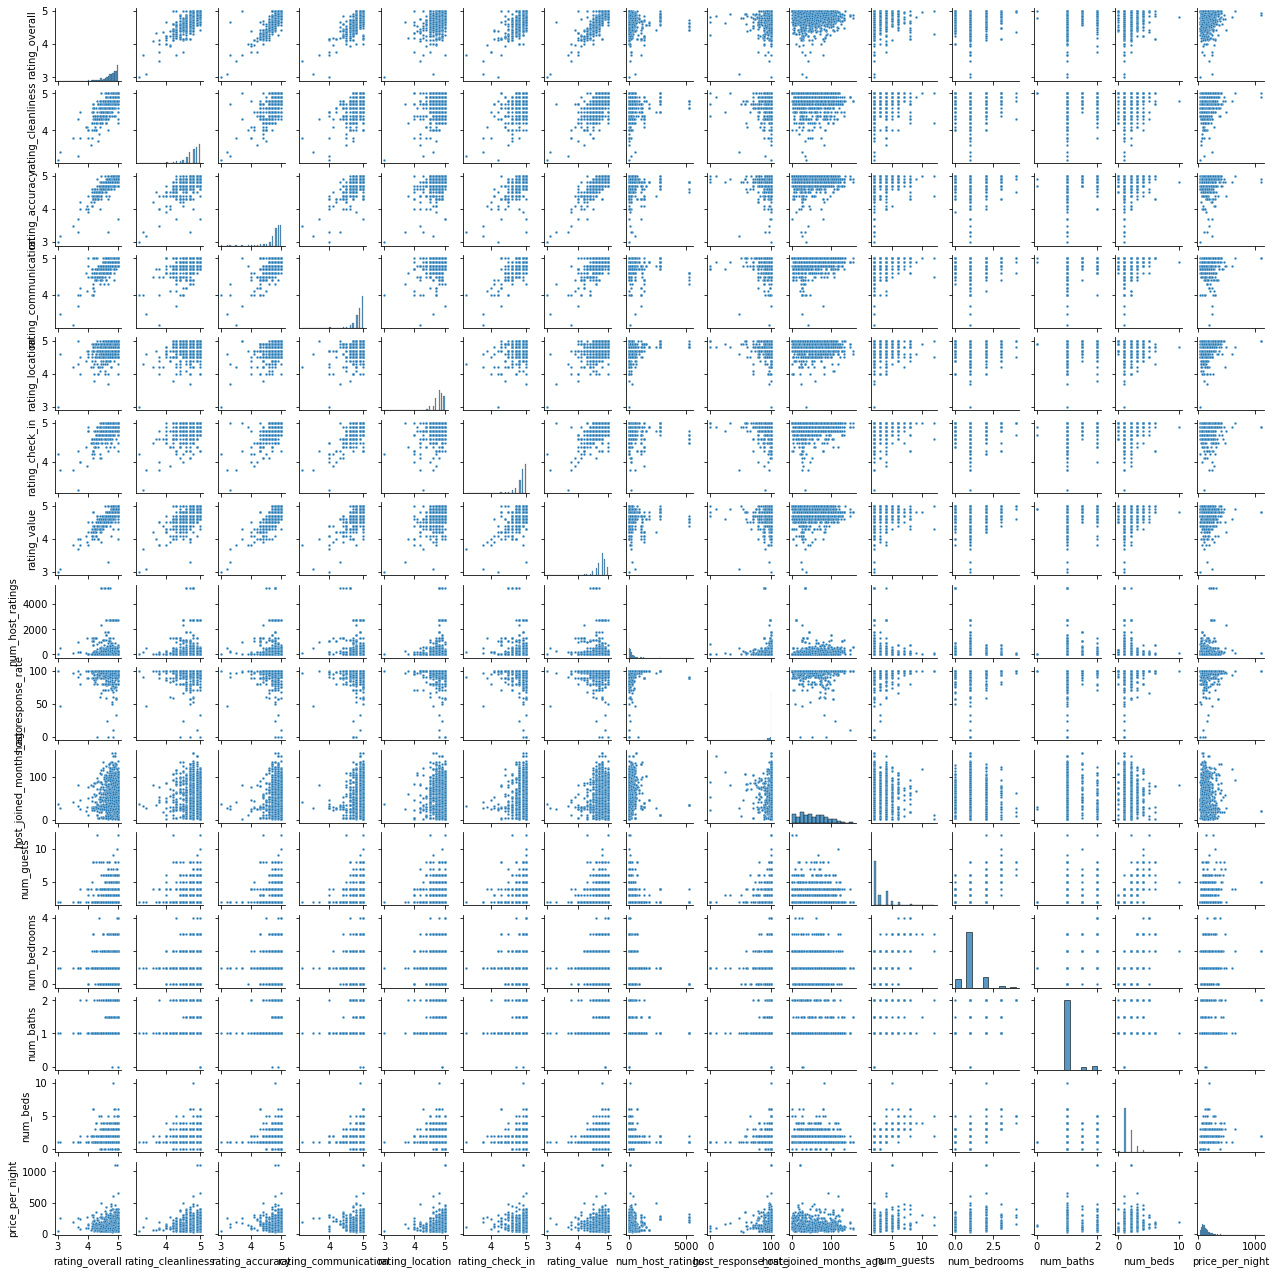

In [6208]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(sub_airbnb_df, height=1.2, plot_kws={'s': 6});

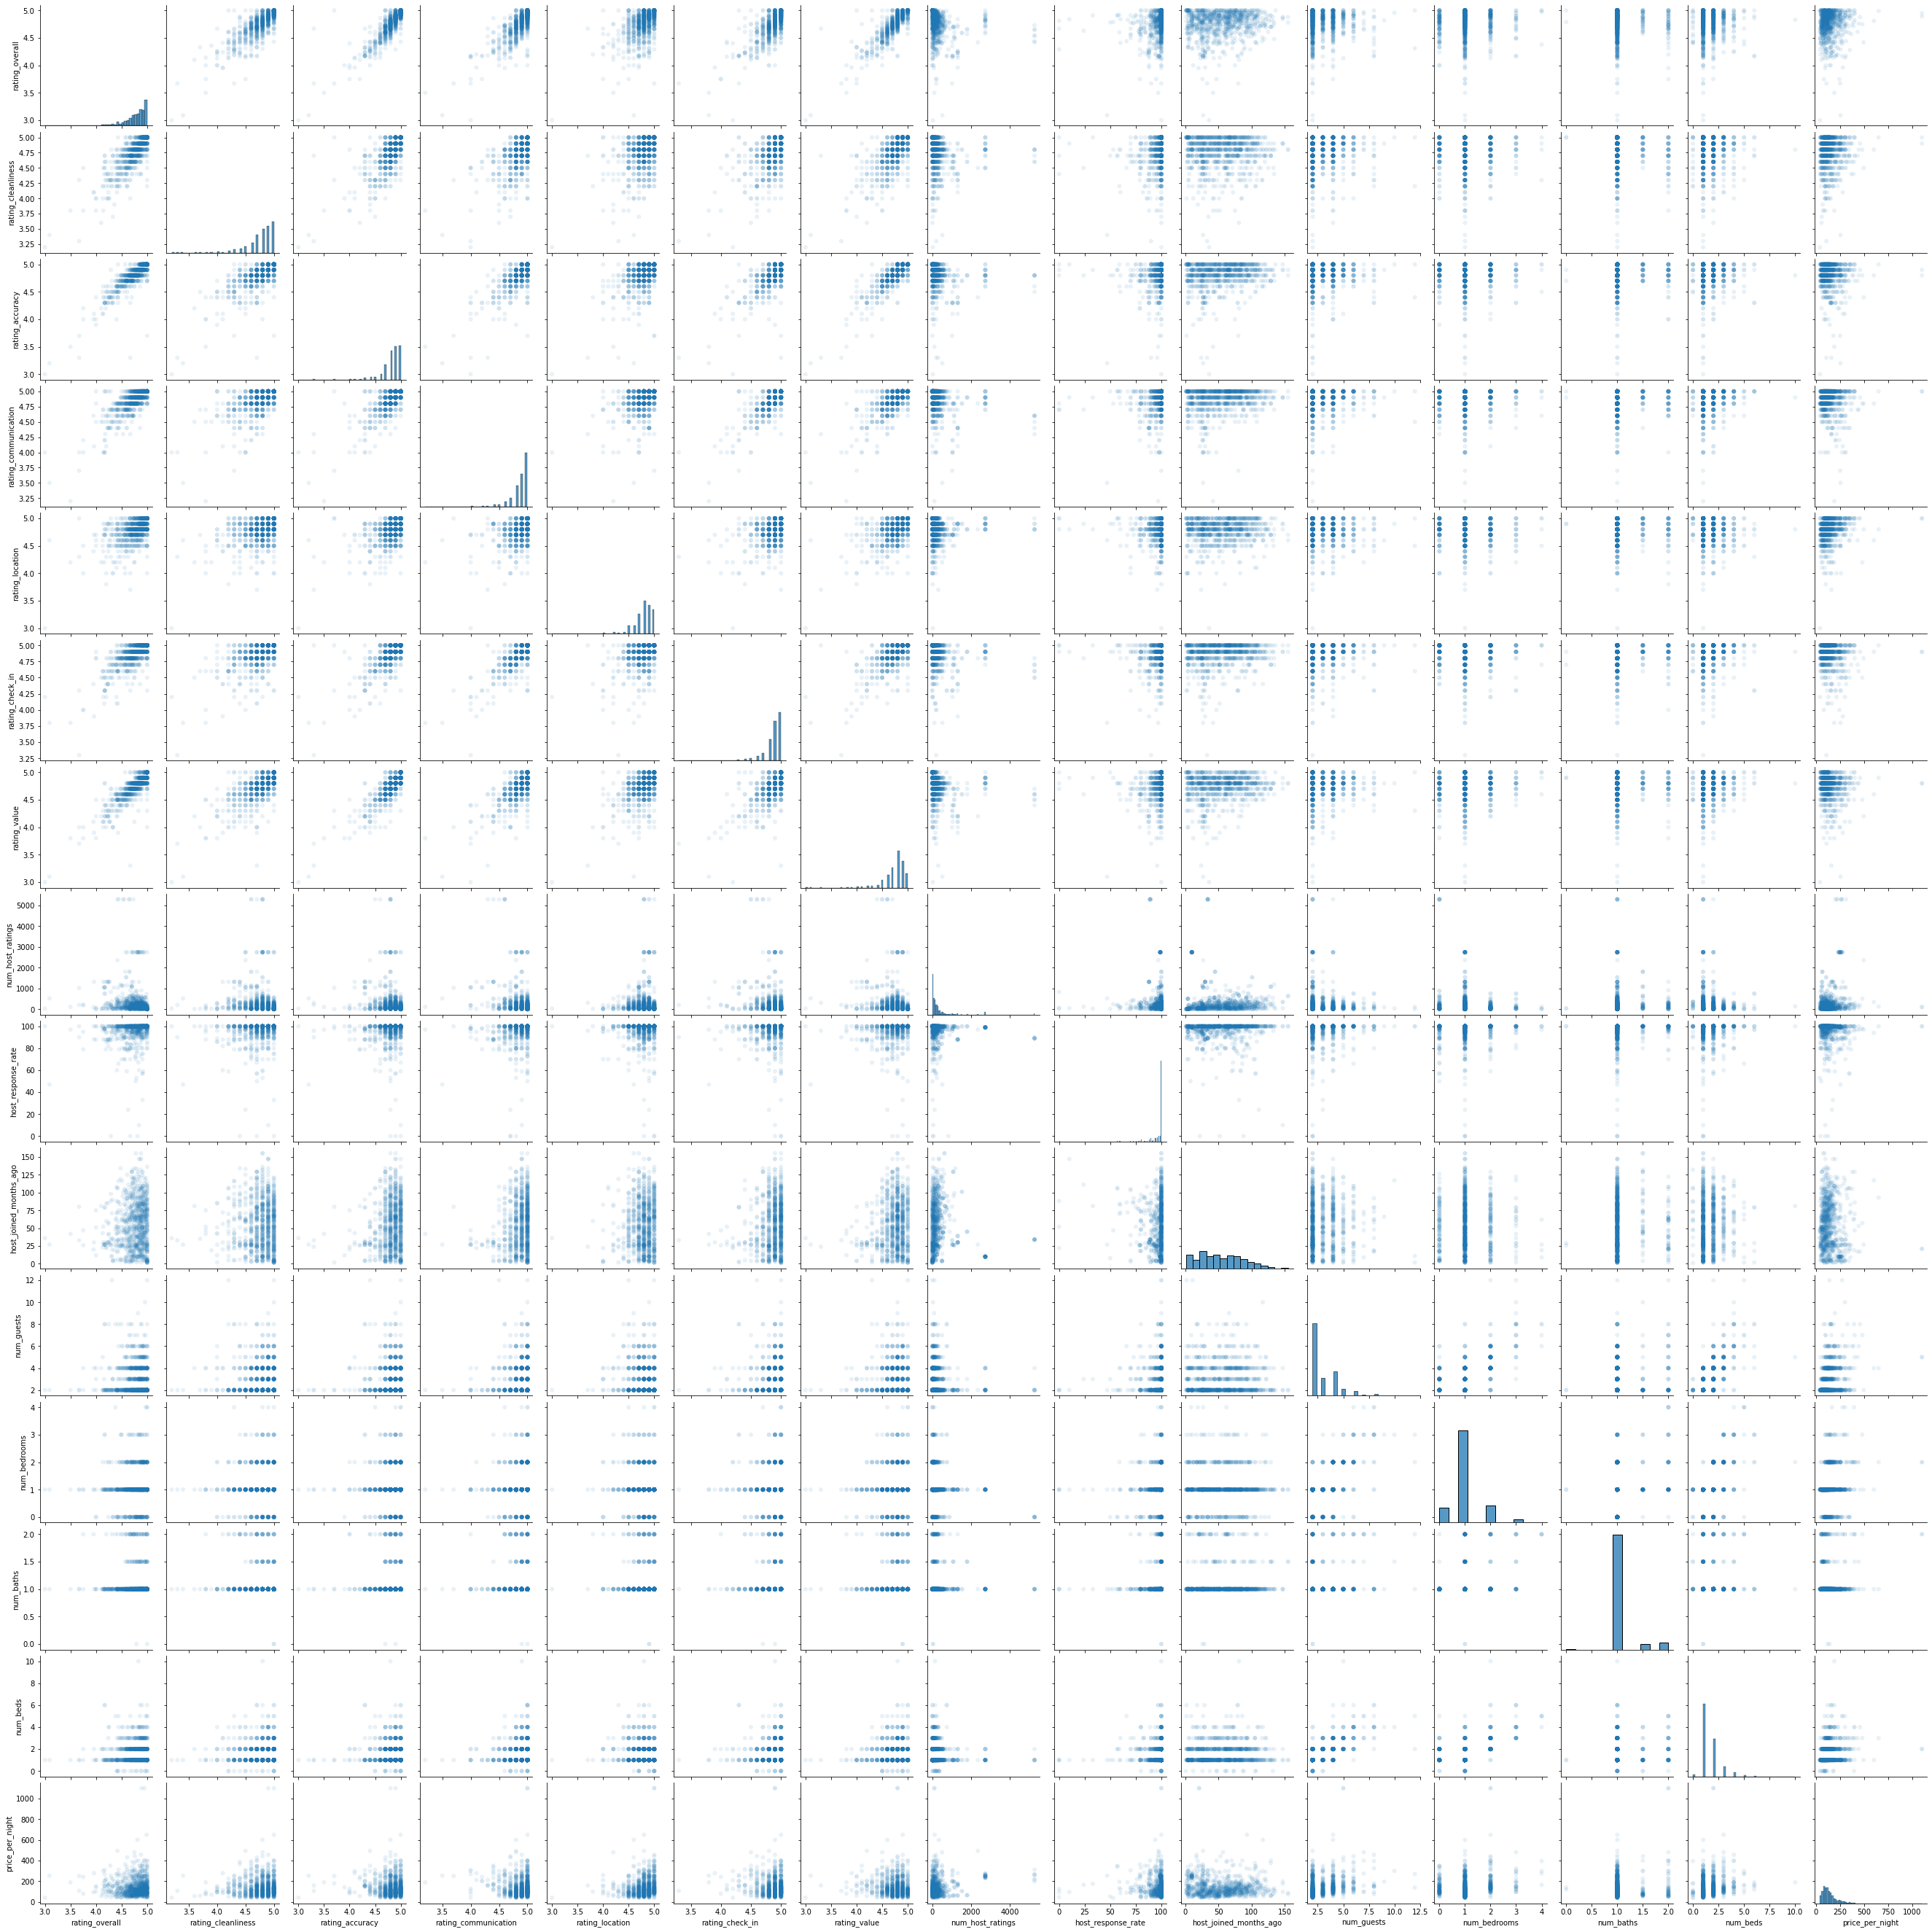

In [6209]:
sns.pairplot(sub_airbnb_df, plot_kws=dict(alpha=.1, edgecolor='none'))

#### Narrow this down to intuitive numeric features of interest

In [6210]:
interesting_numeric_features = ['rating_overall', 'num_listing_reviews', 'rating_location', 'rating_cleanliness', 'num_host_ratings', 'host_response_rate', 'host_joined_months_ago', 'num_bedrooms', 'price_per_night']

In [6211]:
sub_airbnb_df = airbnb_df.loc[:, interesting_numeric_features]

In [6212]:
sub_airbnb_df.corr()

rating_overall  rating_location  rating_cleanliness  \
rating_overall                1.000000         0.504314            0.810725   
rating_location               0.504314         1.000000            0.391032   
rating_cleanliness            0.810725         0.391032            1.000000   
num_host_ratings             -0.156862         0.062584           -0.084198   
host_response_rate            0.170561         0.006105            0.161682   
host_joined_months_ago        0.097431         0.062534            0.013649   
num_bedrooms                  0.040271        -0.046251            0.013639   
price_per_night               0.032302         0.175645            0.055698   

                        num_host_ratings  host_response_rate  \
rating_overall                 -0.156862            0.170561   
rating_location                 0.062584            0.006105   
rating_cleanliness             -0.084198            0.161682   
num_host_ratings                1.000000           -0.023129   
host_response_rate             -0.023129            1.000000   
host_joined_months_ago         -0.104768           -0.022480   
num_bedrooms                   -0.144807            0.067157   
price_per_night                 0.194081           -0.015284   

                        host_joined_months_ago  num_bedrooms  price_per_night  
rating_overall                        0.097431      0.040271         0.032302  
rating_location                       0.062534     -0.046251         0.175645  
rating_cleanliness                    0.013649      0.013639         0.055698  
num_host_ratings                     -0.104768     -0.144807         0.194081  
host_response_rate                   -0.022480      0.067157        -0.015284  
host_joined_months_ago                1.000000     -0.009560        -0.074638  
num_bedrooms                         -0.009560      1.000000         0.206784  
price_per_night                      -0.074638      0.206784         1.000000

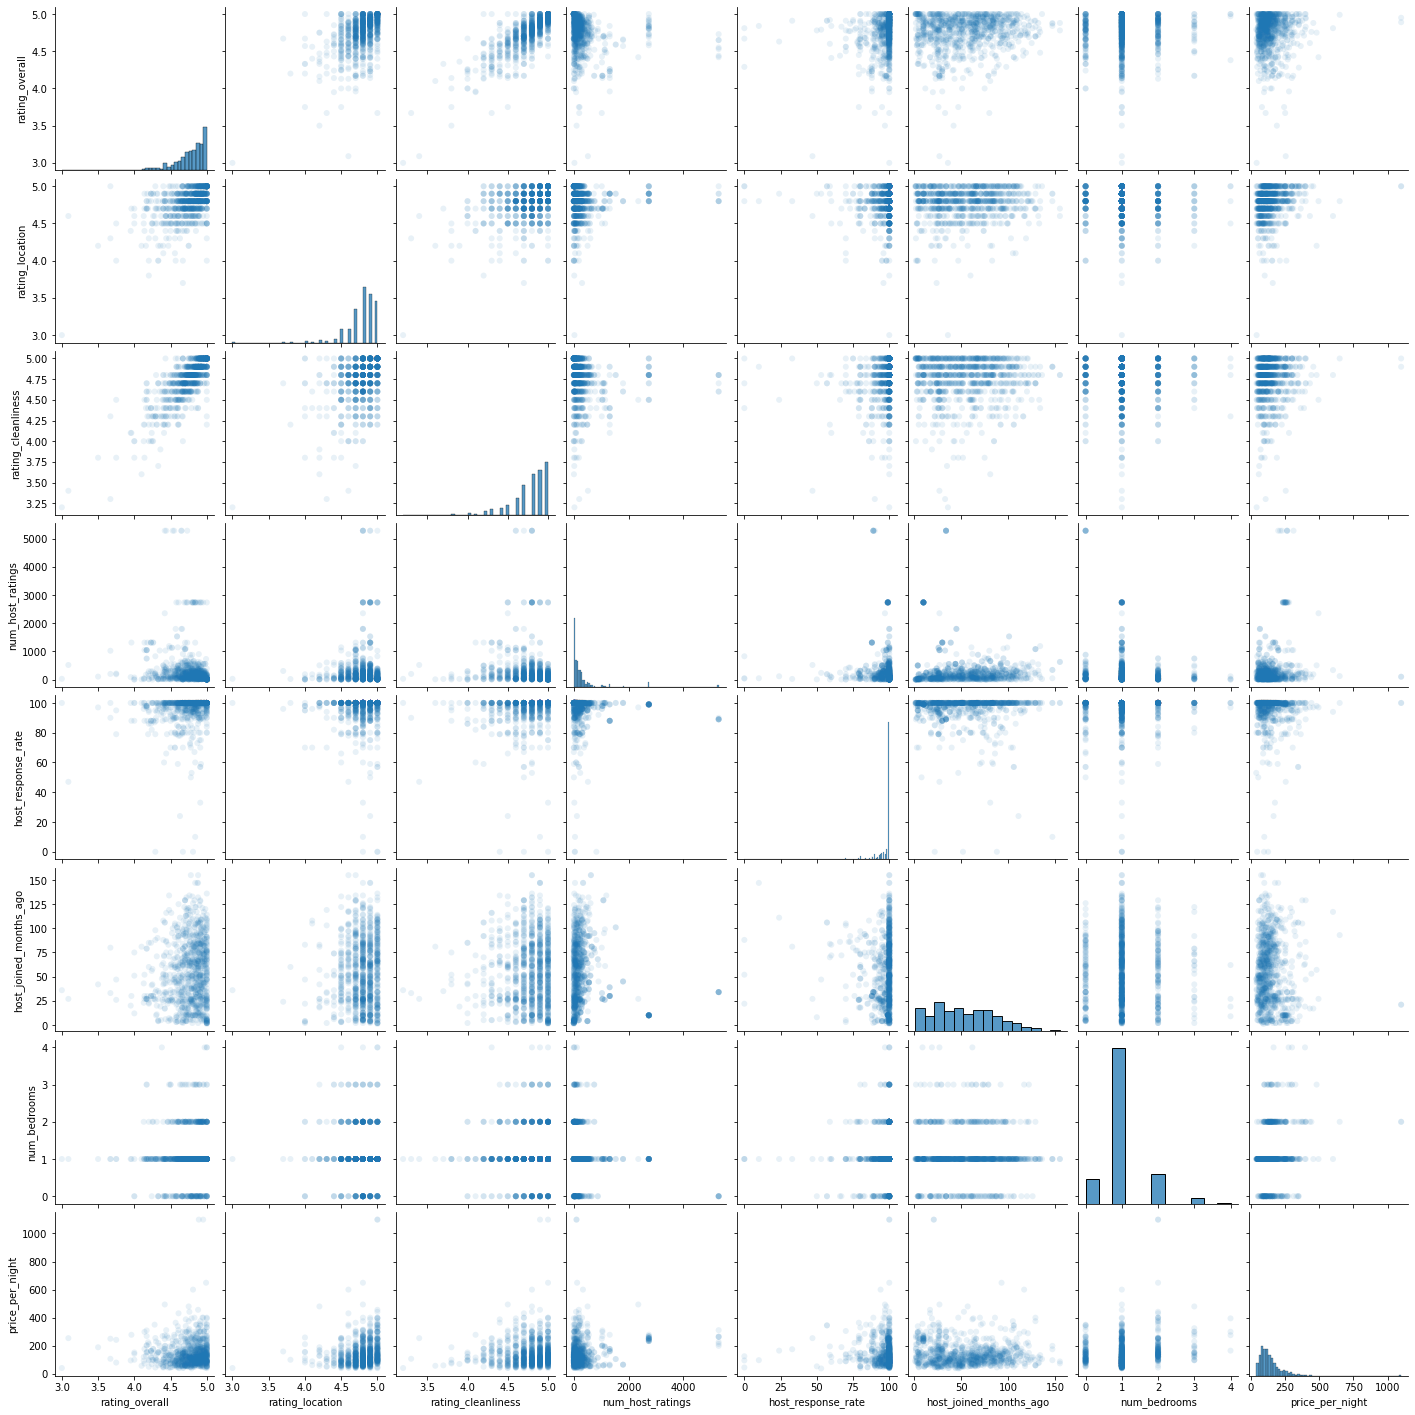

In [6213]:
sns.pairplot(sub_airbnb_df, plot_kws=dict(alpha=.1, edgecolor='none'))

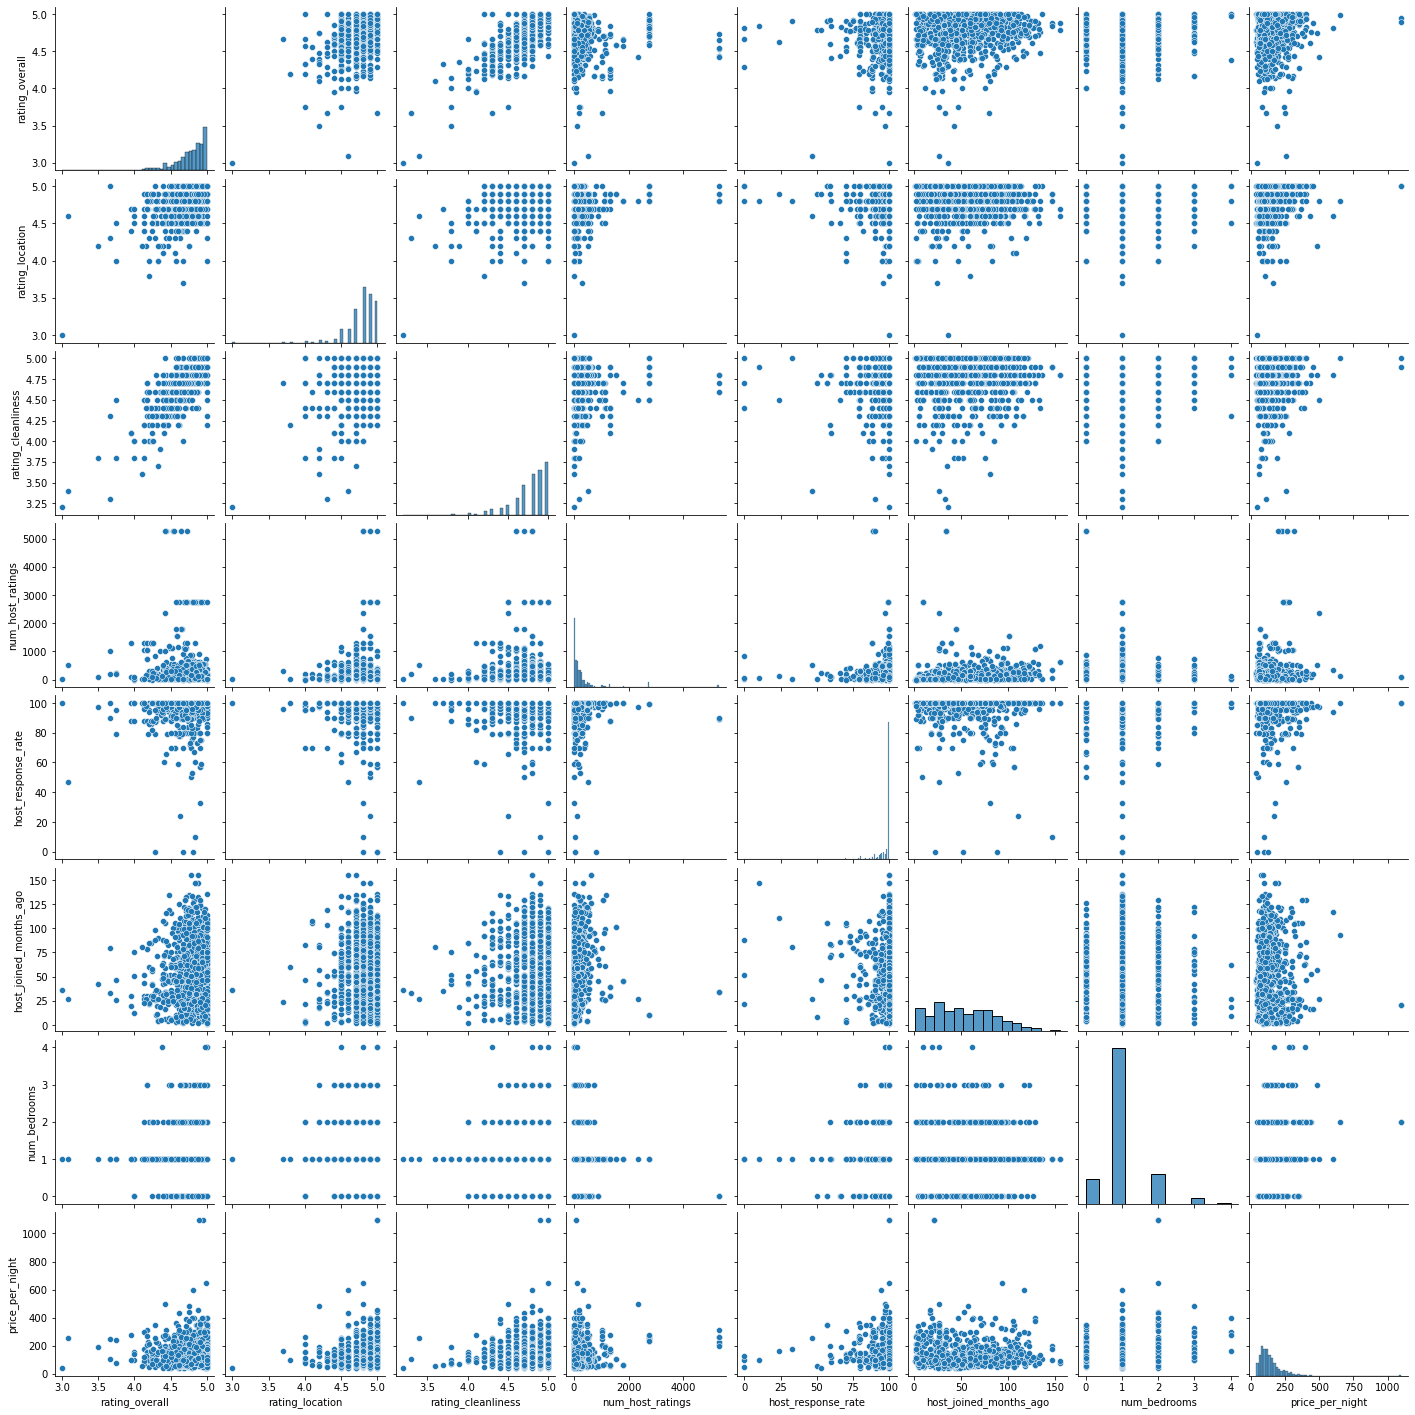

In [6214]:
sns.pairplot(sub_airbnb_df)

Can see that super highly priced outliers are skewing the target, price. Since only two listings are priced that high,
drop them.

In [6215]:
airbnb_df.price_per_night.describe()

count     950.000000
mean      142.175789
std        89.944460
min        38.000000
25%        85.000000
50%       120.000000
75%       172.750000
max      1099.000000
Name: price_per_night, dtype: float64

In [6216]:
airbnb_df.query("price_per_night==1099")

url  \
181  /rooms/43383323?adults=2&children=0&infants=0&...   
187  /rooms/45227616?adults=2&children=0&infants=0&...   

                                                 name  \
181                               Manhattan High Life   
187  2 BR Luxury Penthouse (Views on Views) RATED # 1   

                                           header  \
181  Entire condominium (condo) in Hell's Kitchen   
187  Entire condominium (condo) in Hell's Kitchen   

                                                 rooms  \
181  {'guests': 5, 'bedrooms': 2, 'beds': 2, 'baths...   
187  {'guests': 5, 'bedrooms': 2, 'beds': 2, 'baths...   

                                      facilities  rating_overall  \
181  Wifi · Air conditioning · Kitchen · Heating            4.95   
187  Wifi · Air conditioning · Kitchen · Heating            4.89   

    num_listing_reviews  price_per_night  superhost  \
181        (44 reviews)             1099          1   
187        (37 reviews)             1099          1   

                                                sp_url  ...  \
181  https://www.airbnb.com/s/Manhattan--New-York--...  ...   
187  https://www.airbnb.com/s/Manhattan--New-York--...  ...   

    host_joined_months_ago  num_guests  num_bedrooms  num_beds  num_baths  \
181                     21           5             2         2        2.0   
187                     21           5             2         2        2.0   

     wifi  air_conditioning  heating  kitchen  property_type  
181     1                 1        1        1          condo  
187     1                 1        1        1          condo  

[2 rows x 35 columns]

In [6217]:
airbnb_df.price_per_night.sort_values(ascending=False, inplace=False)

181    1099
187    1099
578     649
687     600
167     494
       ... 
279      41
272      41
228      40
303      40
742      38
Name: price_per_night, Length: 950, dtype: int64

In [6218]:
airbnb_df.drop(airbnb_df.loc[airbnb_df['price_per_night']==1099].index, inplace=True)
airbnb_df.reset_index(drop=True, inplace=True)

In [6219]:
airbnb_df.shape

(948, 35)

Rinse. Repeat.

In [6220]:
sub_airbnb_df = airbnb_df.loc[:, interesting_numeric_features]

In [6221]:
sub_airbnb_df.corr()

rating_overall  rating_location  rating_cleanliness  \
rating_overall                1.000000         0.503637            0.810631   
rating_location               0.503637         1.000000            0.390053   
rating_cleanliness            0.810631         0.390053            1.000000   
num_host_ratings             -0.156496         0.063407           -0.083752   
host_response_rate            0.170126         0.005241            0.161209   
host_joined_months_ago        0.099038         0.064998            0.015268   
num_bedrooms                  0.038250        -0.049824            0.011334   
price_per_night               0.019526         0.173638            0.044644   

                        num_host_ratings  host_response_rate  \
rating_overall                 -0.156496            0.170126   
rating_location                 0.063407            0.005241   
rating_cleanliness             -0.083752            0.161209   
num_host_ratings                1.000000           -0.022876   
host_response_rate             -0.022876            1.000000   
host_joined_months_ago         -0.105580           -0.021694   
num_bedrooms                   -0.144149            0.066128   
price_per_night                 0.230795           -0.027327   

                        host_joined_months_ago  num_bedrooms  price_per_night  
rating_overall                        0.099038      0.038250         0.019526  
rating_location                       0.064998     -0.049824         0.173638  
rating_cleanliness                    0.015268      0.011334         0.044644  
num_host_ratings                     -0.105580     -0.144149         0.230795  
host_response_rate                   -0.021694      0.066128        -0.027327  
host_joined_months_ago                1.000000     -0.006417        -0.059606  
num_bedrooms                         -0.006417      1.000000         0.199313  
price_per_night                      -0.059606      0.199313         1.000000

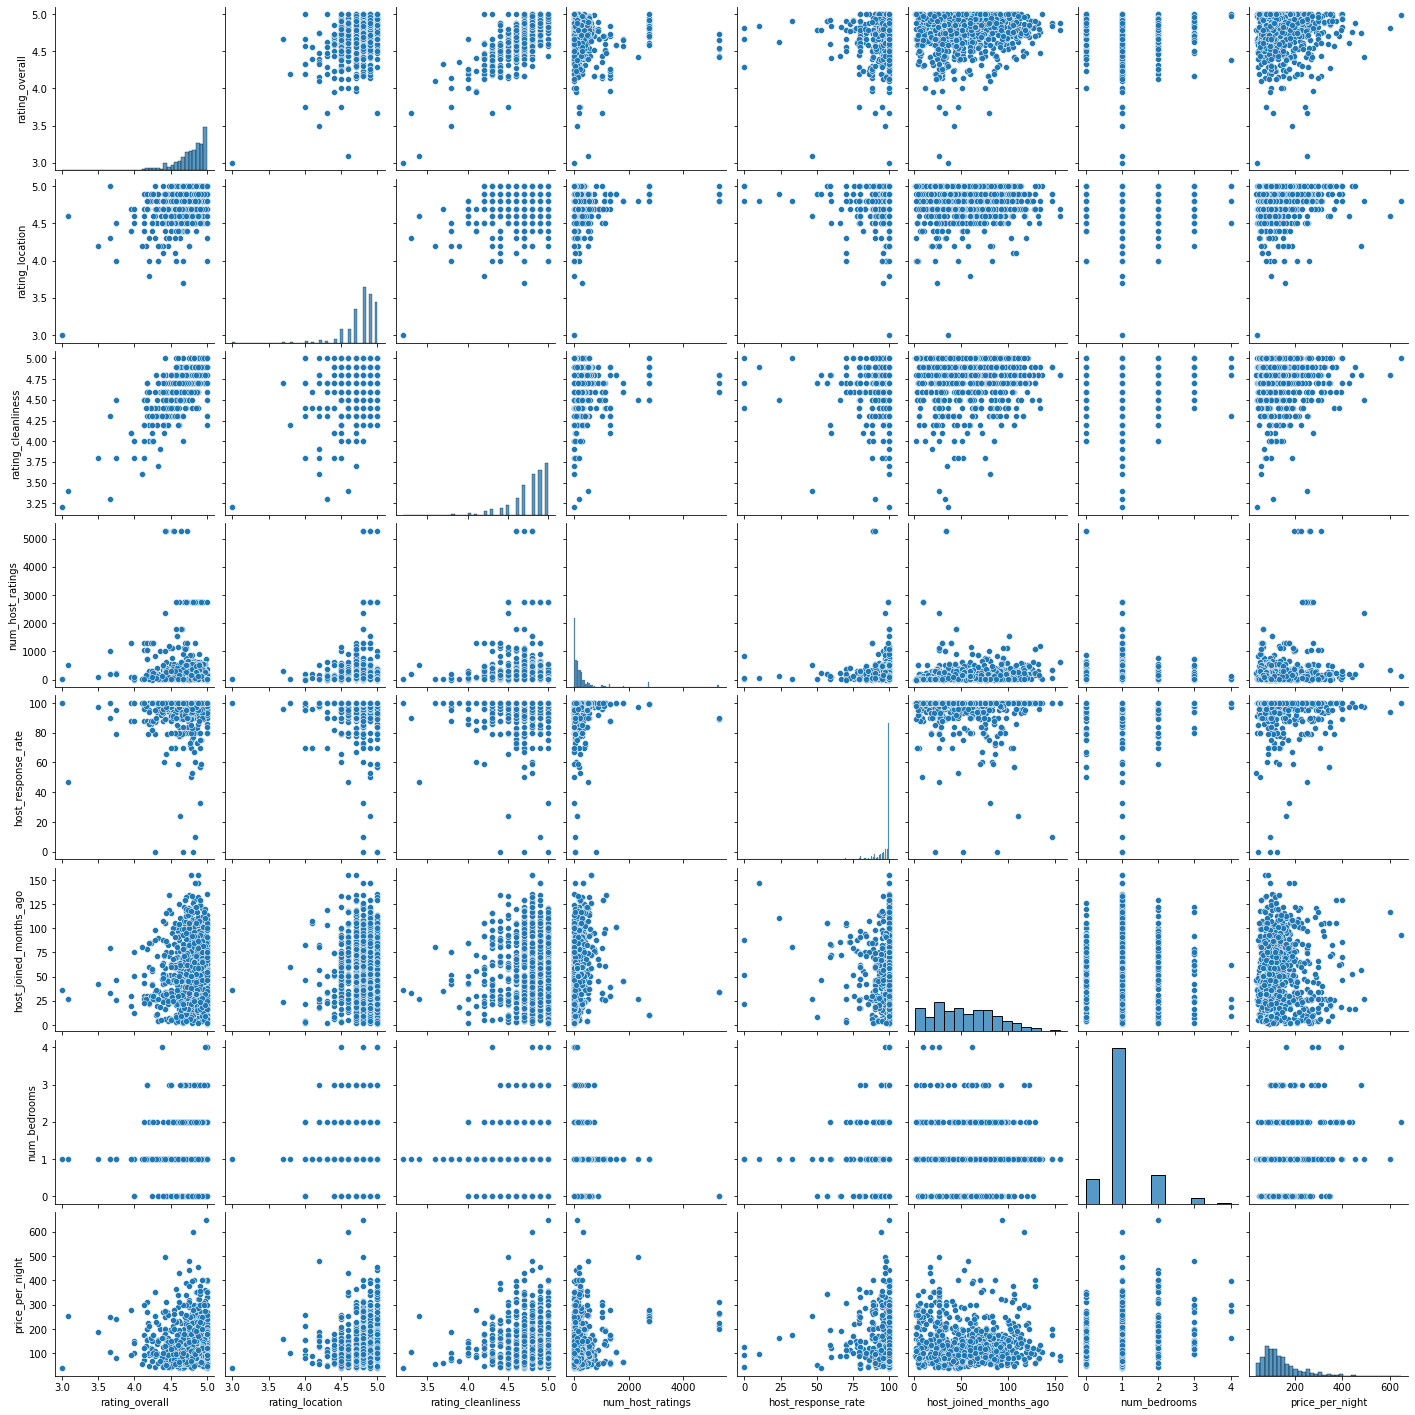

In [6222]:
pairplot_airbnb = sns.pairplot(sub_airbnb_df)

In [6223]:
pairplot_airbnb.savefig('pairplot_airbnb.jpg')

Text(0.5, 1.0, "Correlations between dataset's numerical features of interest")

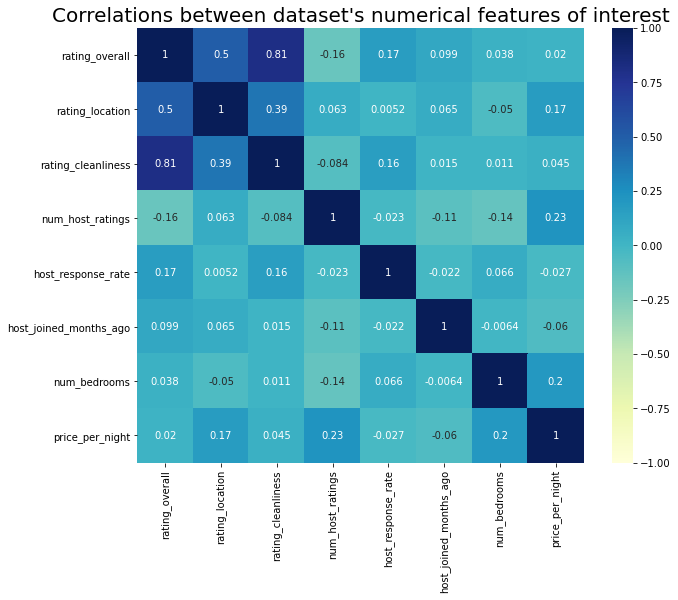

In [6224]:
f, ax = plt.subplots(figsize=(10,8))
heatmap_airbnb = sns.heatmap(sub_airbnb_df.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)
plt.title("Correlations between dataset's numerical features of interest", fontsize=20)

In [6225]:
plt.savefig('airbnb_heatmap.jpg')

<Figure size 432x288 with 0 Axes>

In [6226]:
airbnb_df.facilities.head()

0    Wifi · Air conditioning · Kitchen · Heating
1    Wifi · Air conditioning · Kitchen · Heating
2              Wifi · Air conditioning · Heating
3    Wifi · Air conditioning · Kitchen · Heating
4    Wifi · Air conditioning · Kitchen · Heating
Name: facilities, dtype: object

In [6227]:
airbnb_df.loc[1, "amenities"]

'{"amenity_Bathroom": ["Hair dryer", "Shampoo", "Hot water"], "amenity_Bedroom and laundry": ["Washer", "Dryer", "Essentials", "Hangers", "Bed linens", "Extra pillows and blankets", "Iron"], "amenity_Entertainment": ["TV with standard cable"], "amenity_Heating and cooling": ["Air conditioning", "Heating"], "amenity_Home safety": ["Smoke alarm", "Carbon monoxide alarm", "First aid kit"], "amenity_Internet and office": ["Wifi", "Dedicated workspace"], "amenity_Kitchen and dining": ["Kitchen", "Refrigerator", "Microwave", "Cooking basics", "Dishes and silverware", "Dishwasher", "Stove", "Oven", "Coffee maker"], "amenity_Location features": ["Private entrance"], "amenity_Parking and facilities": ["Free street parking", "Elevator", "Single level home"], "amenity_Services": ["Long term stays allowed"], "amenity_Not included": ["Unavailable: Security cameras on property"]}'

In [6239]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   url                     948 non-null    object 
 1   name                    948 non-null    object 
 2   header                  948 non-null    object 
 3   rooms                   948 non-null    object 
 4   facilities              948 non-null    object 
 5   rating_overall          948 non-null    float64
 6   num_listing_reviews     948 non-null    int64  
 7   price_per_night         948 non-null    int64  
 8   superhost               948 non-null    int64  
 9   sp_url                  948 non-null    object 
 10  location                948 non-null    object 
 11  fee_occ_tax             948 non-null    int64  
 12  fee_service             948 non-null    int64  
 13  fee_cleaning            948 non-null    int64  
 14  rating_cleanliness      948 non-null    fl

In [6240]:
airbnb_cleaned_features_df = airbnb_df.loc[:,['name','price_per_night','rating_overall', 'rating_cleanliness', 'rating_accuracy', 'rating_communication', 'rating_location', 'rating_check_in', 'rating_value', 'num_listing_reviews', 'num_host_ratings','host_response_rate','host_joined_months_ago','num_guests','num_bedrooms', 'num_beds', 'num_baths', 'superhost','borough', 'property_type', 'wifi', 'air_conditioning', 'heating', 'kitchen']]

In [6241]:
airbnb_cleaned_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    948 non-null    object 
 1   price_per_night         948 non-null    int64  
 2   rating_overall          948 non-null    float64
 3   rating_cleanliness      948 non-null    float64
 4   rating_accuracy         948 non-null    float64
 5   rating_communication    948 non-null    float64
 6   rating_location         948 non-null    float64
 7   rating_check_in         948 non-null    float64
 8   rating_value            948 non-null    float64
 9   num_listing_reviews     948 non-null    int64  
 10  num_host_ratings        948 non-null    int64  
 11  host_response_rate      948 non-null    int64  
 12  host_joined_months_ago  948 non-null    int64  
 13  num_guests              948 non-null    int64  
 14  num_bedrooms            948 non-null    in

In [6242]:
# airbnb_cleaned_features_df.to_csv('cleaned_airbnb_data.csv')